In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('dataset.csv')

In [3]:
df1.head()

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   

          1960         1961         1962         1963         1964  \
0      54608.0      55811.0      56682.0      57475.0      58178.0   
1  130692579.0  134169237.0  137835590.0  141630546.0  145605995.0   
2    8622466.0    8790140.0    8969047.0    9157465.0    9355514.0   
3   97256290.0   99314028.0  101445032.0  103667517.0  105959979.0   
4    5357195.0    5441333.0    5521400.0    5599827.0    5673199.0   

          1965  ...         2013         2014         2015         2016  \
0      58782.0  ...     102880.0     103594.0     104257.0     104874.0   
1  149742351.0  ...  567892149.0  583651101.0  600008424.0  616377605.0   
2    9565147.0  ...   31541209.0   32716210.0   33753499.0   34636207.0   
3  108336203.0  ...  387204553.0  397855507.0  408690375.0  419778384.0   
4    5736582.0  ...   26147002.0   27128337.0   28127721.0   29154746.0   

          2017         2018         2019         2020         2021  \
0     105439.0     105962.0     106442.0     106585.0     106537.0   
1  632746570.0  649757148.0  667242986.0  685112979.0  702977106.0   
2   35643418.0   36686784.0   37769499.0   38972230.0   40099462.0   
3  431138704.0  442646825.0  454306063.0  466189102.0  478185907.0   
4   30208628.0   31273533.0   32353588.0   33428486.0   34503774.0   

          2022  
0     106445.0  
1  720859132.0  
2   41128771.0  
3  490330870.0  
4   35588987.0  

[5 rows x 67 columns]

In [4]:
df2 = pd.read_csv('dataset2.csv')

In [5]:
df2.head()

Country Code                     Region          IncomeGroup  \
0          ABW  Latin America & Caribbean          High income   
1          AFE                        NaN                  NaN   
2          AFG                 South Asia           Low income   
3          AFW                        NaN                  NaN   
4          AGO         Sub-Saharan Africa  Lower middle income   

                                        SpecialNotes  \
0                                                NaN   
1  26 countries, stretching from the Red Sea in t...   
2  The reporting period for national accounts dat...   
3  22 countries, stretching from the westernmost ...   
4  The World Bank systematically assesses the app...   

                     TableName  
0                        Aruba  
1  Africa Eastern and Southern  
2                  Afghanistan  
3   Africa Western and Central  
4                       Angola

In [6]:
df3 = pd.read_csv('dataset3.csv')

In [7]:
df3.head()

INDICATOR_CODE     INDICATOR_NAME  \
0    SP.POP.TOTL  Population, total   

                                         SOURCE_NOTE  \
0  Total population is based on the de facto defi...   

                                 SOURCE_ORGANIZATION  
0  (1) United Nations Population Division. World ...

In [12]:
melted_df = df1.melt(id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Population')

In [33]:
melted_df.head(10)

Country Name Country Code     Indicator Name Indicator Code  \
0                        Aruba          ABW  Population, total    SP.POP.TOTL   
1  Africa Eastern and Southern          AFE  Population, total    SP.POP.TOTL   
2                  Afghanistan          AFG  Population, total    SP.POP.TOTL   
3   Africa Western and Central          AFW  Population, total    SP.POP.TOTL   
4                       Angola          AGO  Population, total    SP.POP.TOTL   
5                      Albania          ALB  Population, total    SP.POP.TOTL   
6                      Andorra          AND  Population, total    SP.POP.TOTL   
7                   Arab World          ARB  Population, total    SP.POP.TOTL   
8         United Arab Emirates          ARE  Population, total    SP.POP.TOTL   
9                    Argentina          ARG  Population, total    SP.POP.TOTL   

   Year   Population  
0  1960      54608.0  
1  1960  130692579.0  
2  1960    8622466.0  
3  1960   97256290.0  
4  1960    5357195.0  
5  1960    1608800.0  
6  1960       9443.0  
7  1960   93359407.0  
8  1960     133426.0  
9  1960   20349744.0

In [14]:
melted_df['Year'] = pd.to_numeric(melted_df['Year'], errors='coerce')

In [21]:
def plot_population(country_code):
    melted_df1 = melted_df[melted_df['Country Code']== country_code]
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=melted_df1, x='Year', y='Population')
    plt.title(f'Population Trend for {country_code}')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.grid(True)
    plt.show()

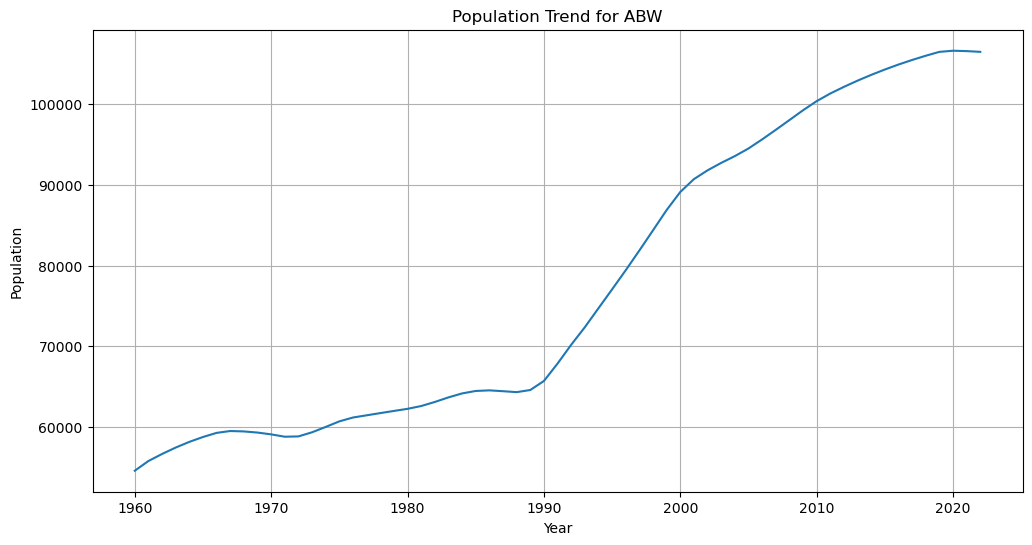

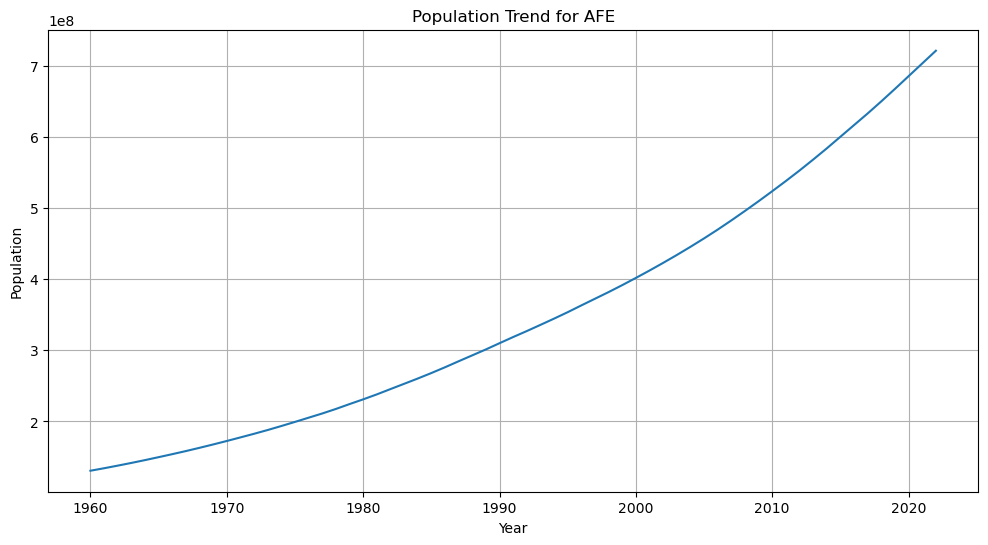

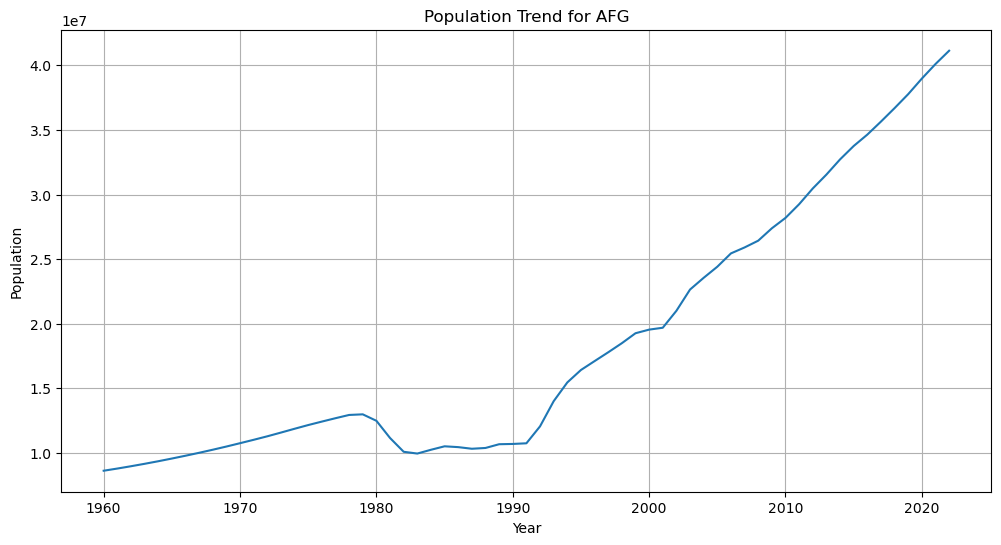

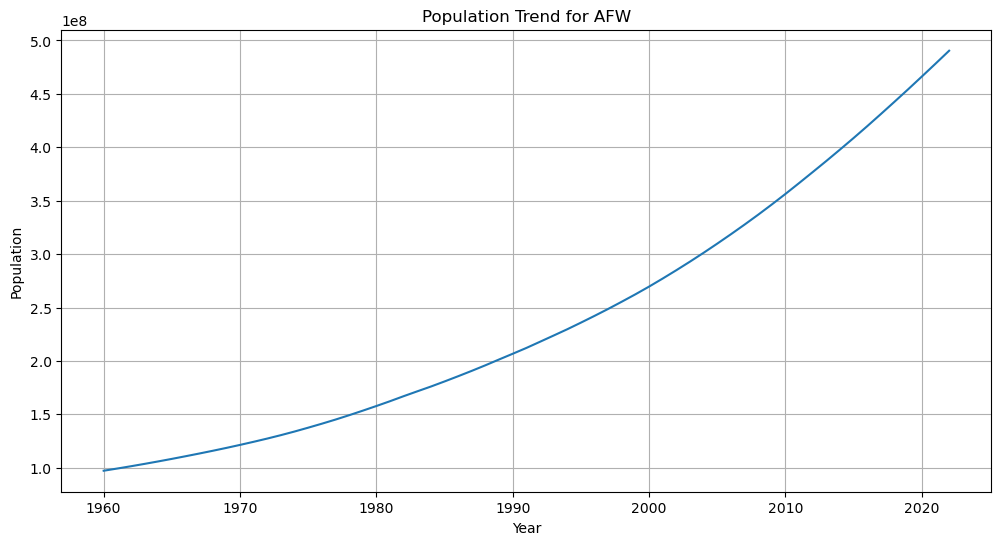

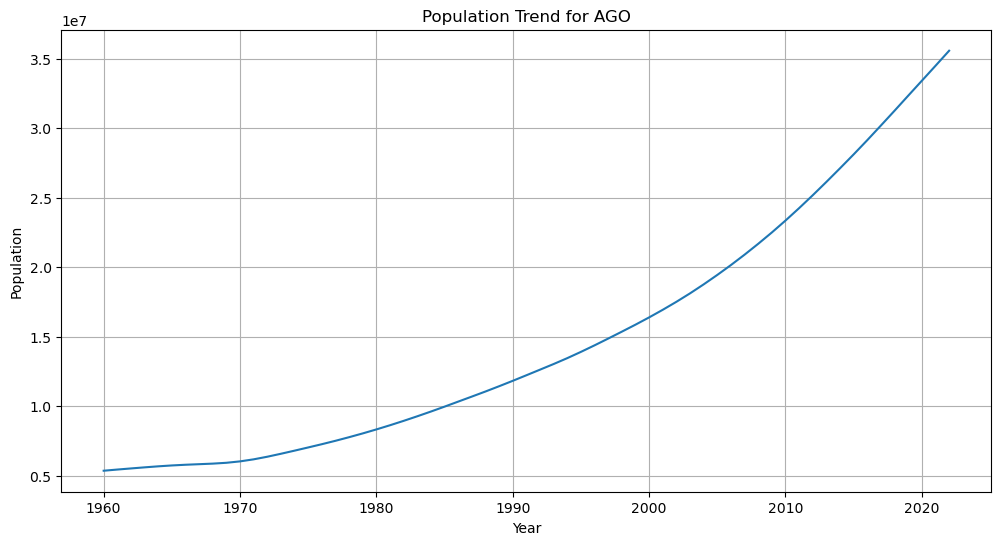

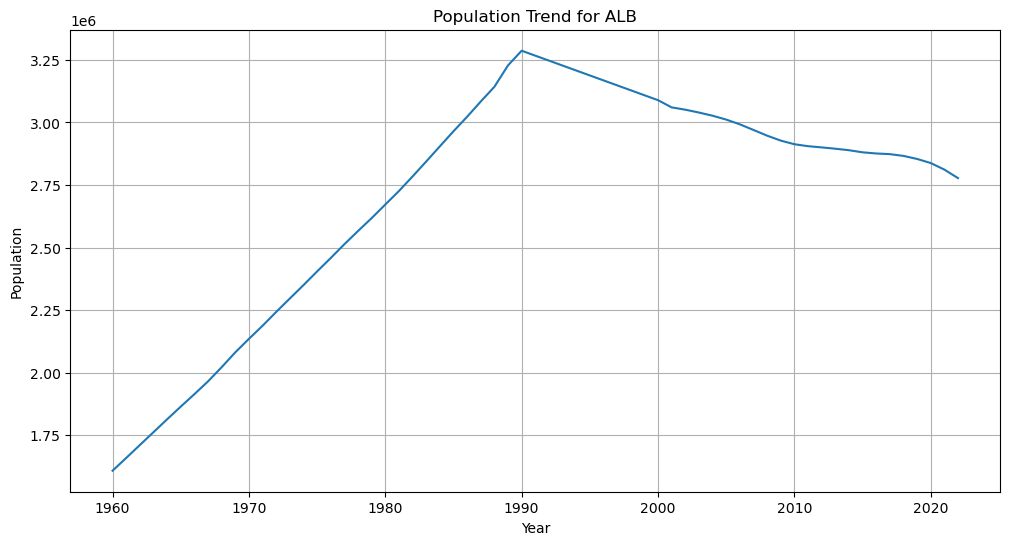

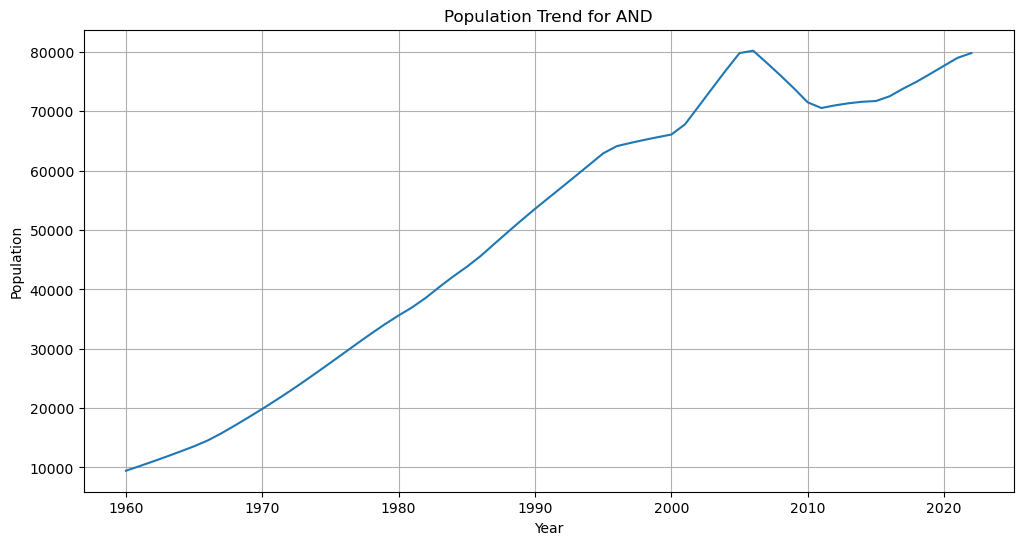

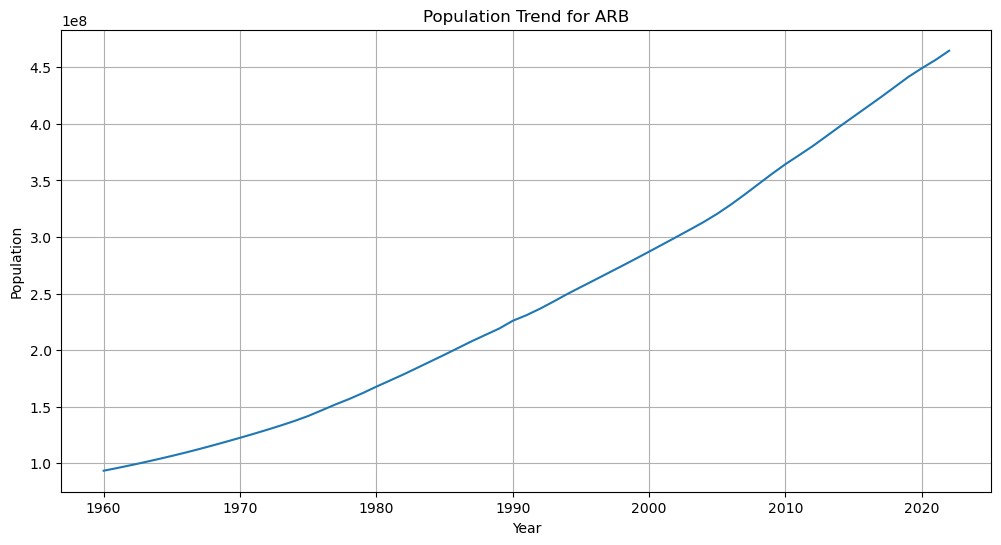

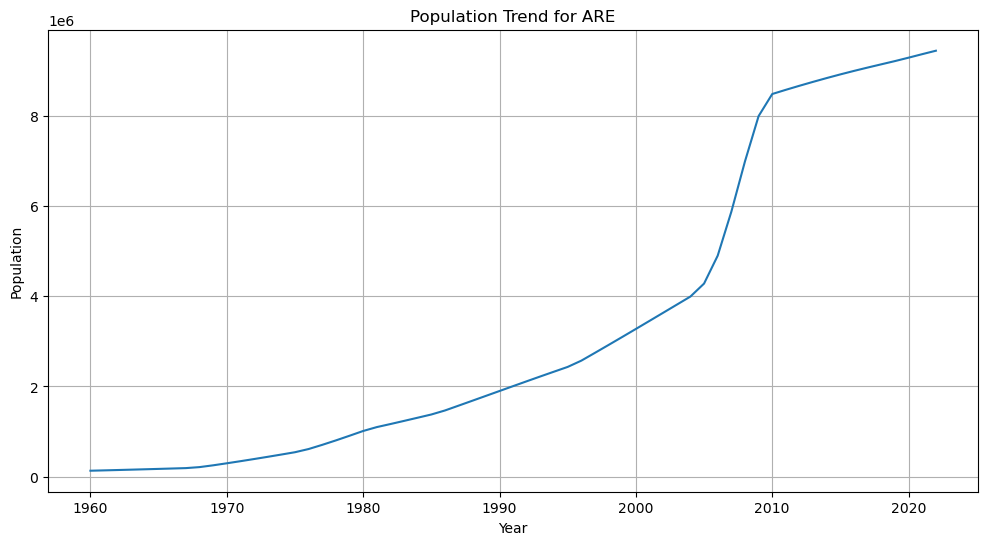

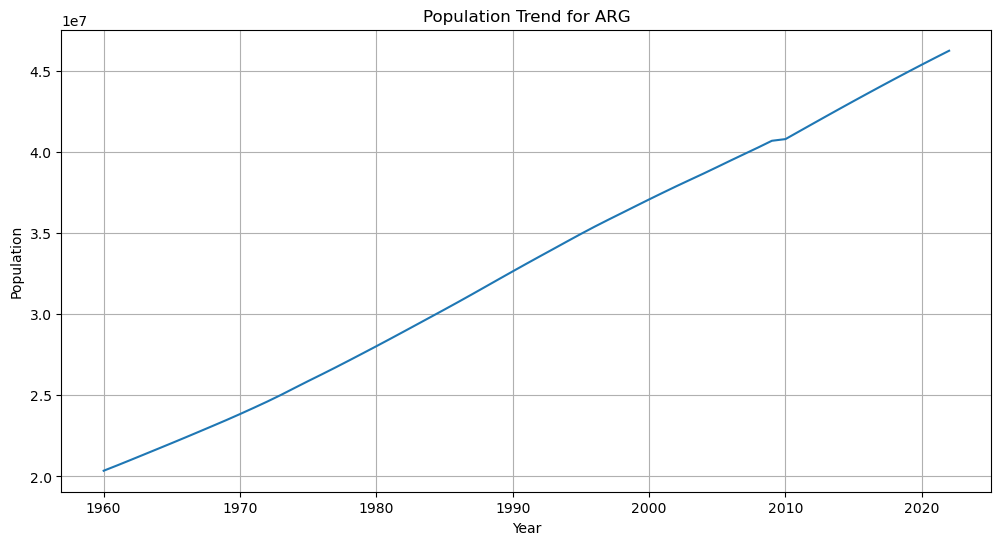

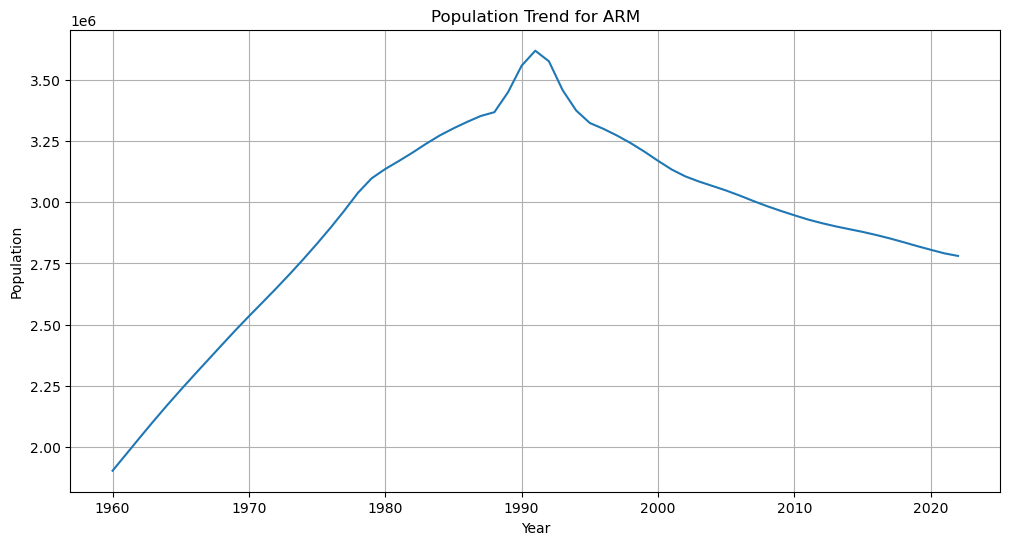

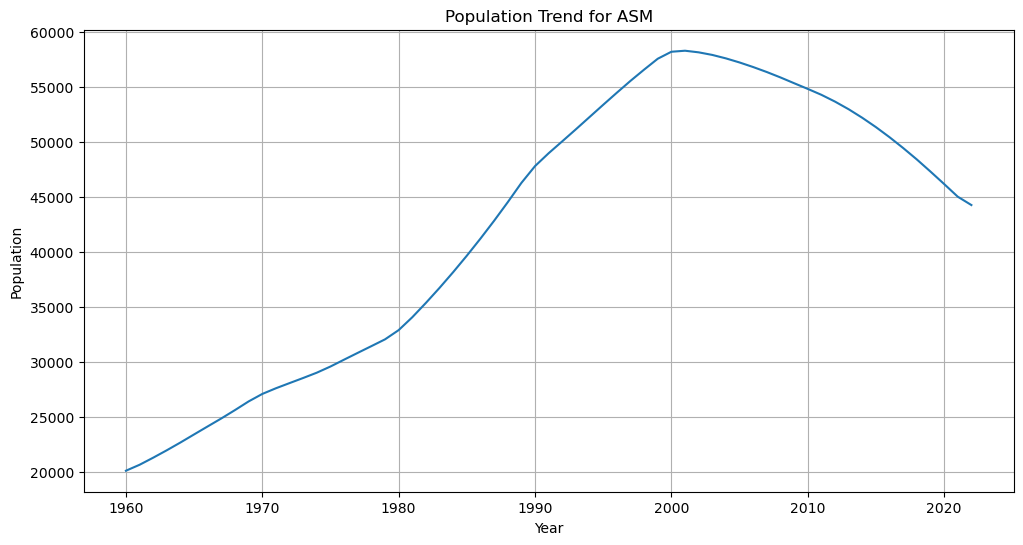

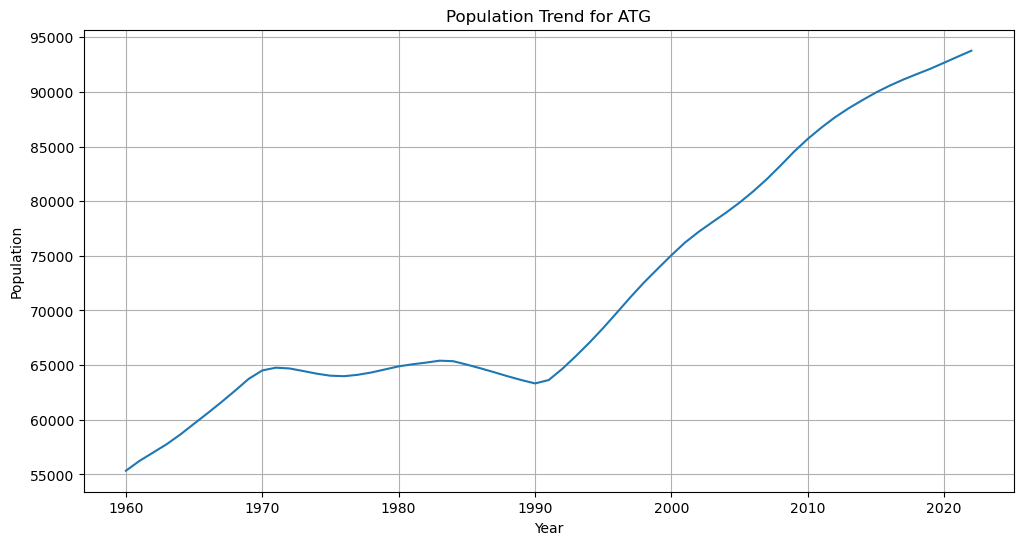

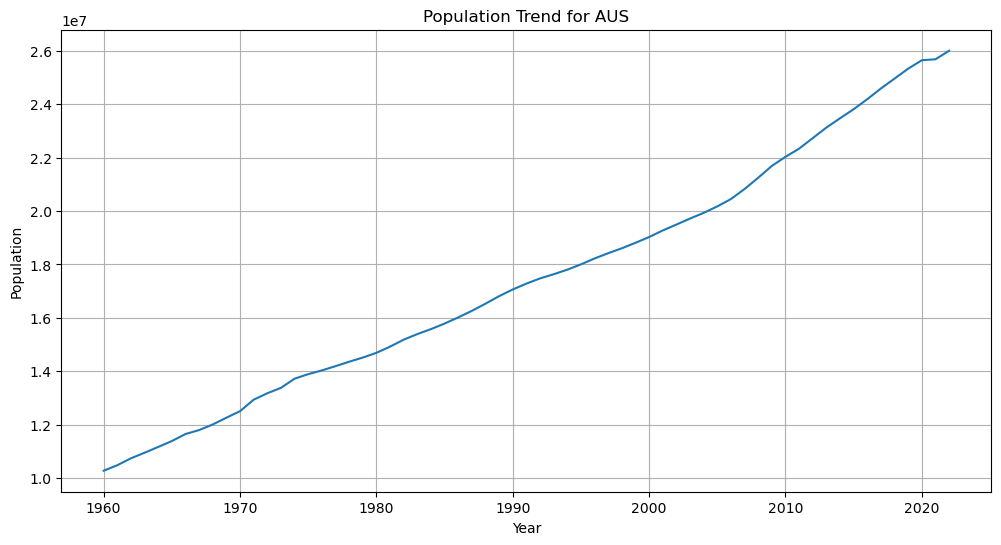

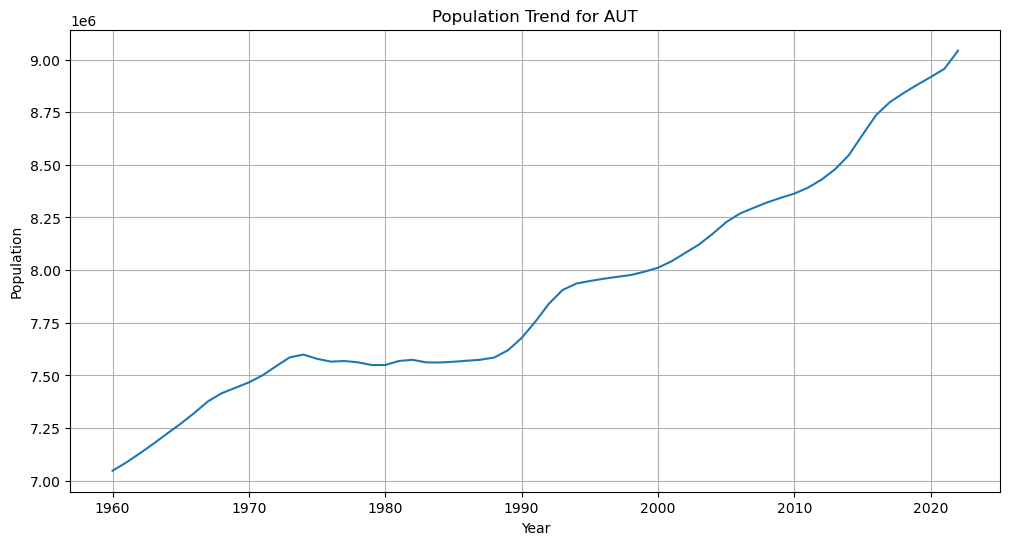

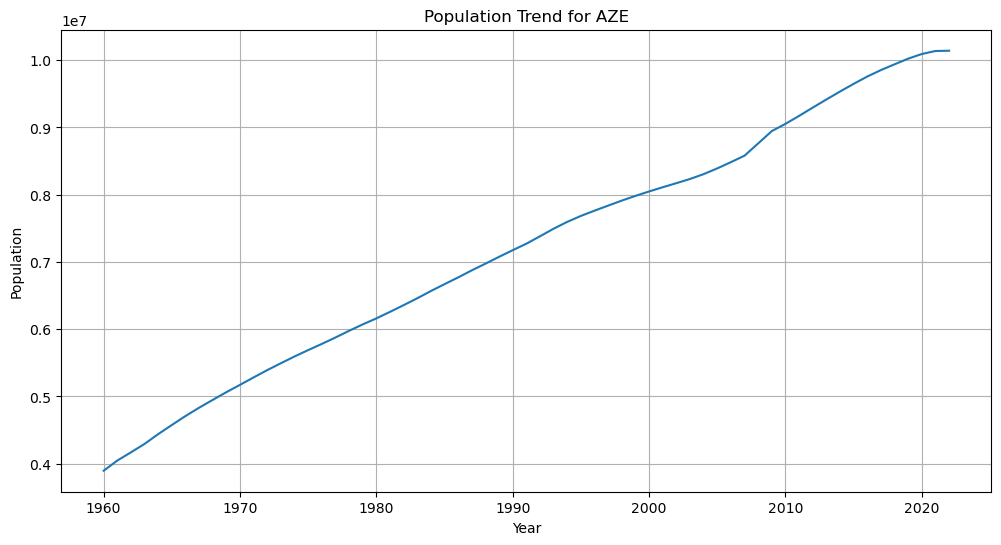

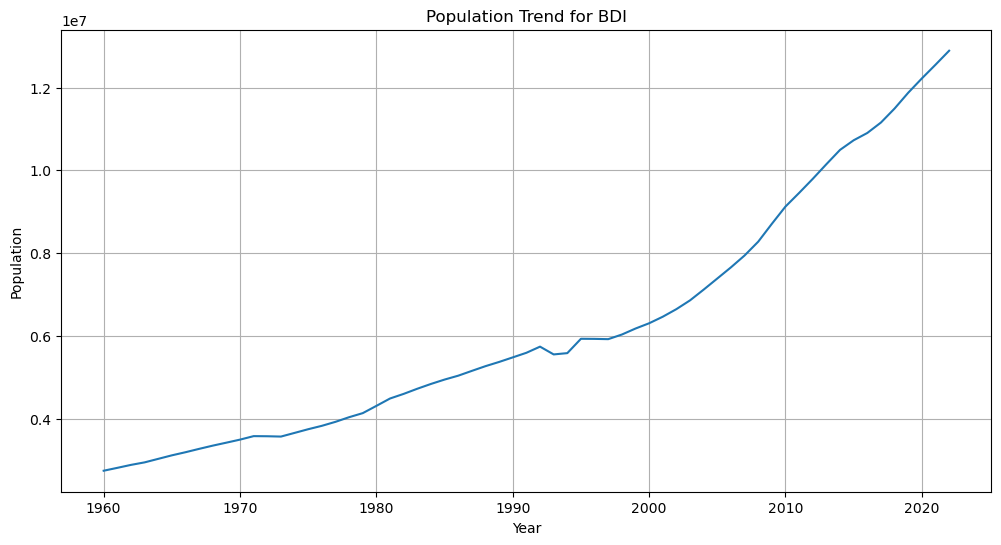

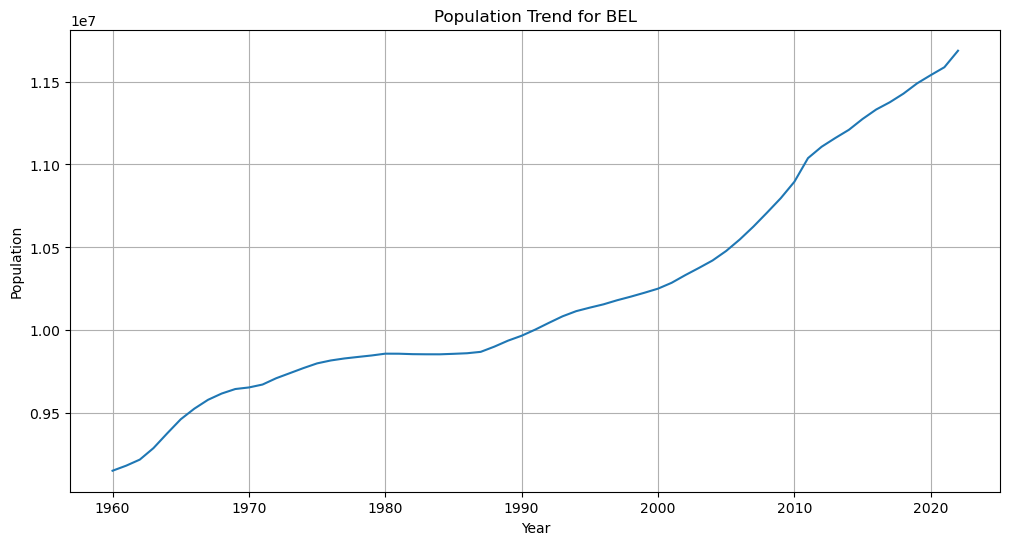

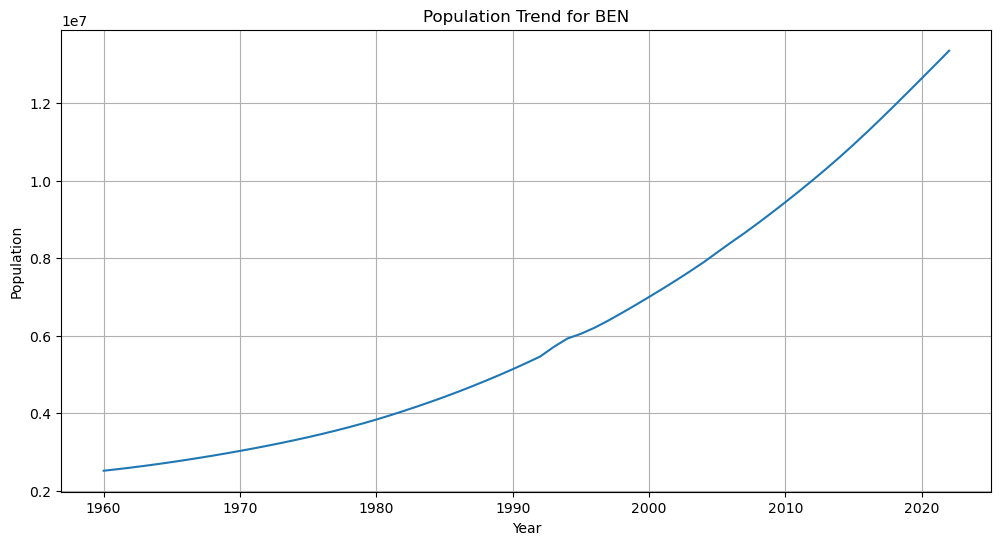

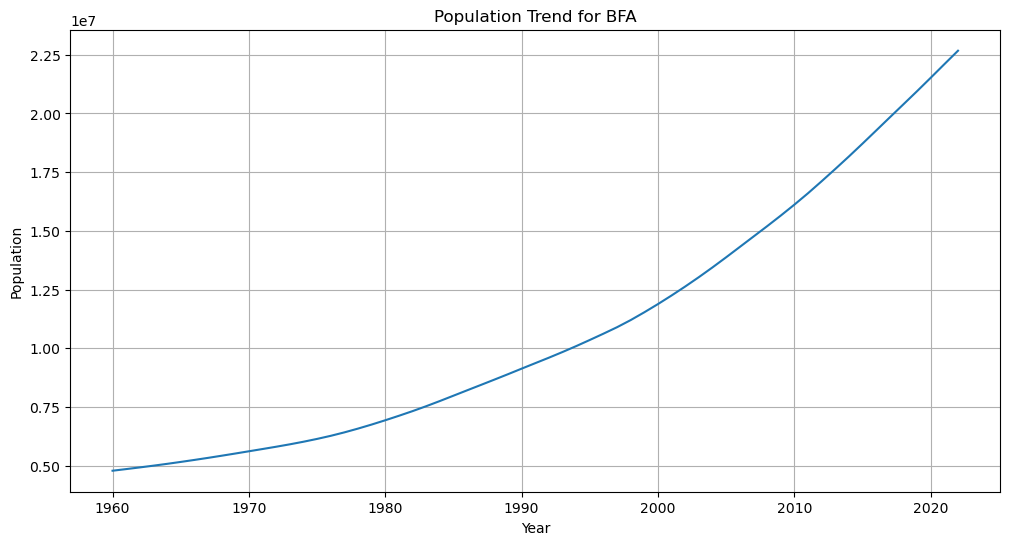

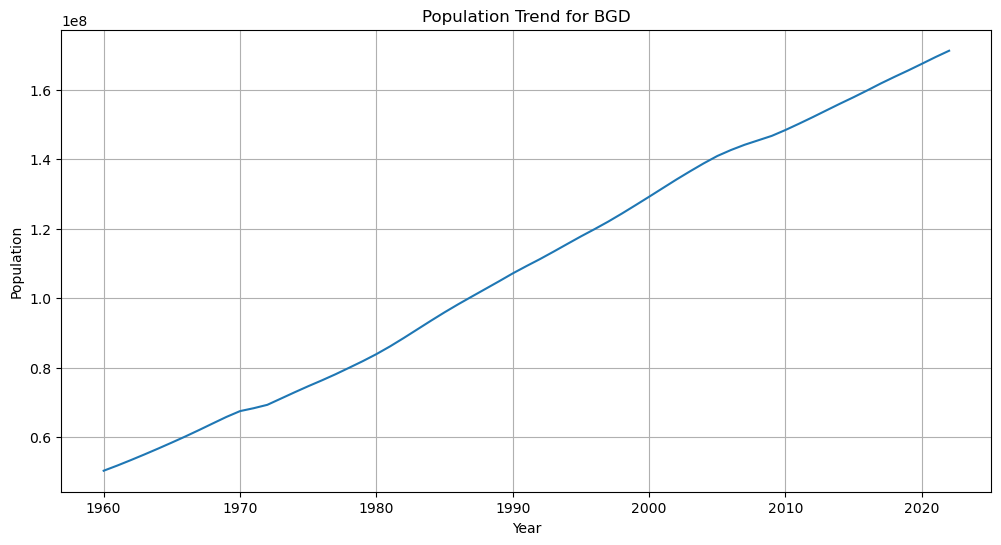

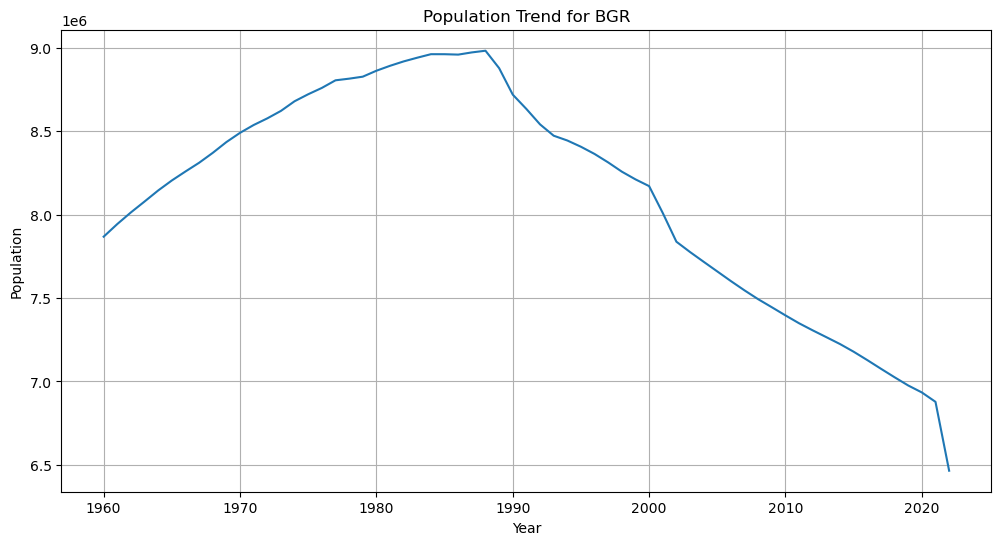

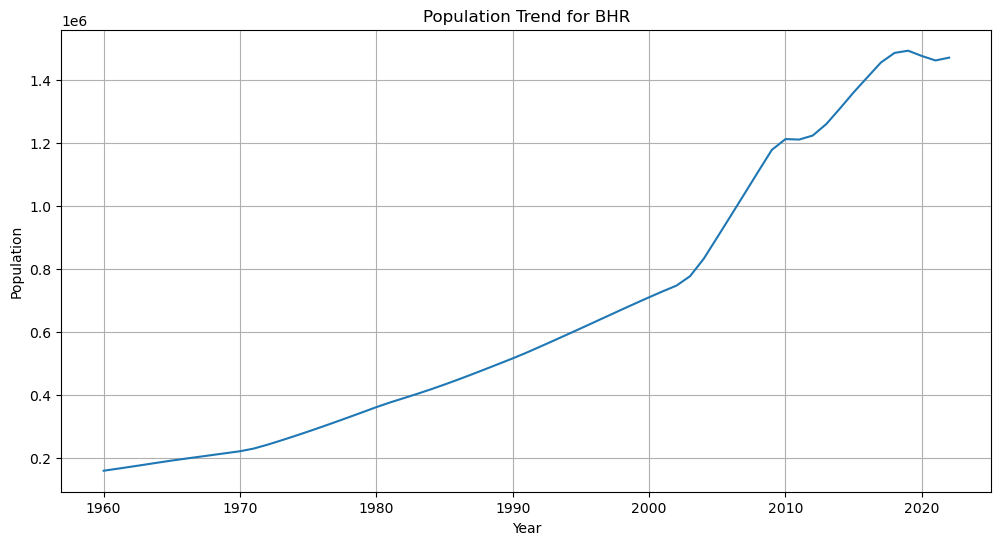

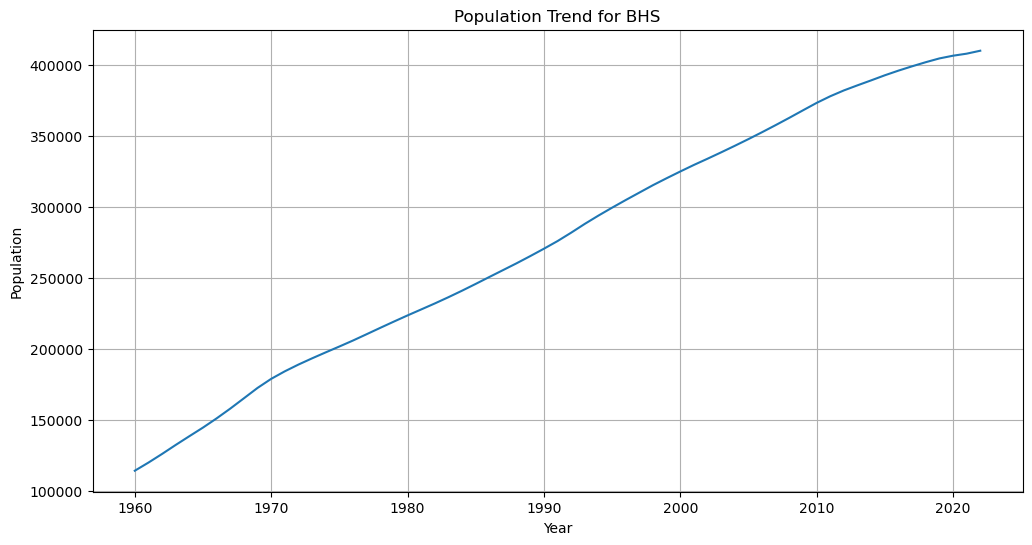

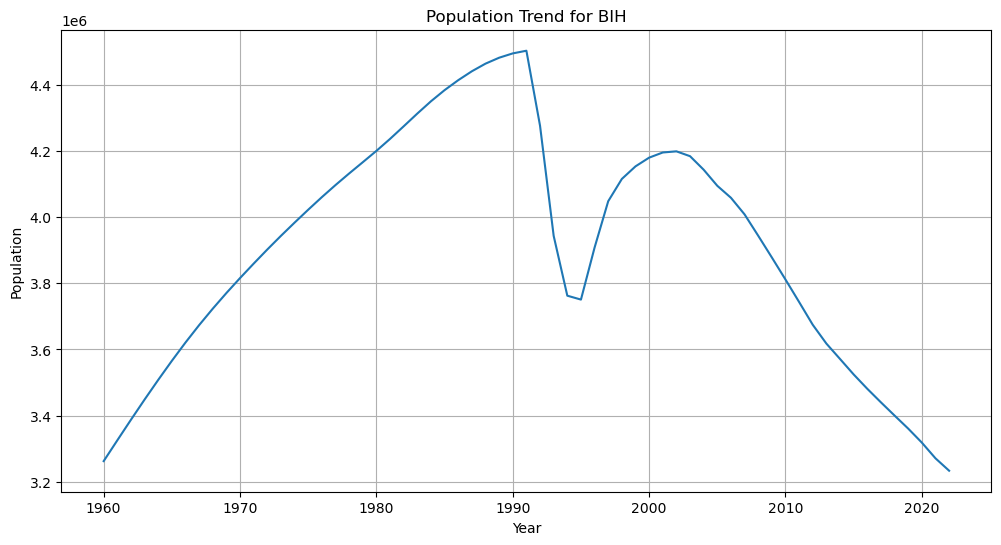

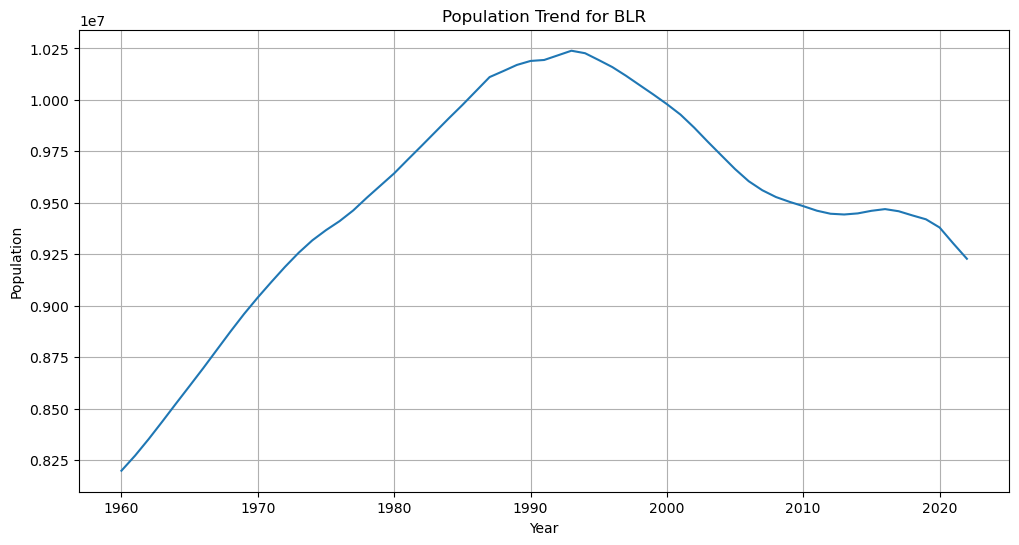

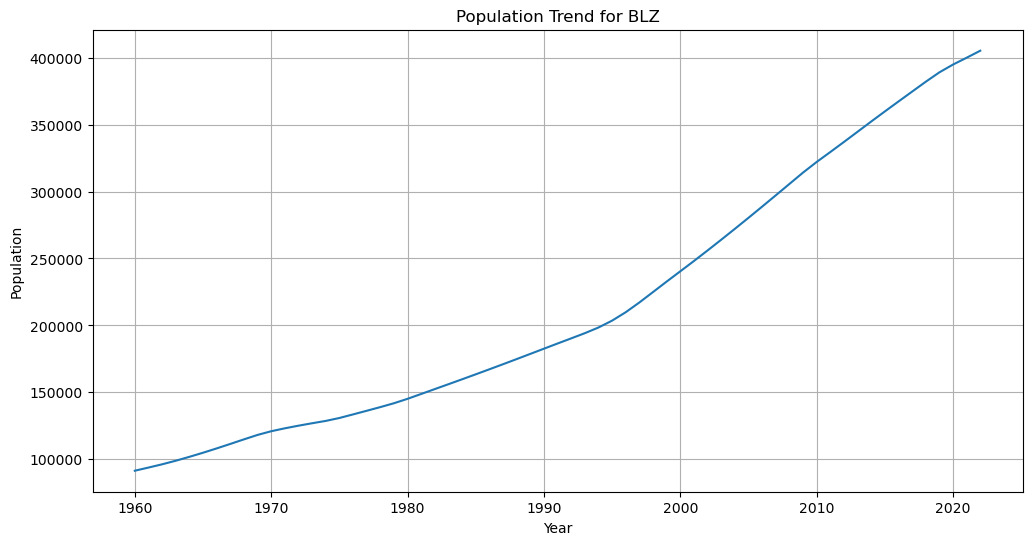

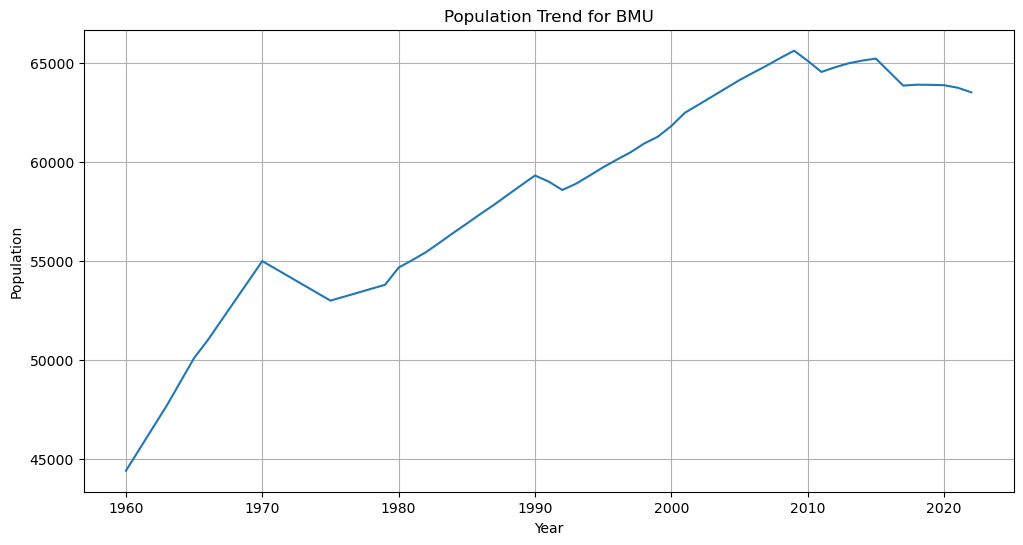

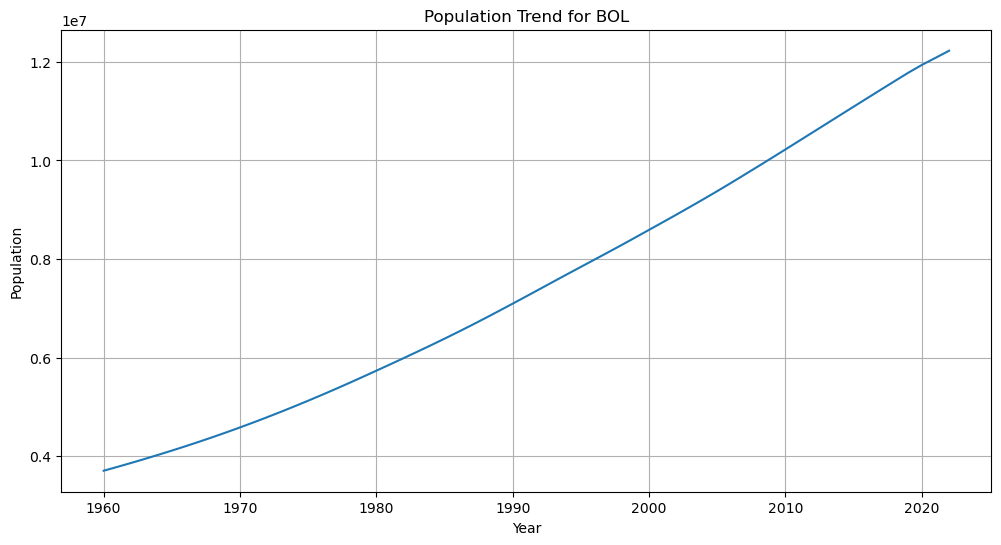

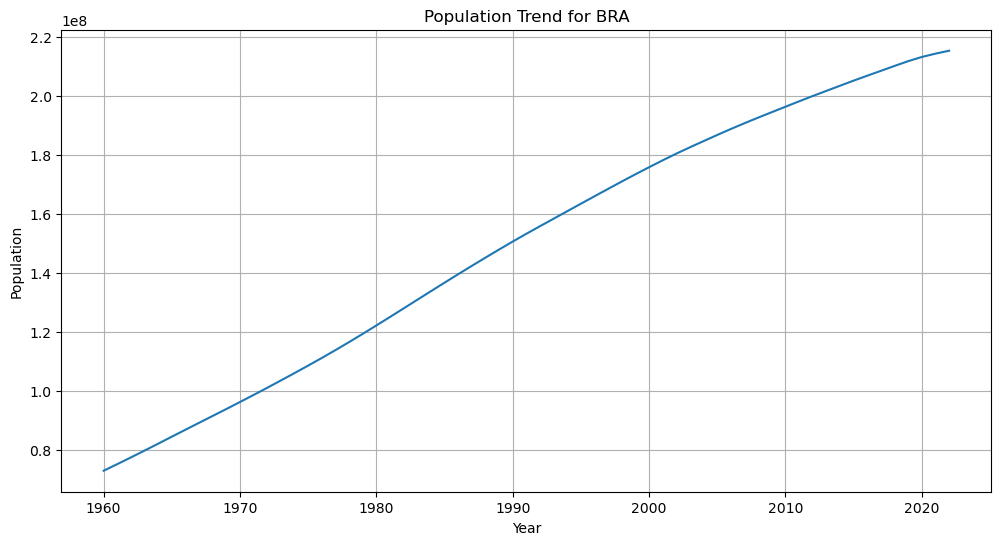

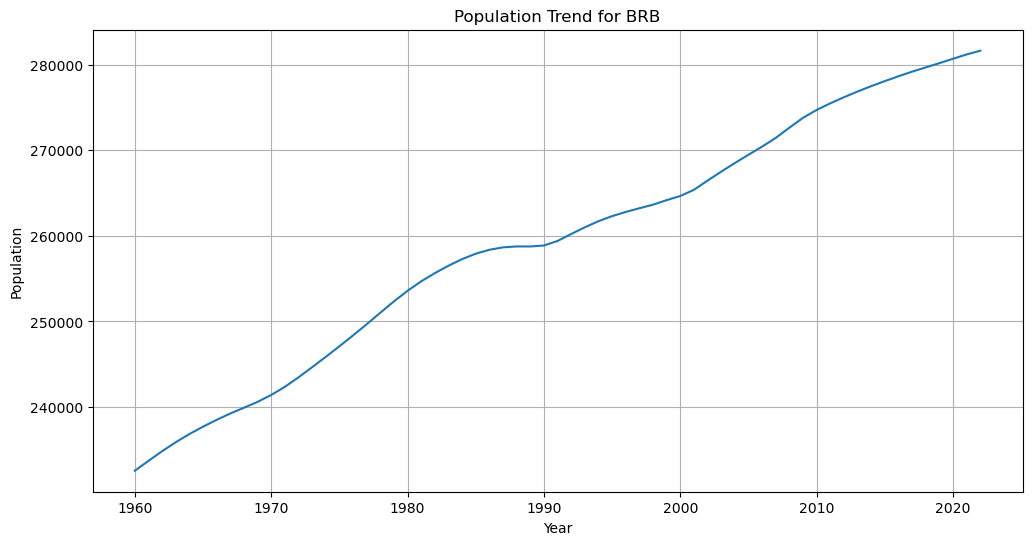

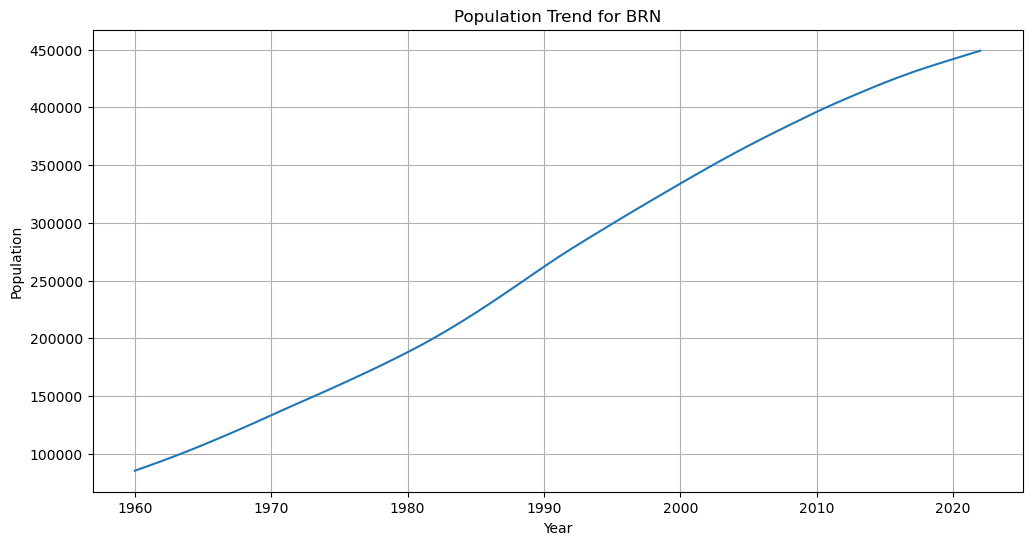

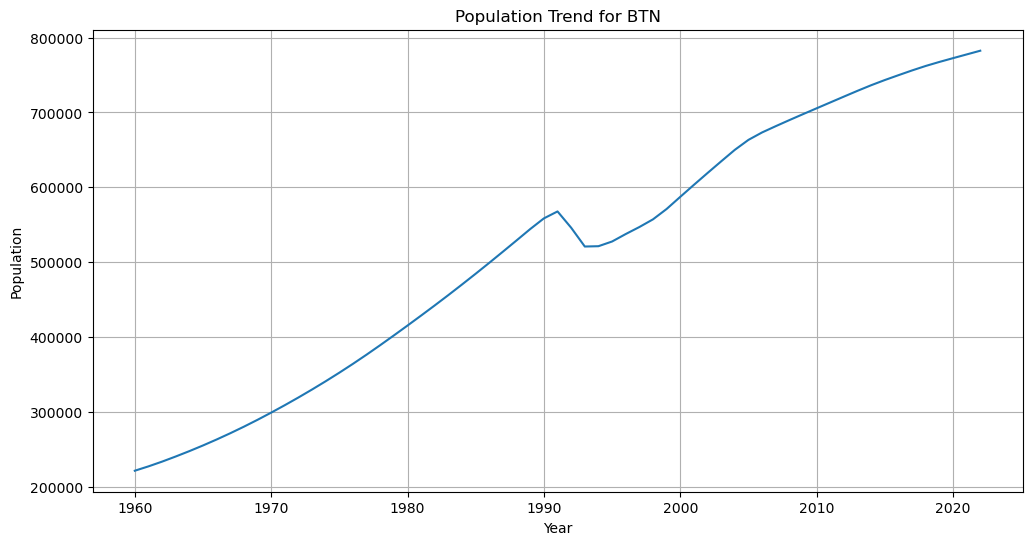

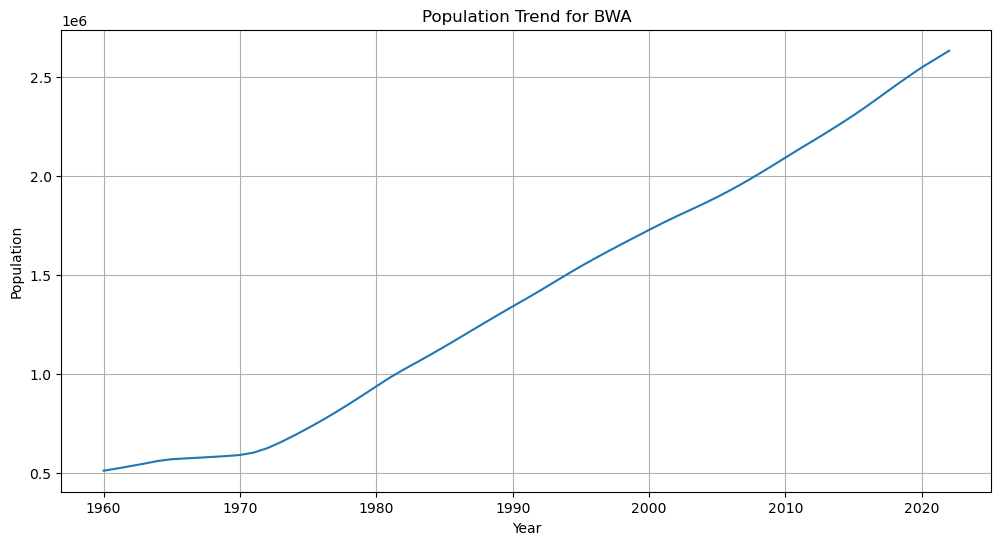

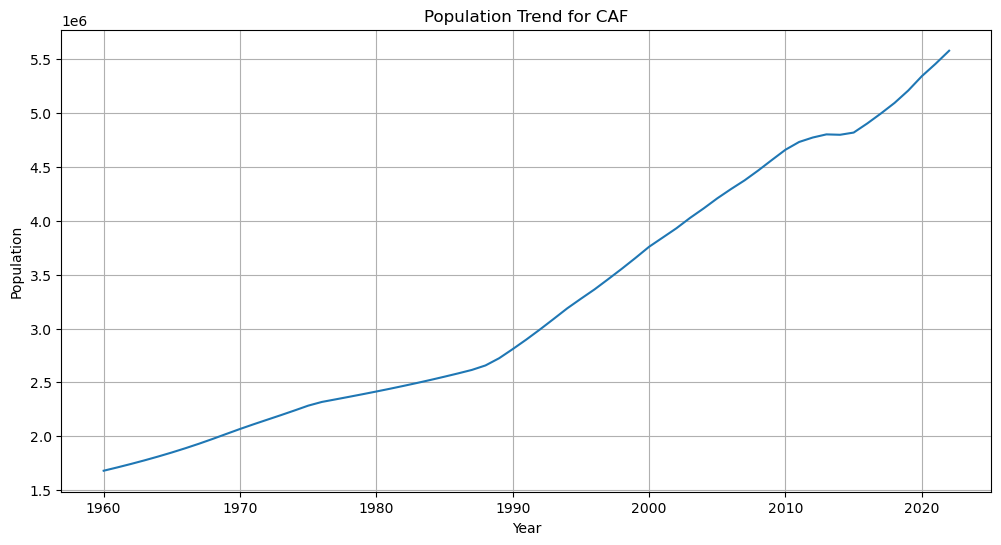

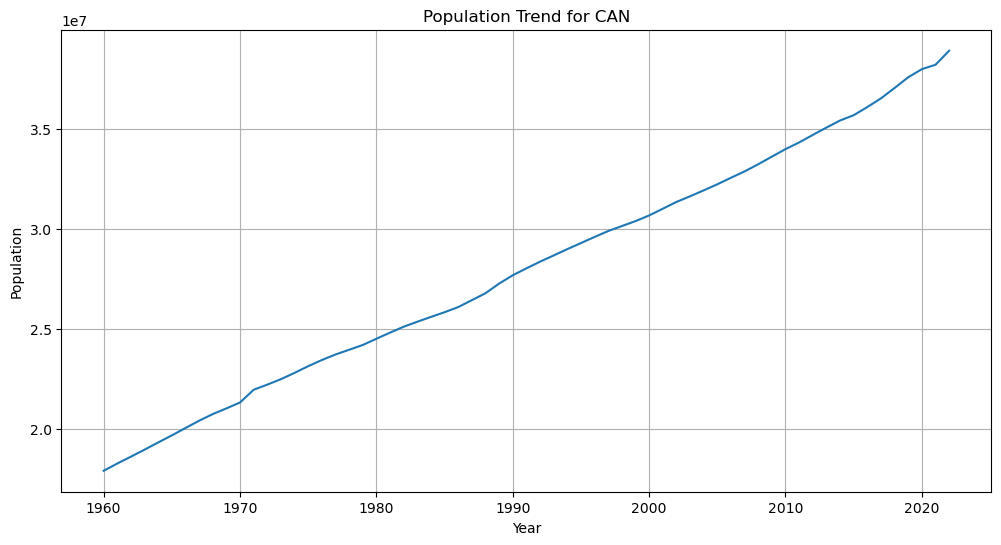

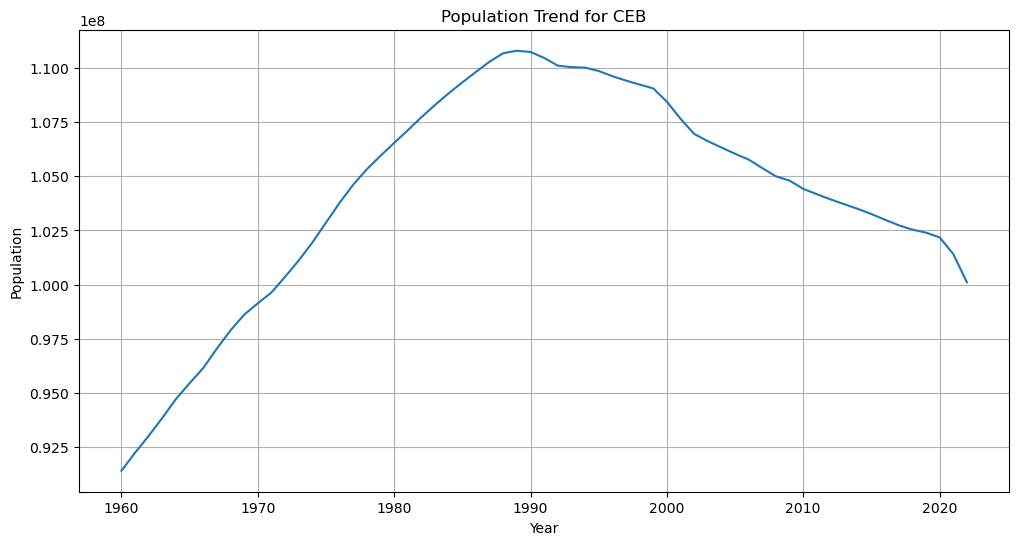

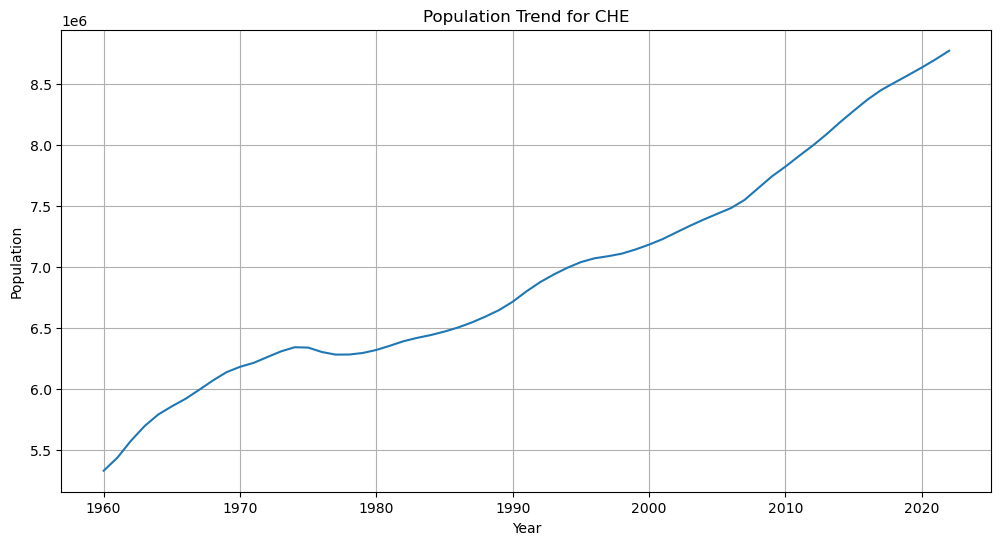

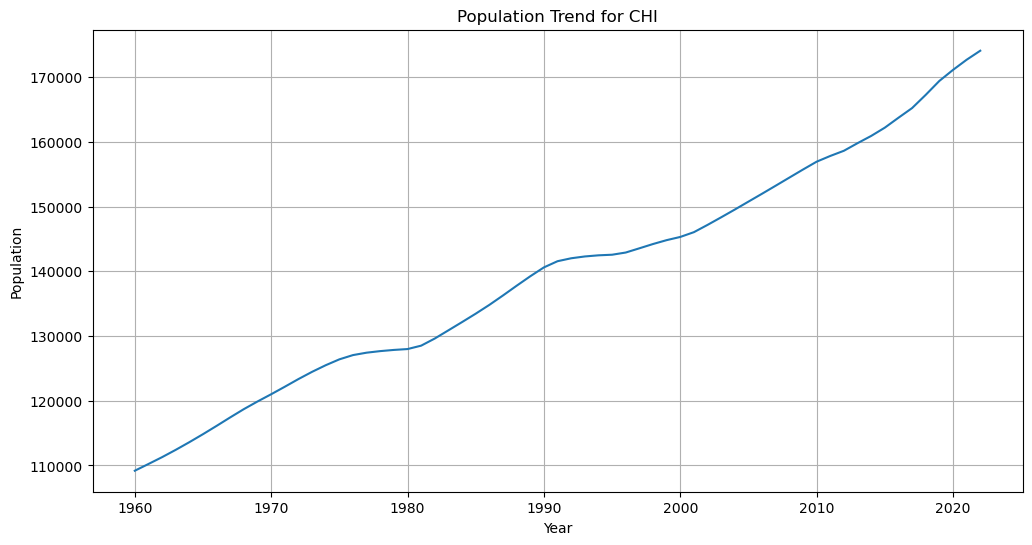

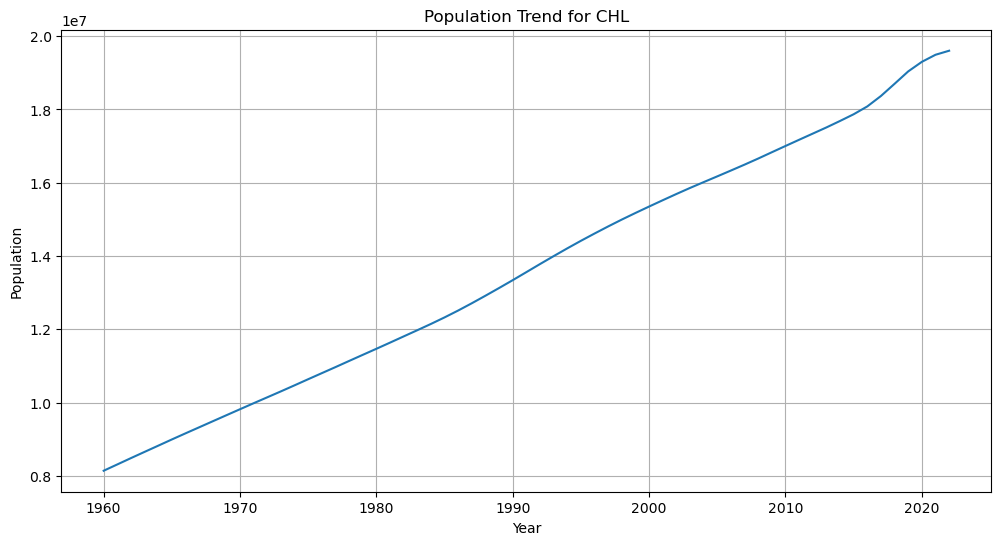

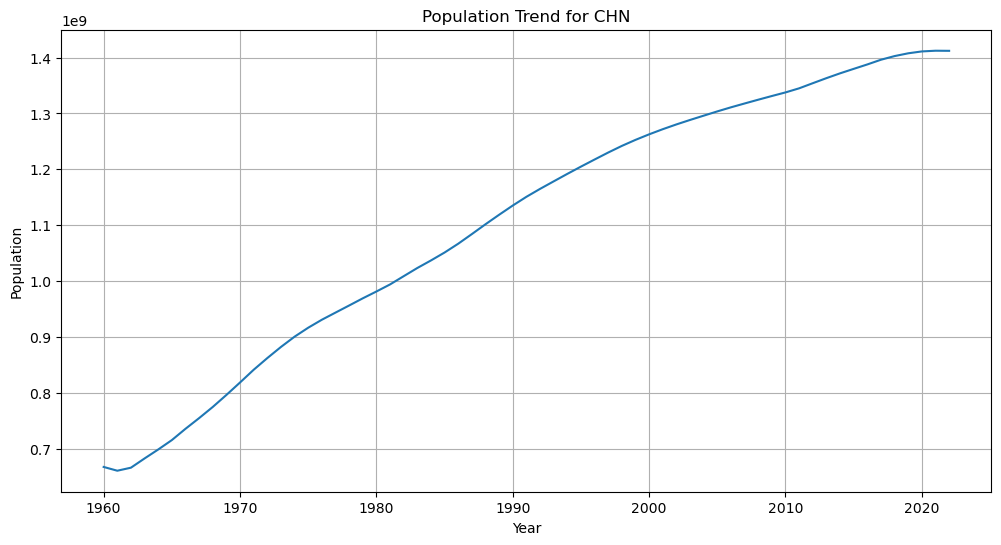

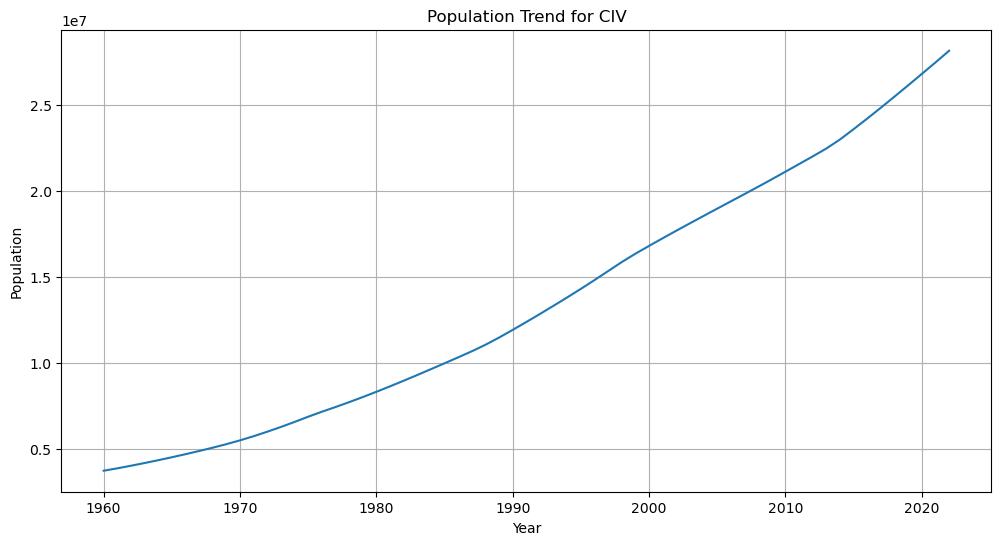

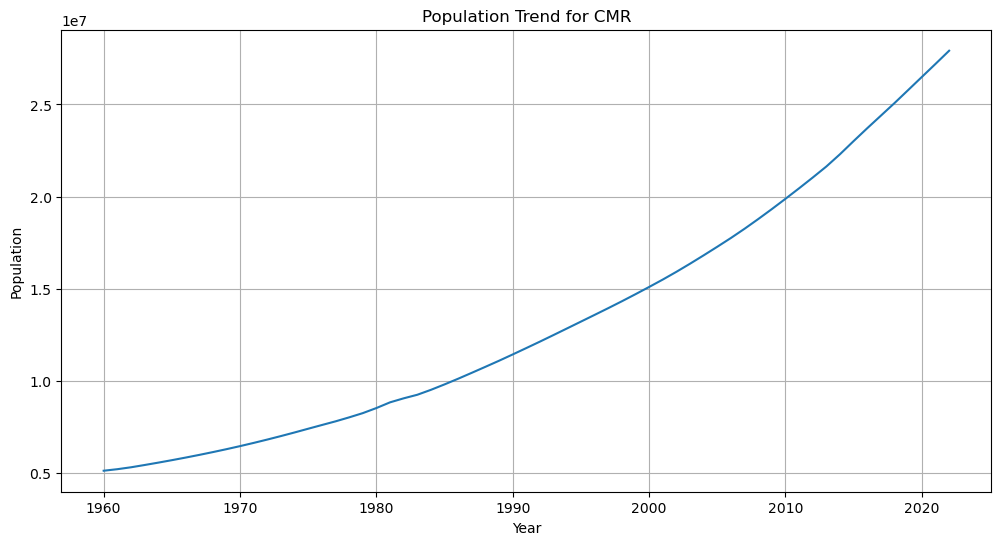

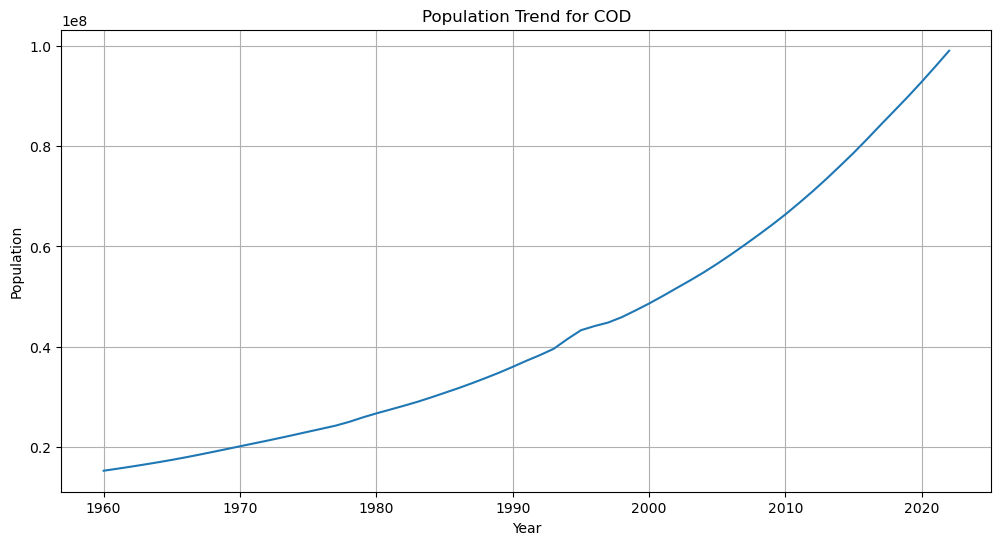

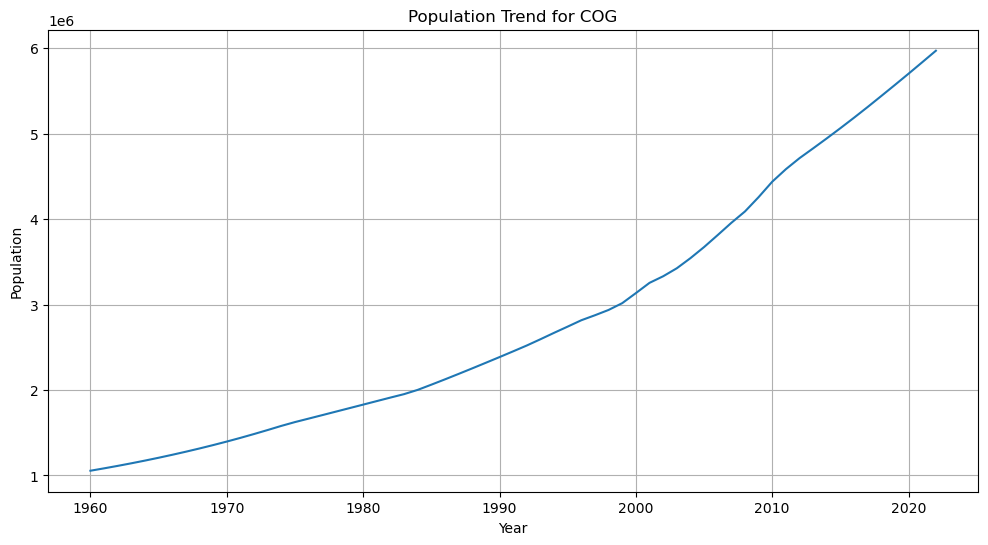

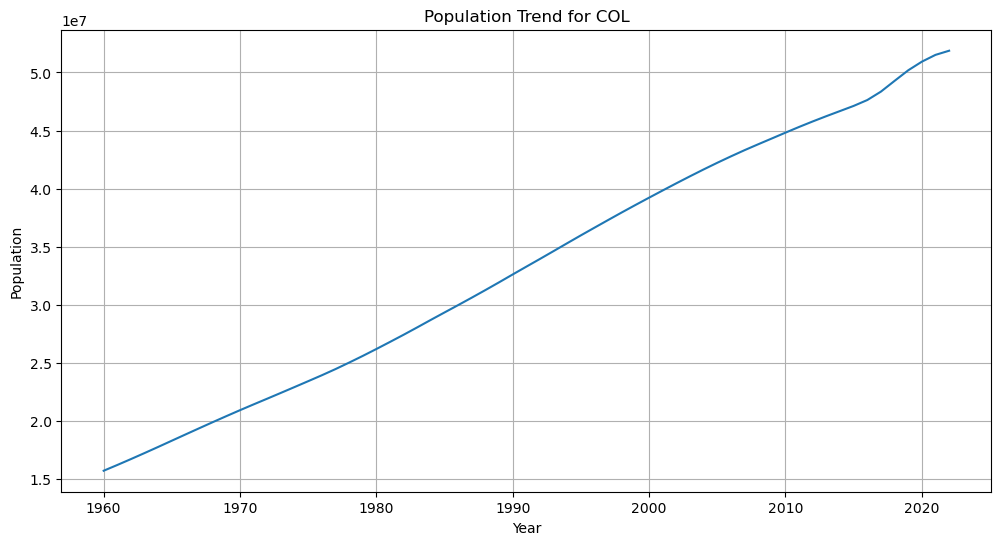

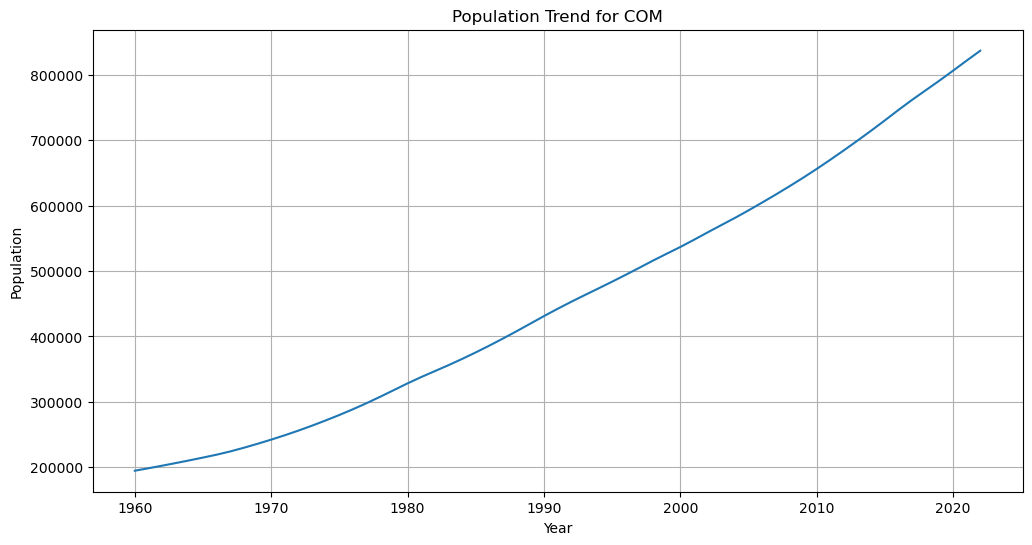

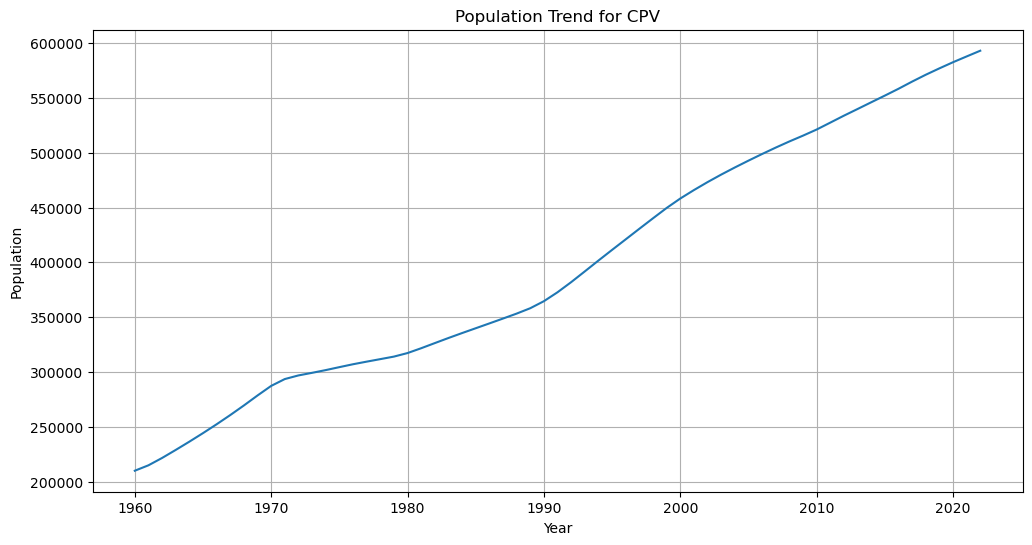

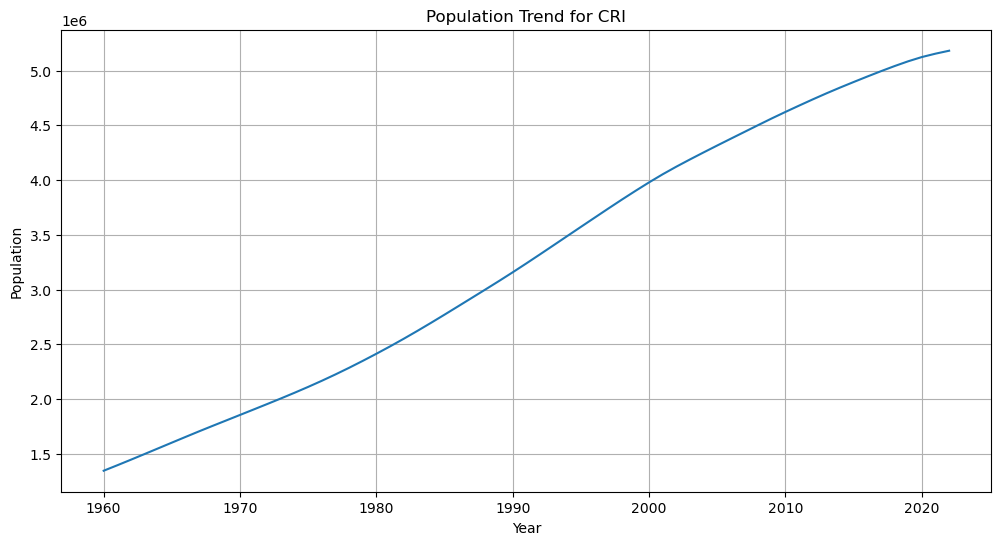

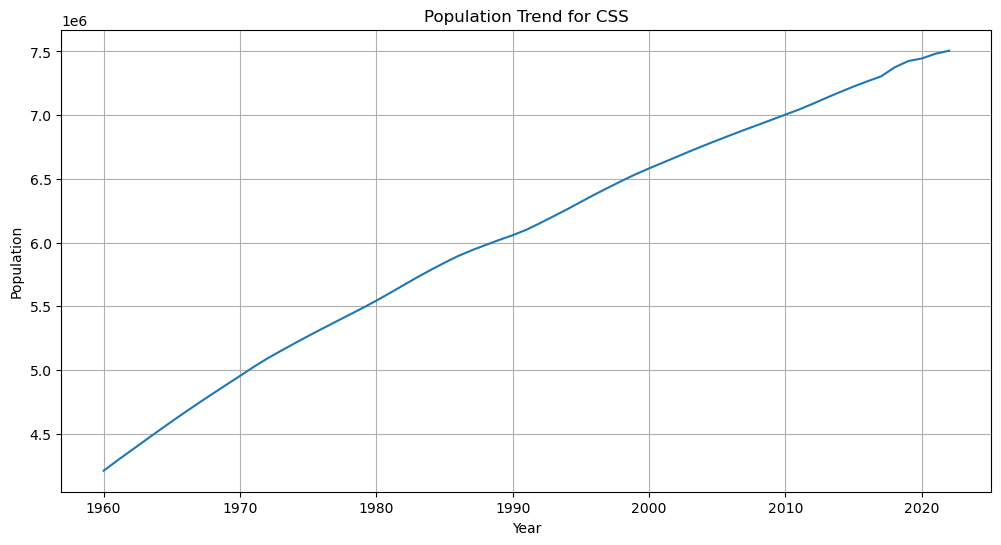

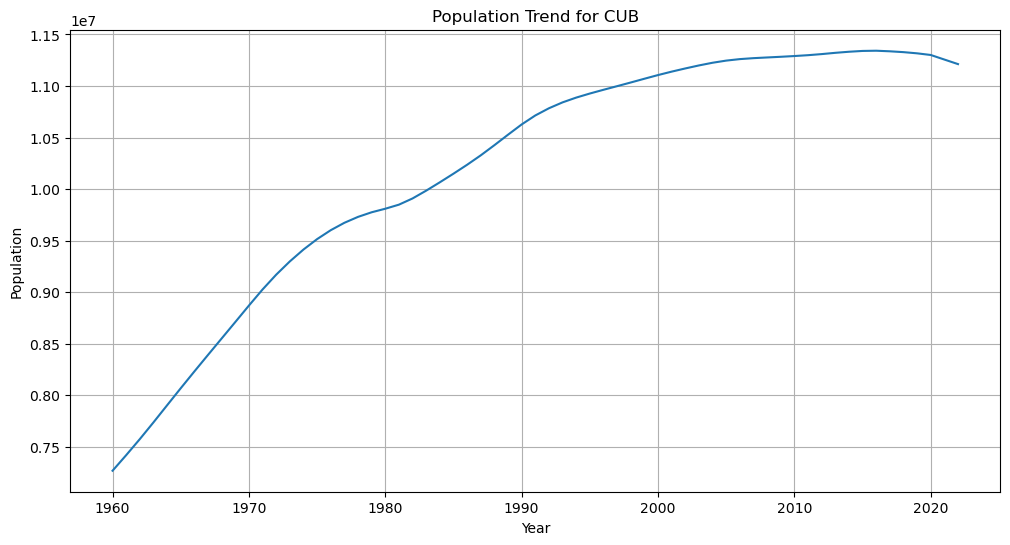

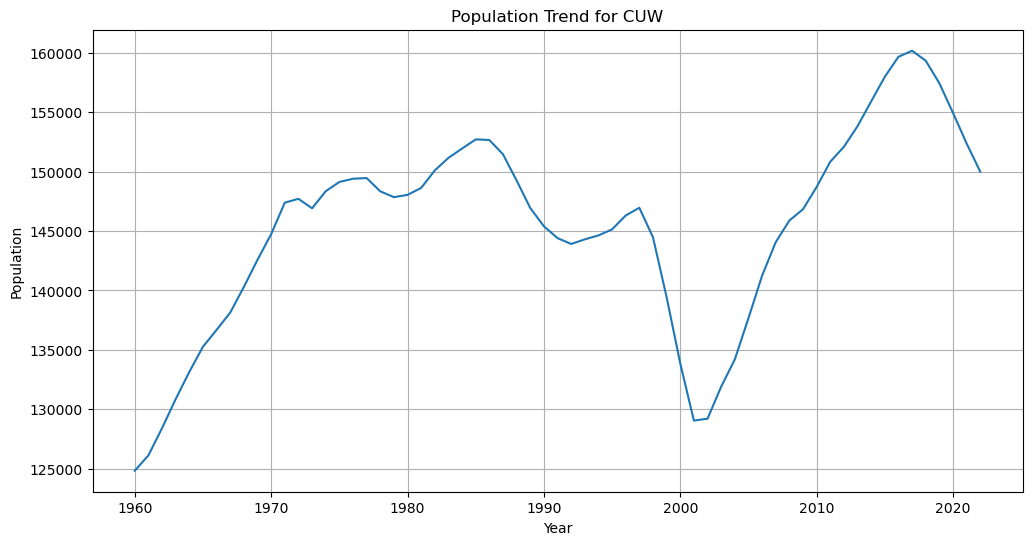

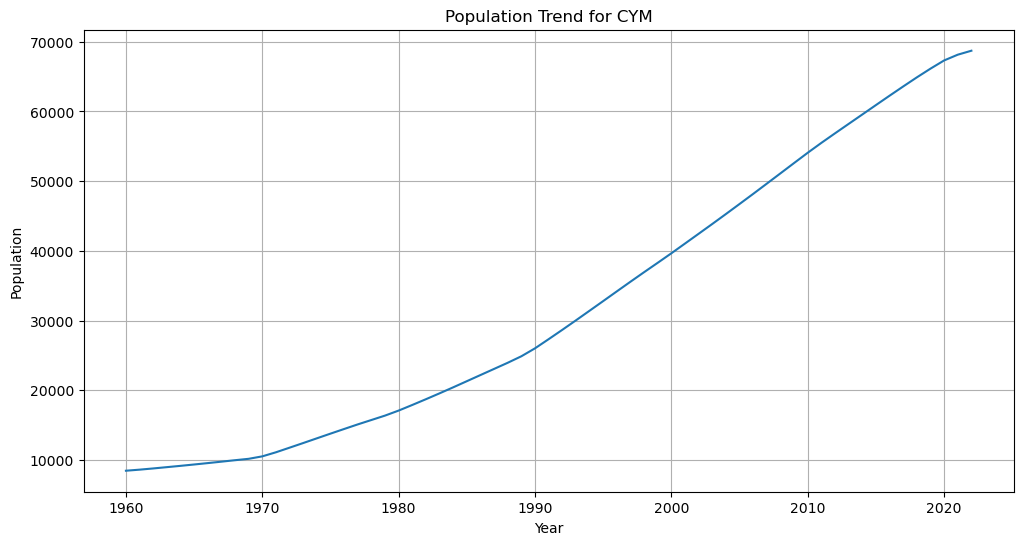

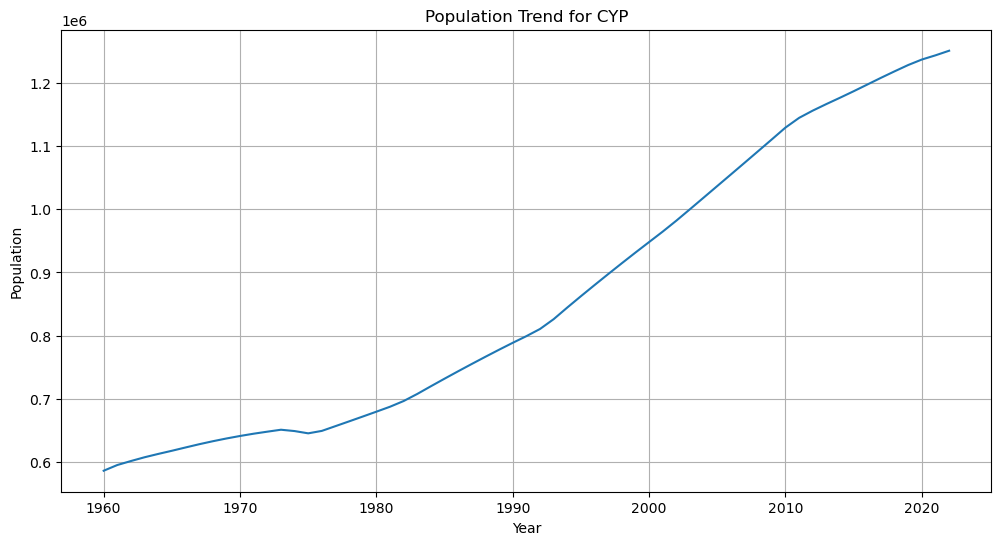

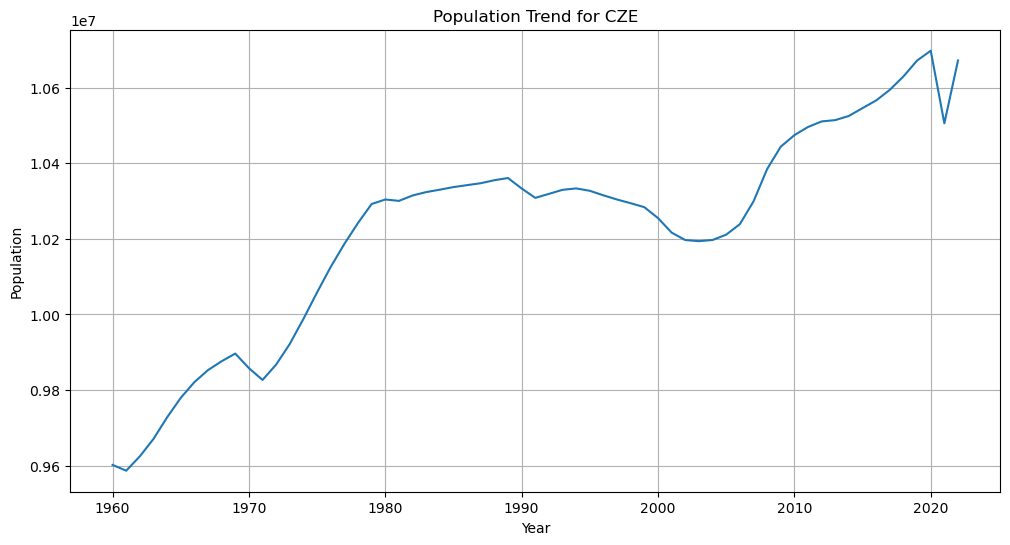

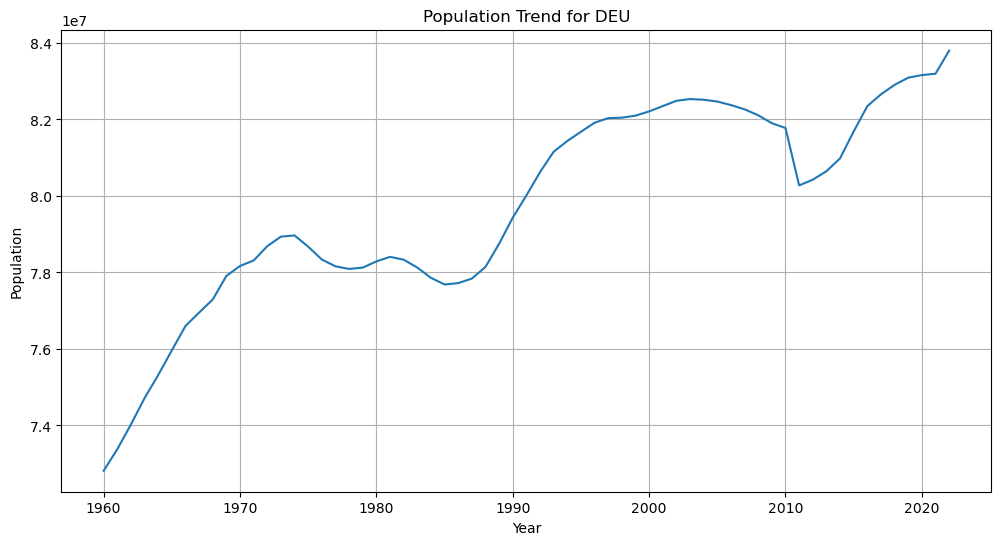

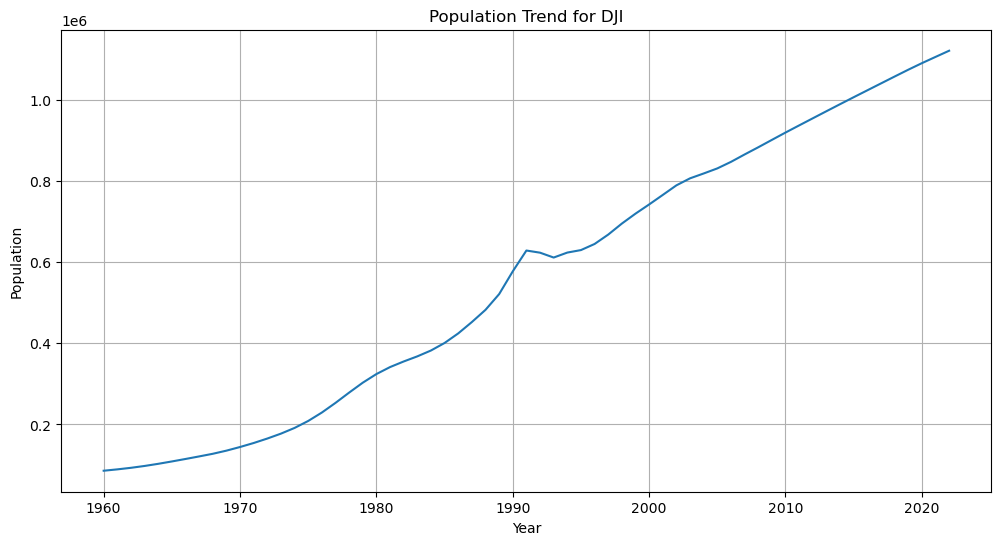

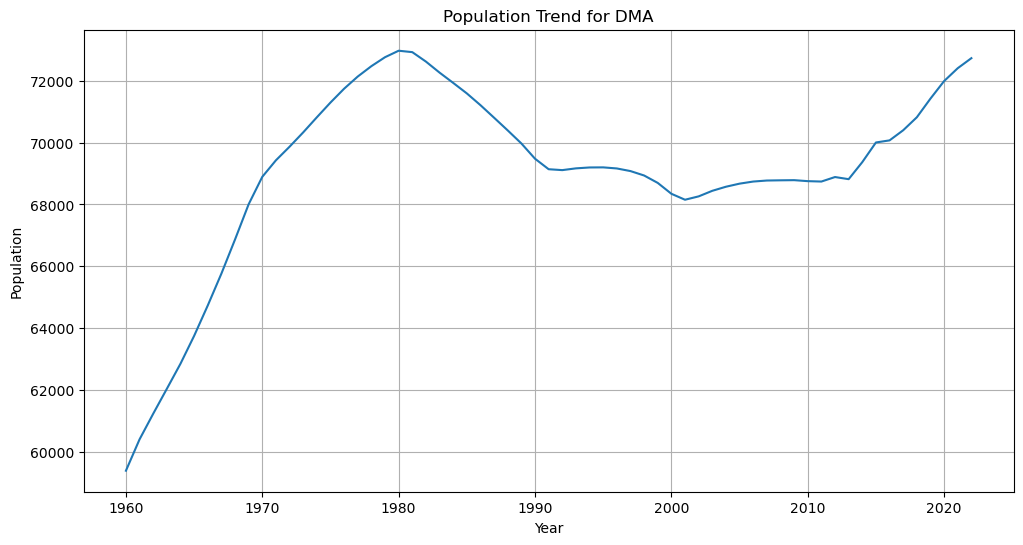

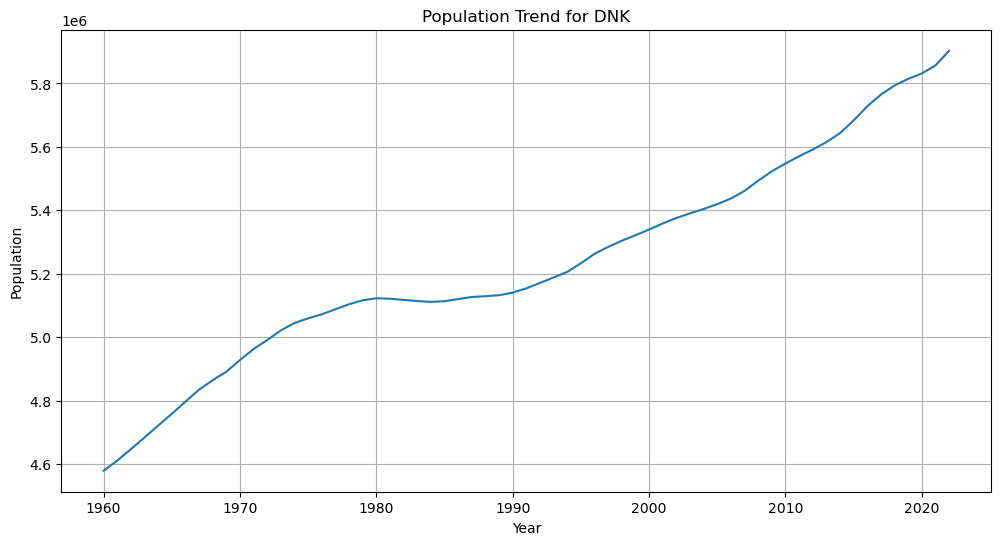

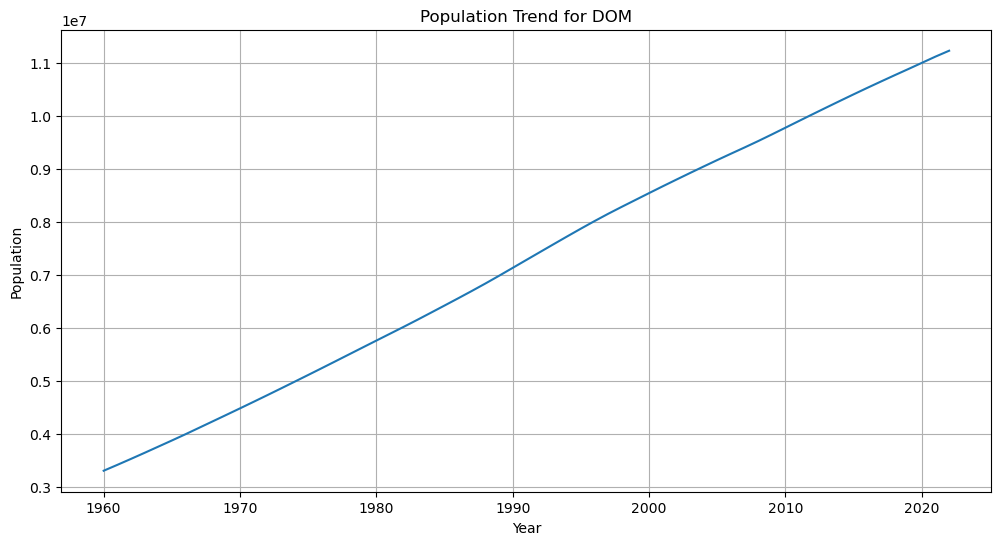

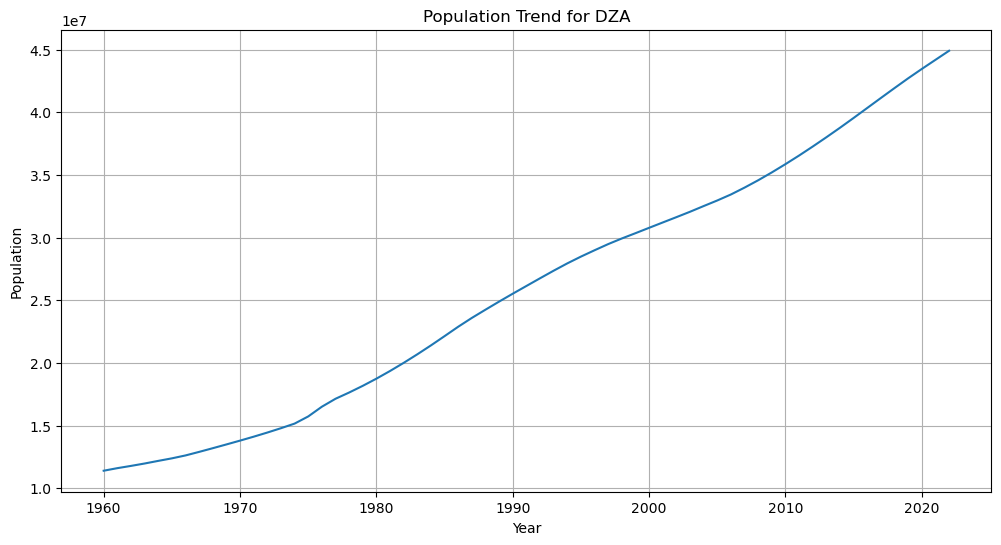

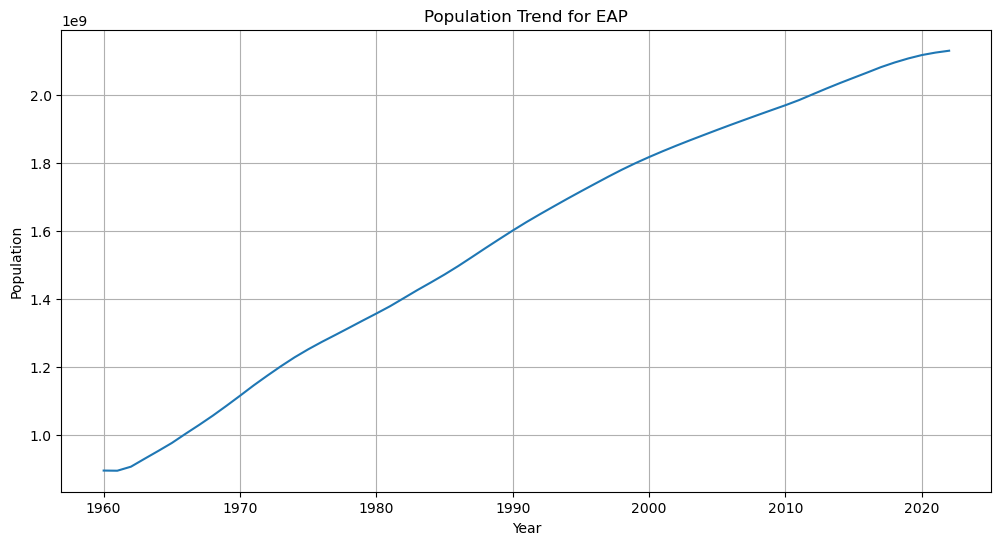

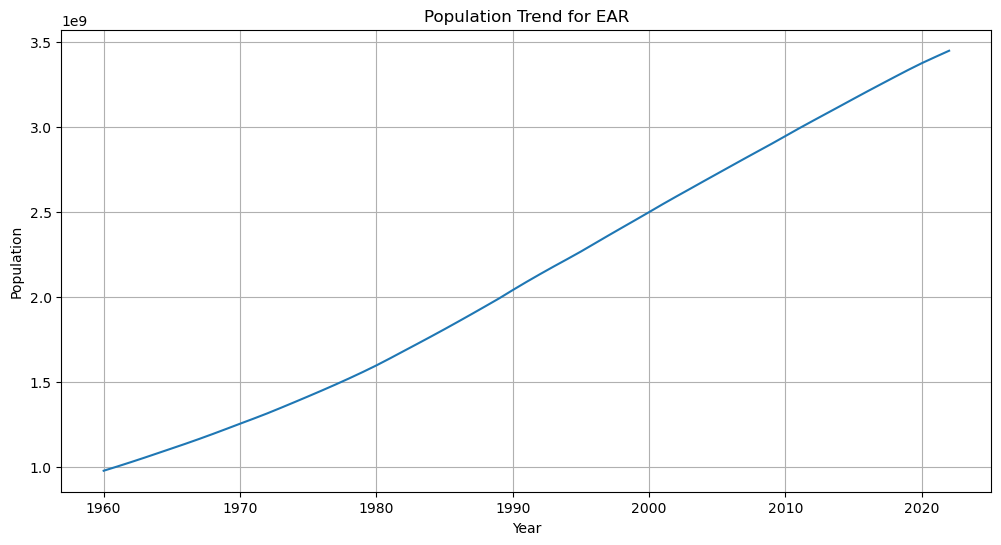

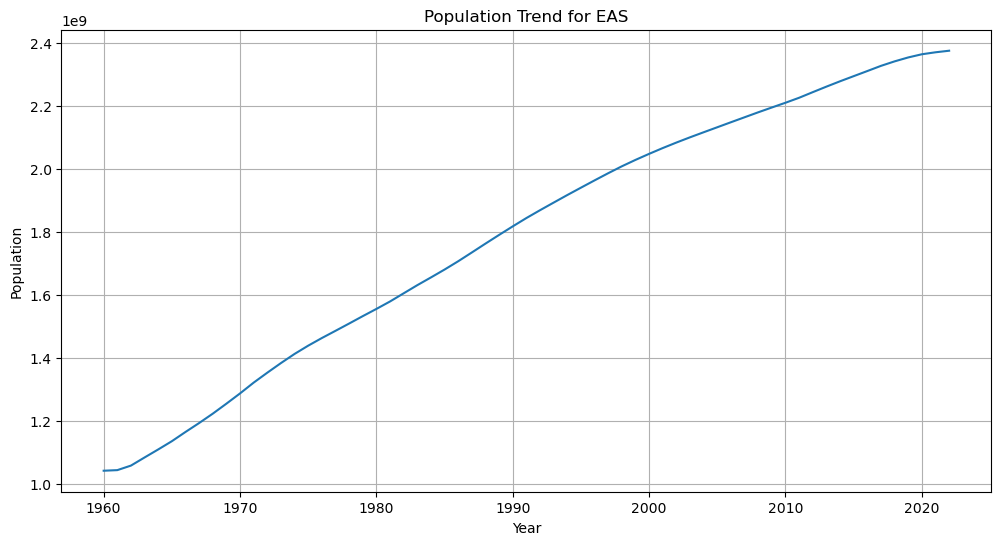

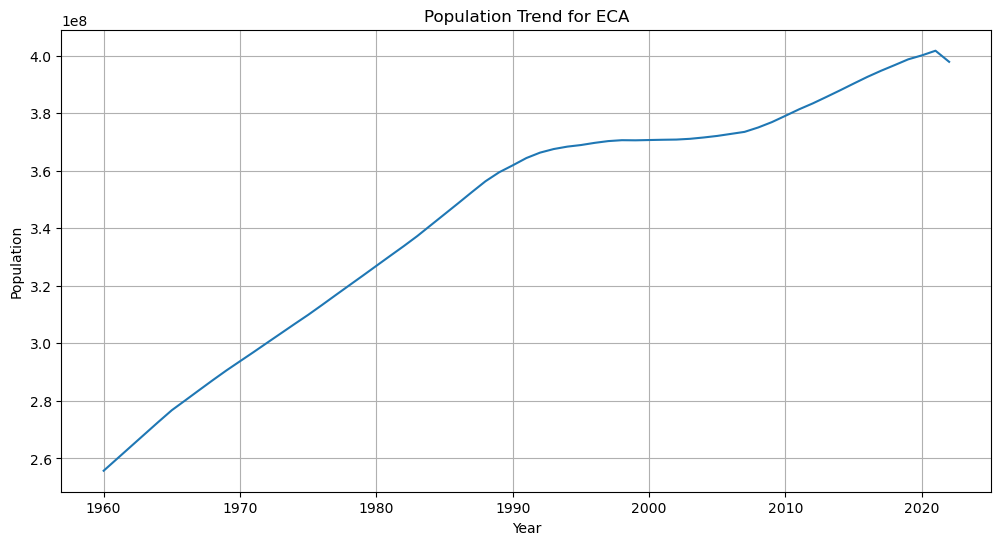

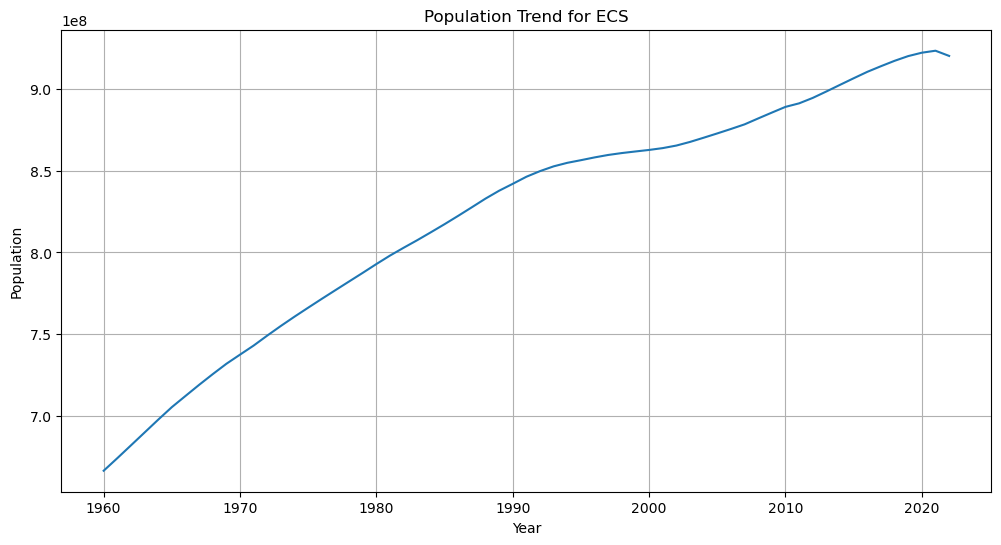

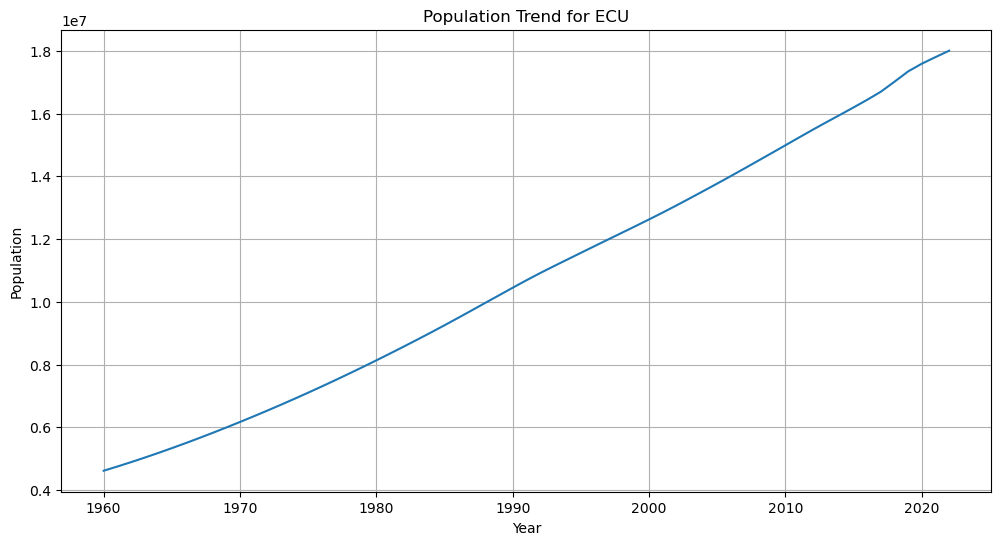

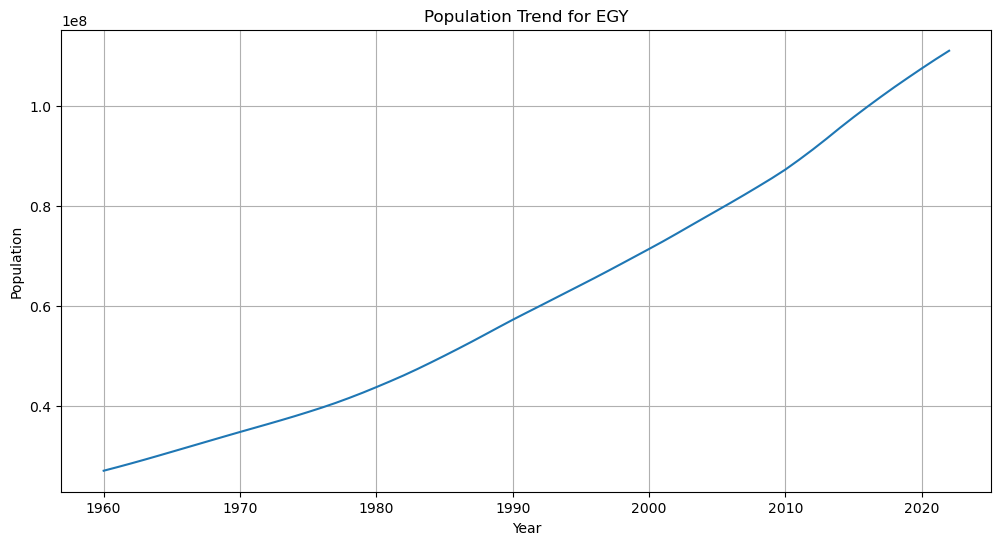

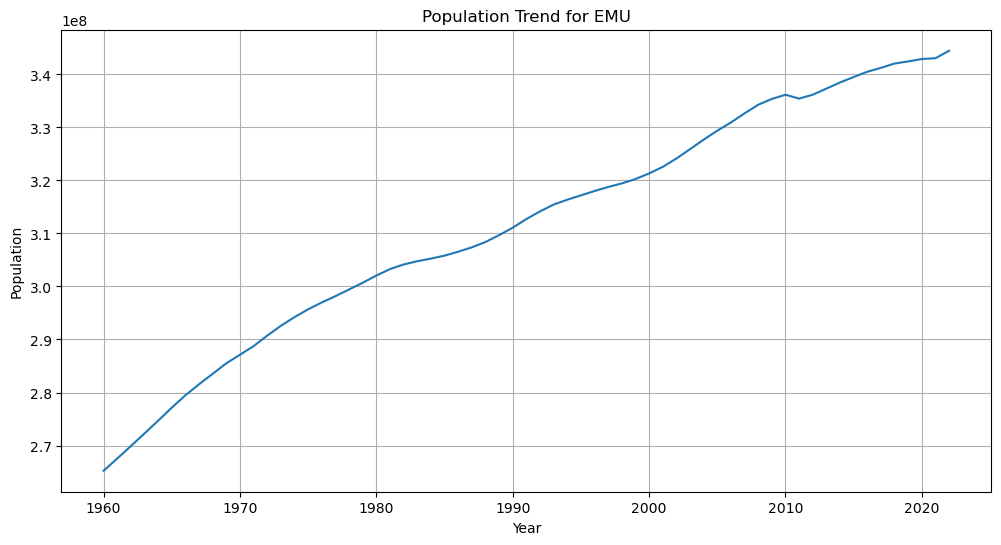

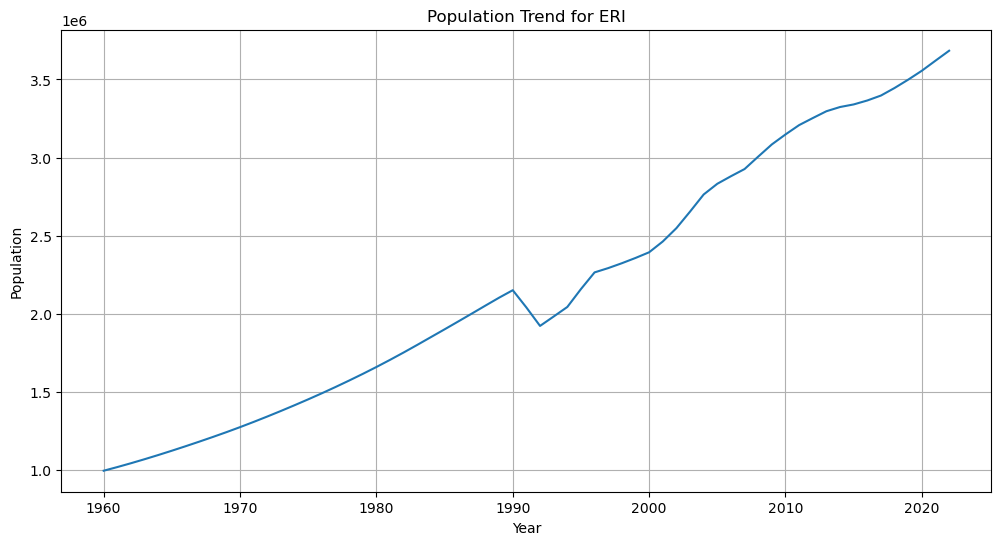

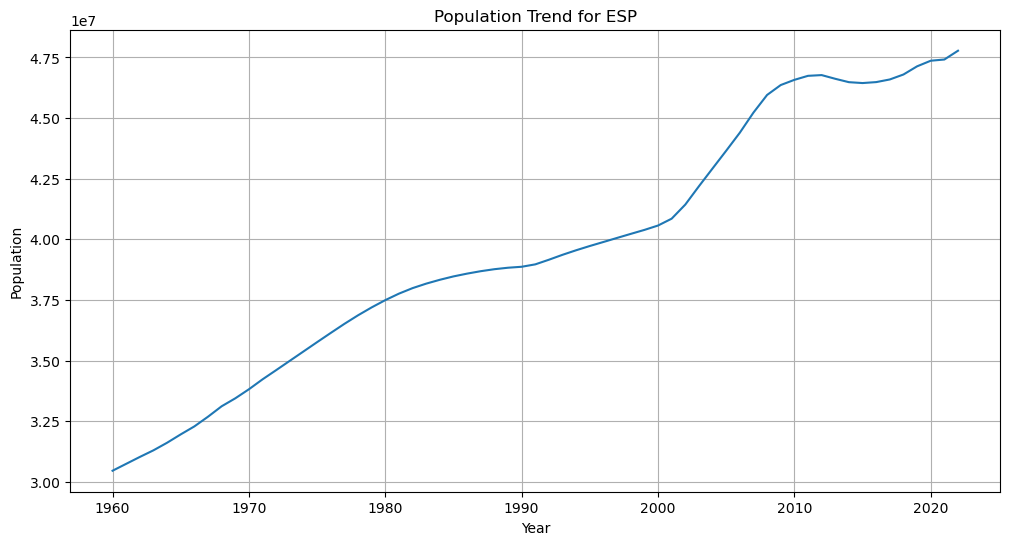

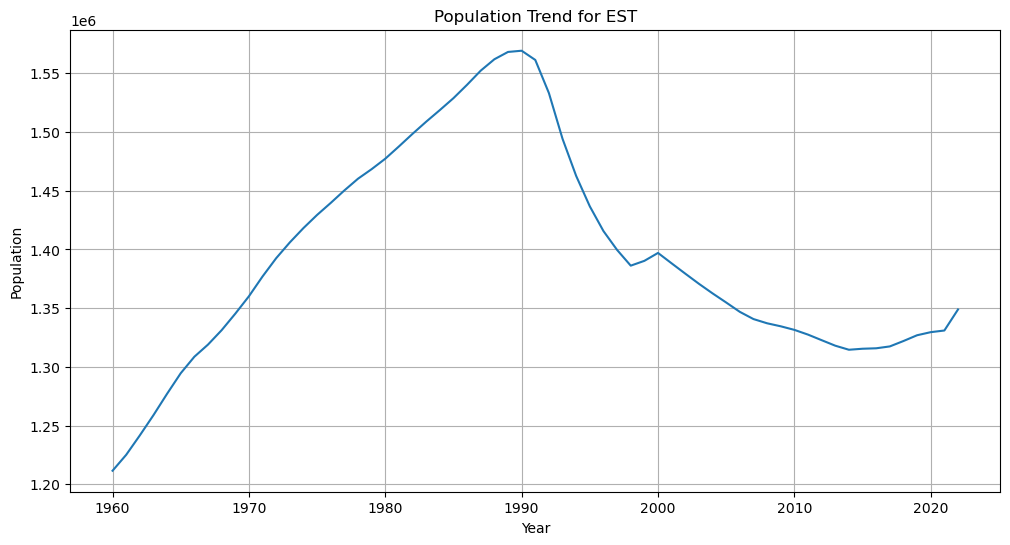

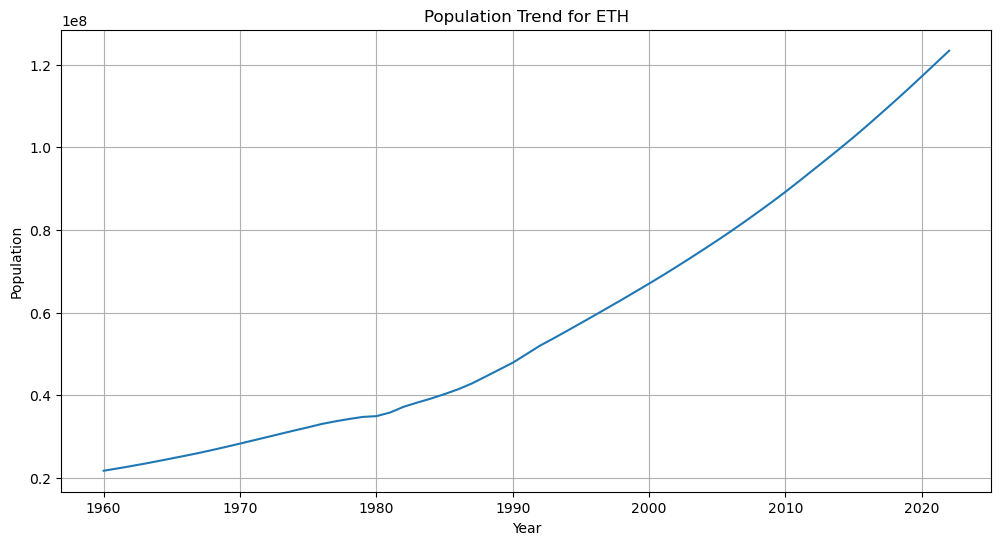

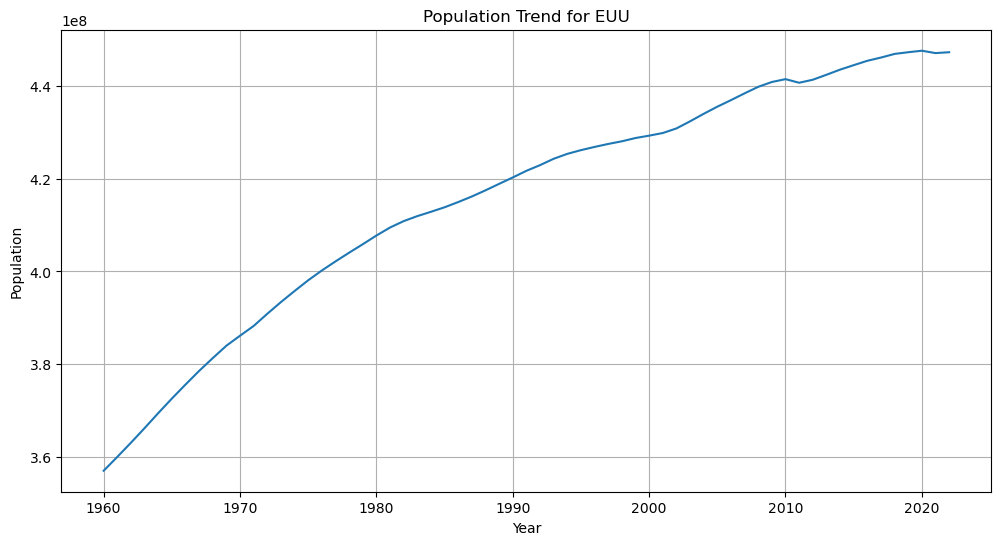

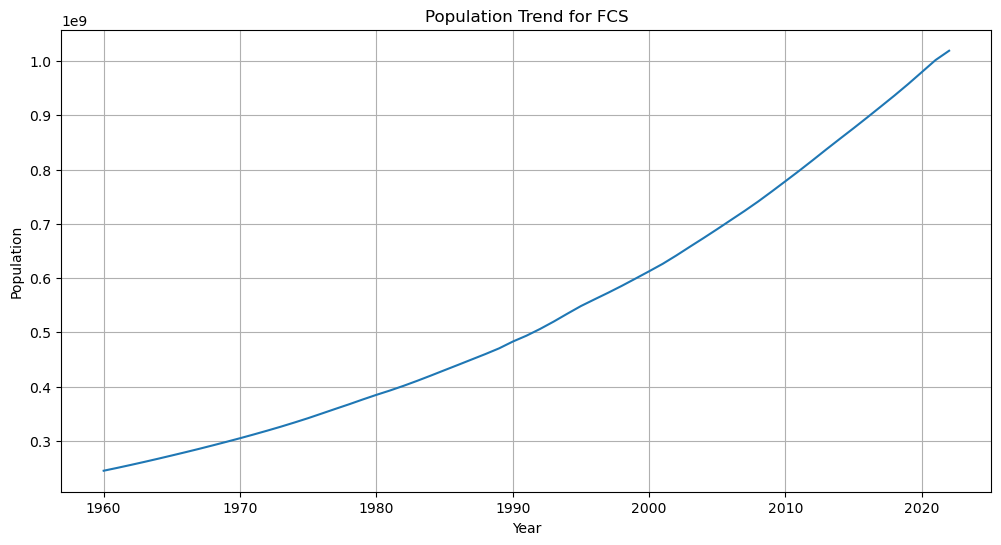

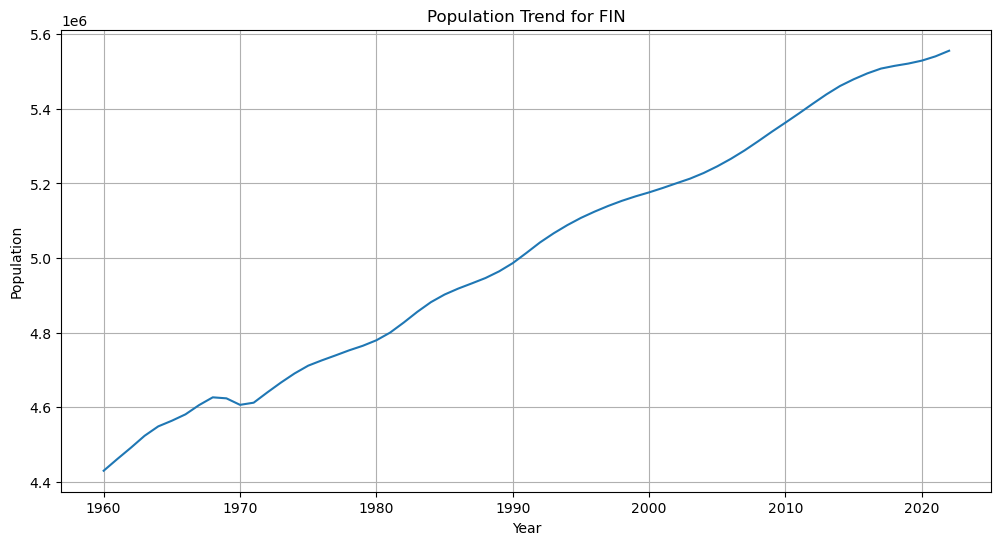

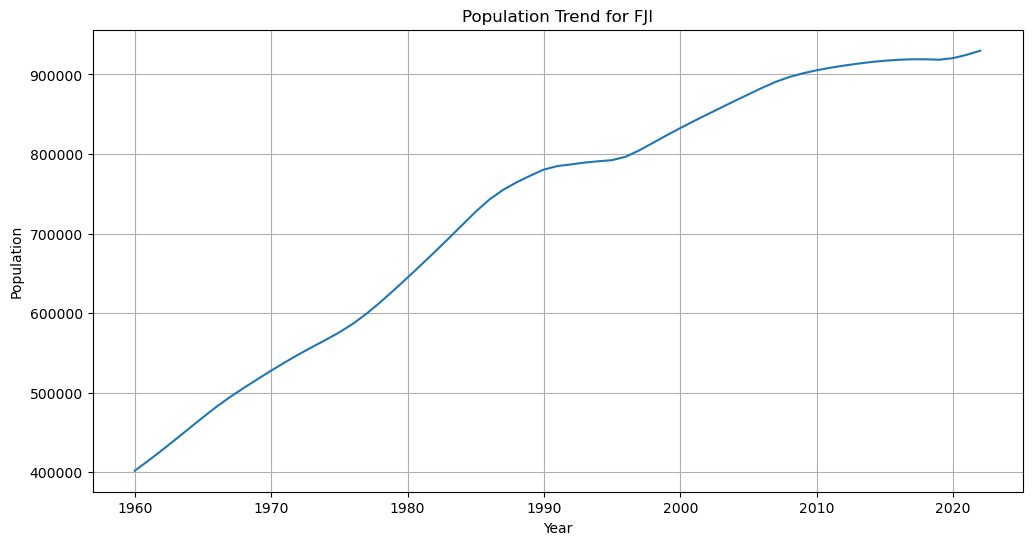

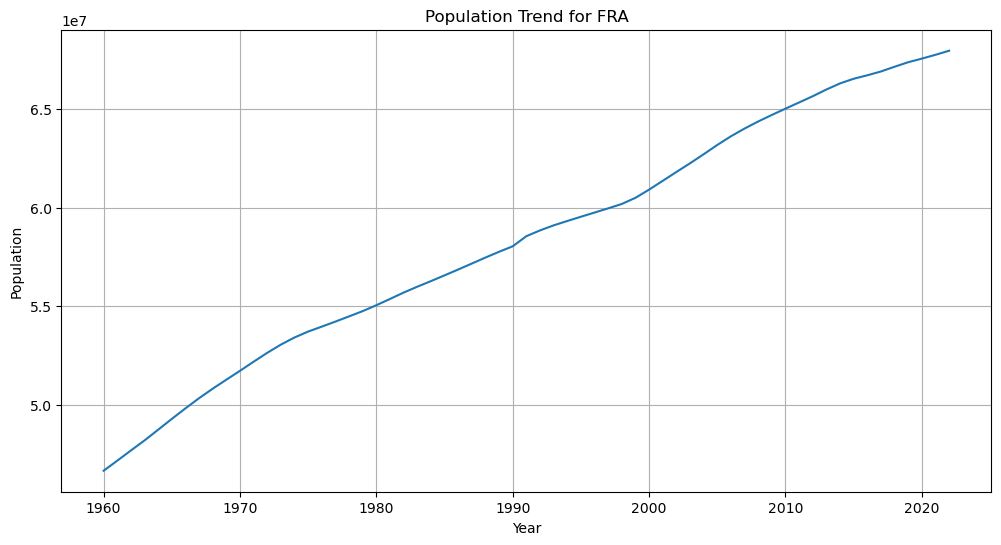

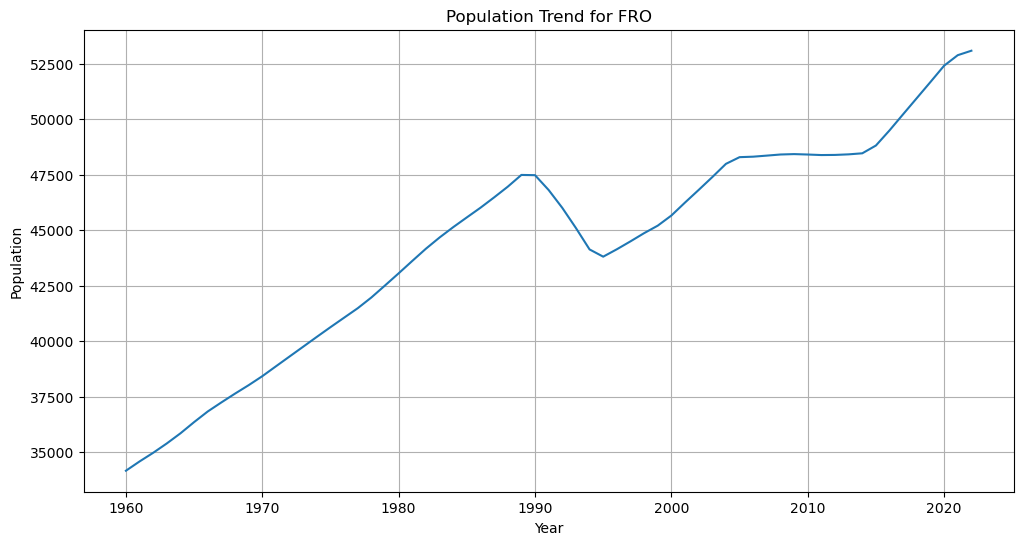

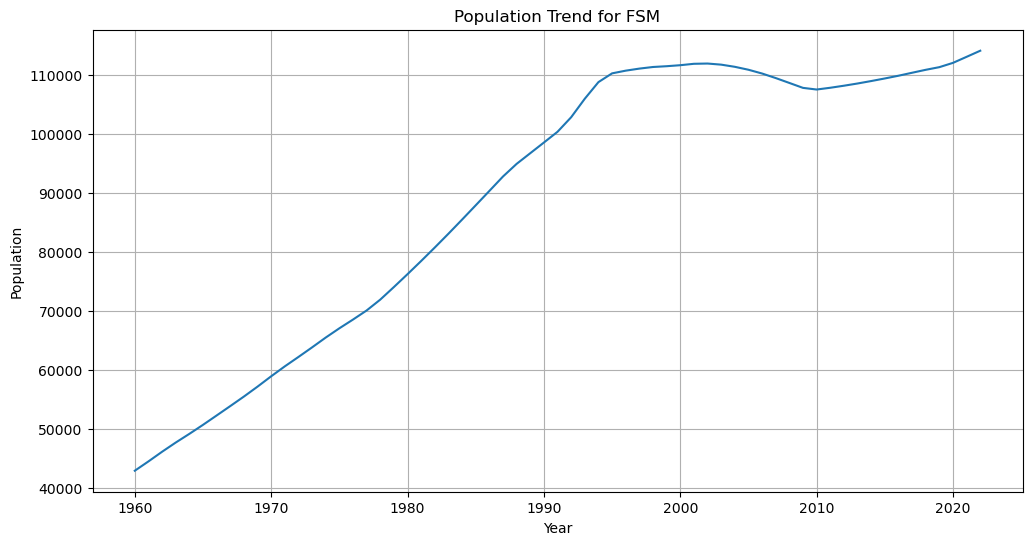

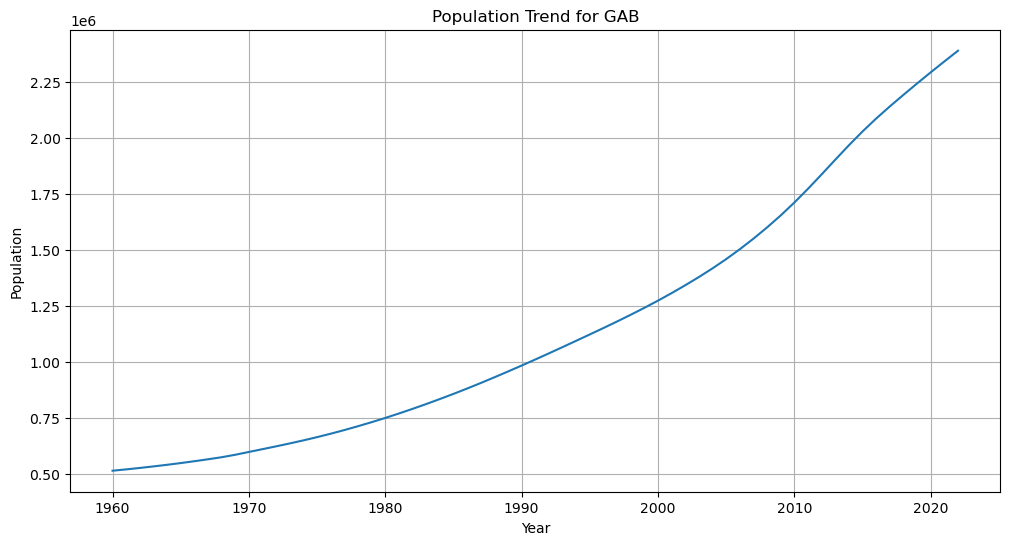

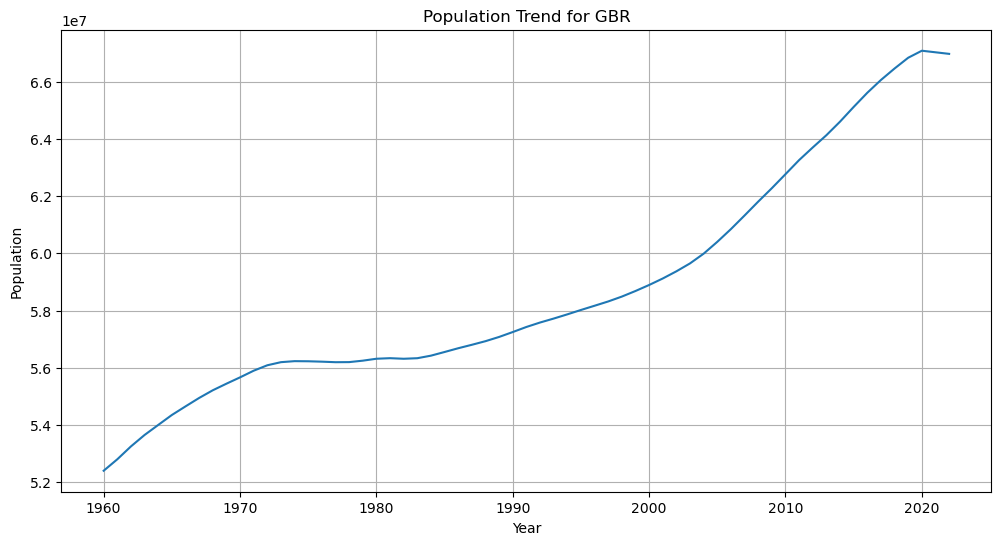

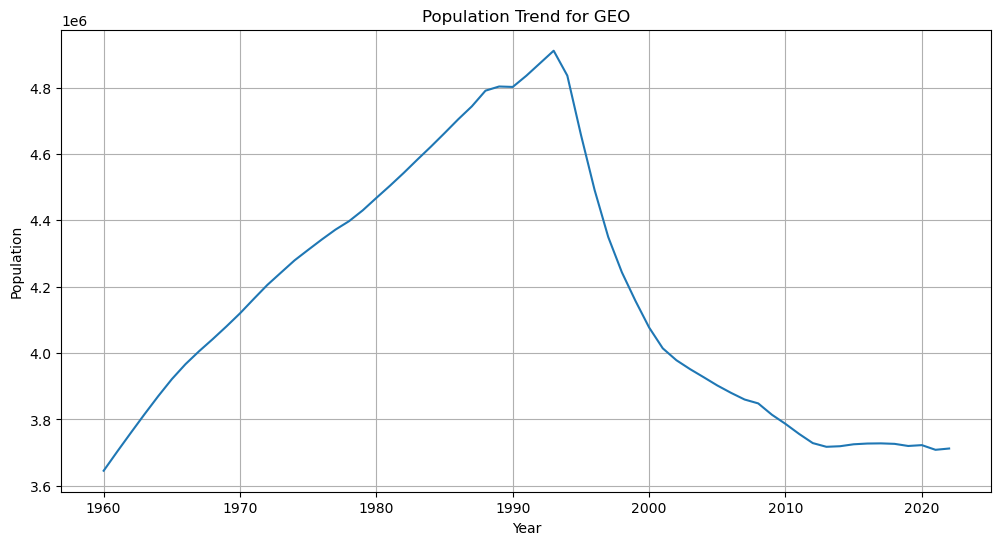

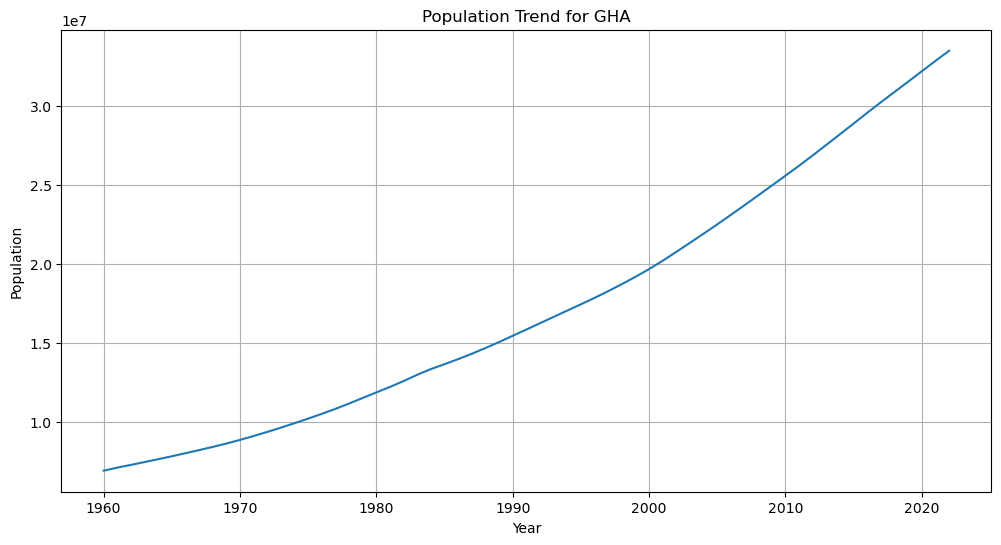

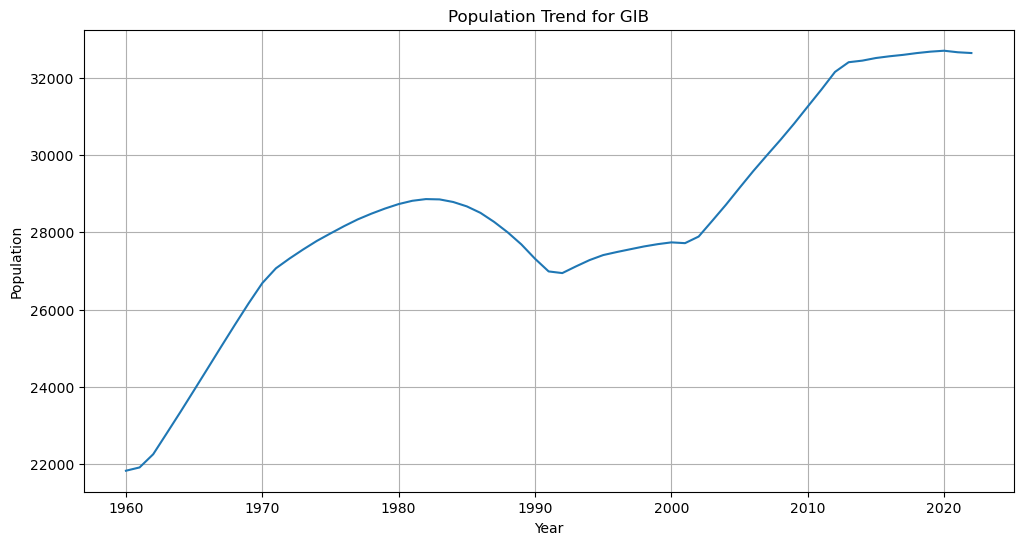

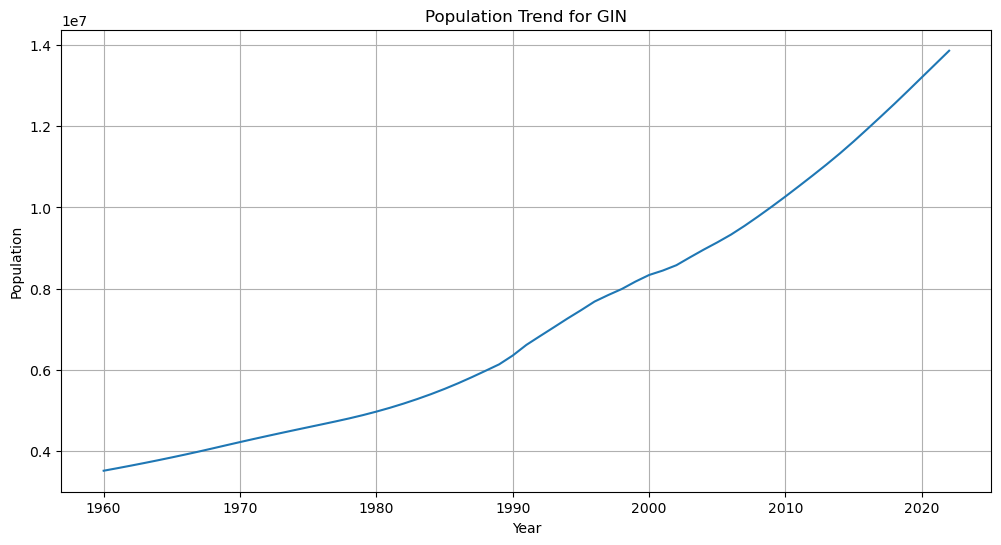

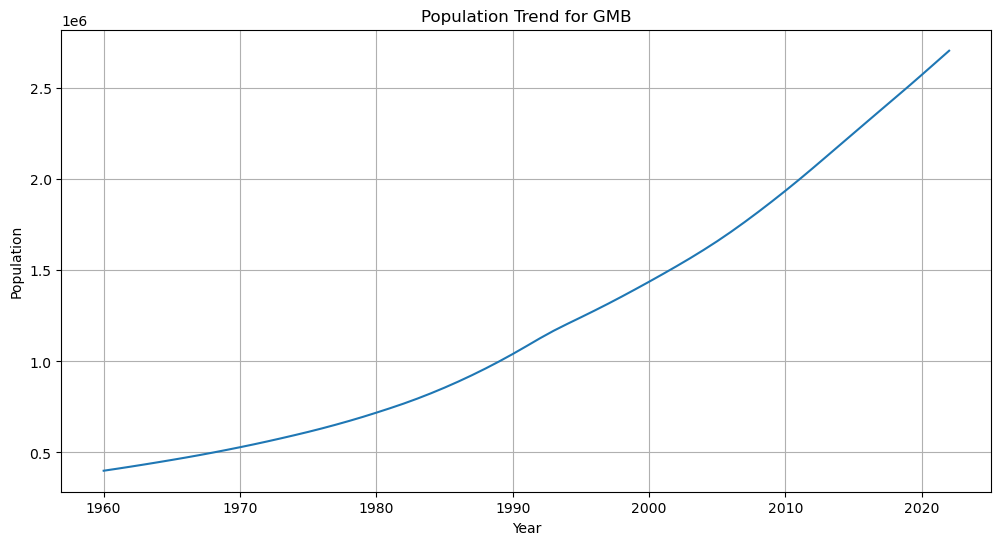

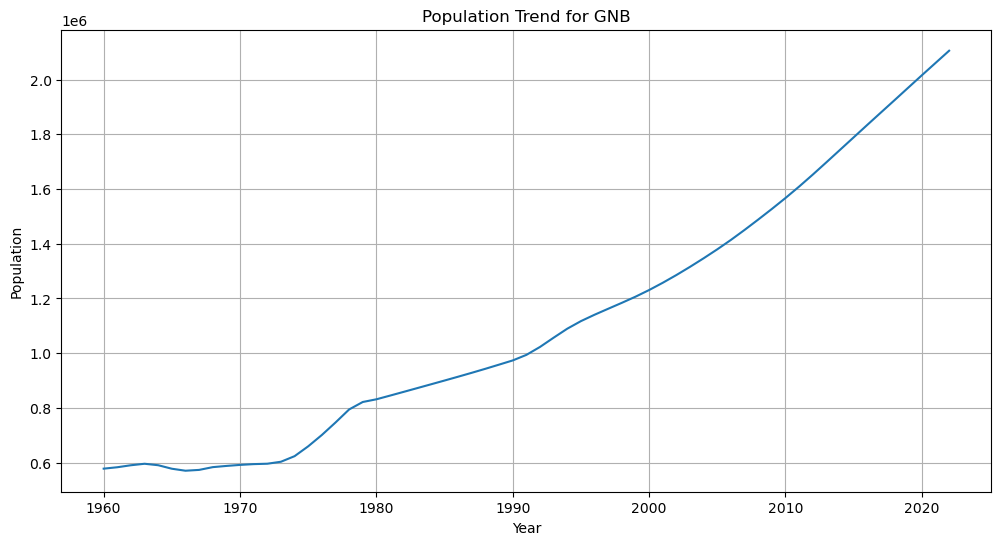

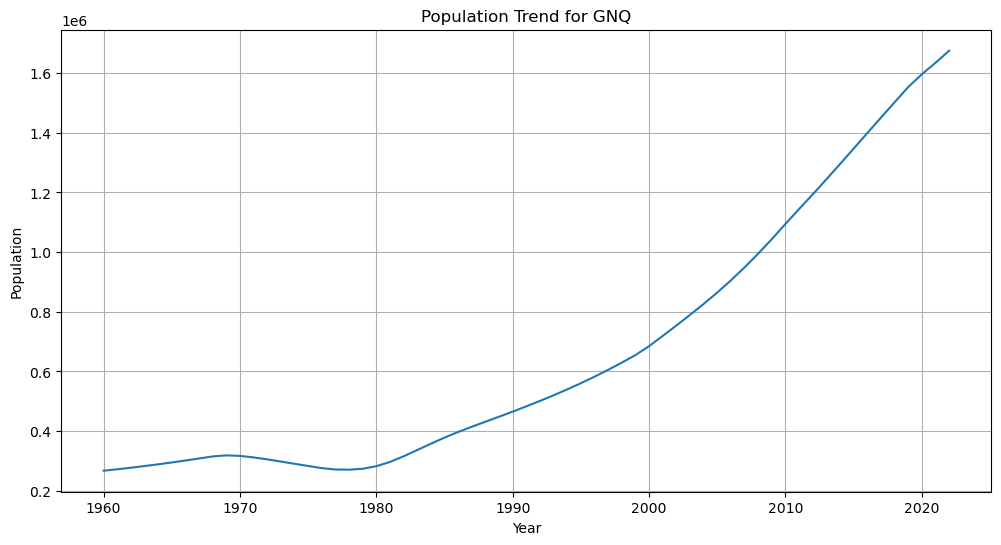

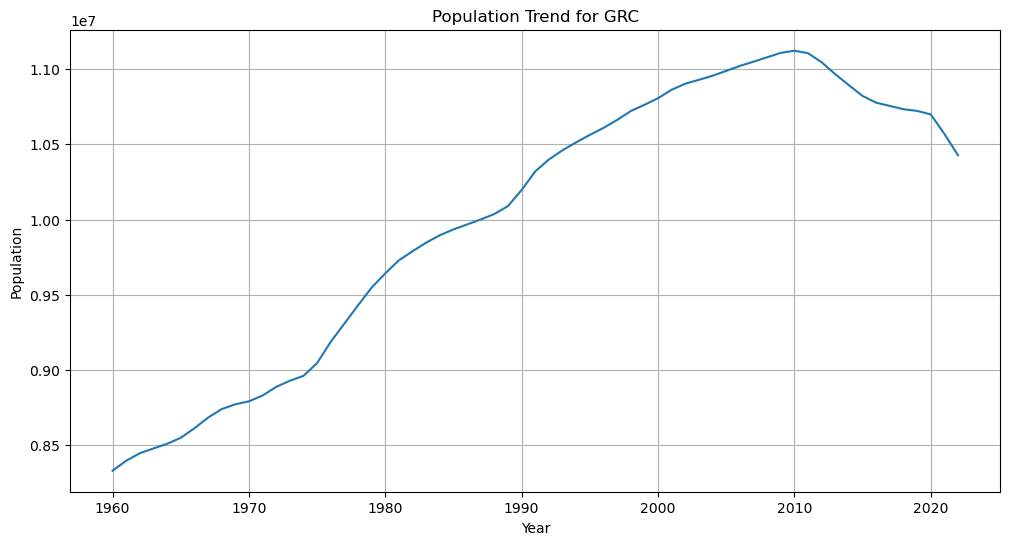

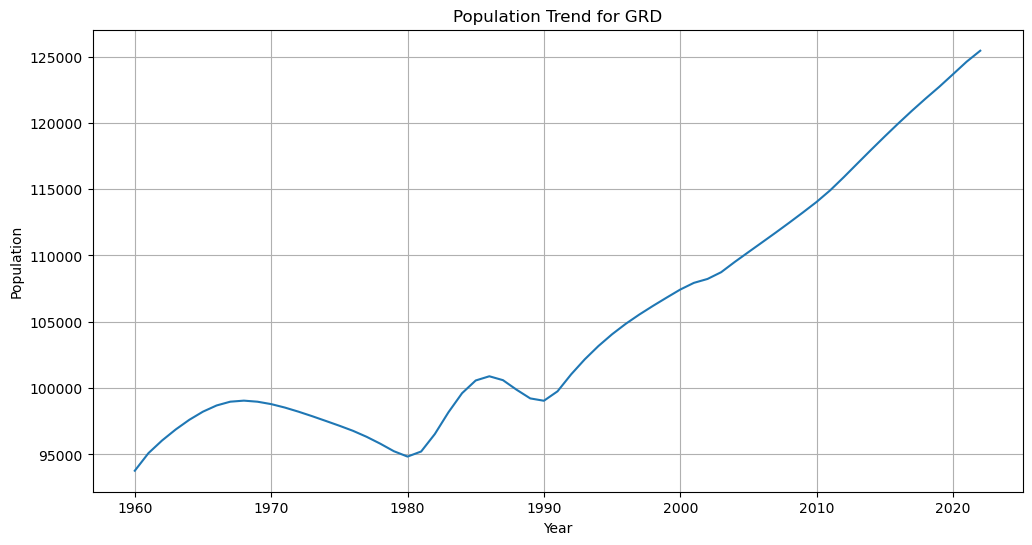

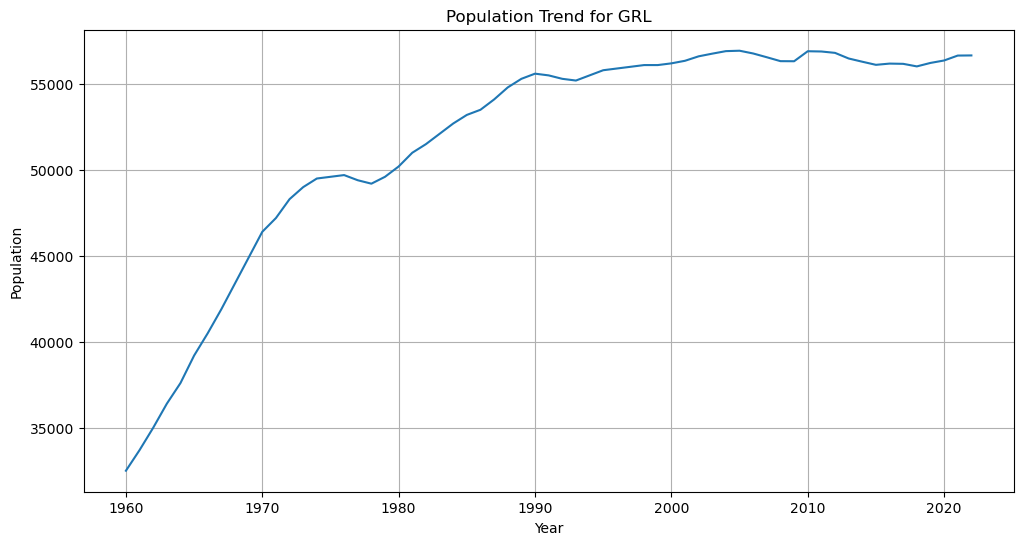

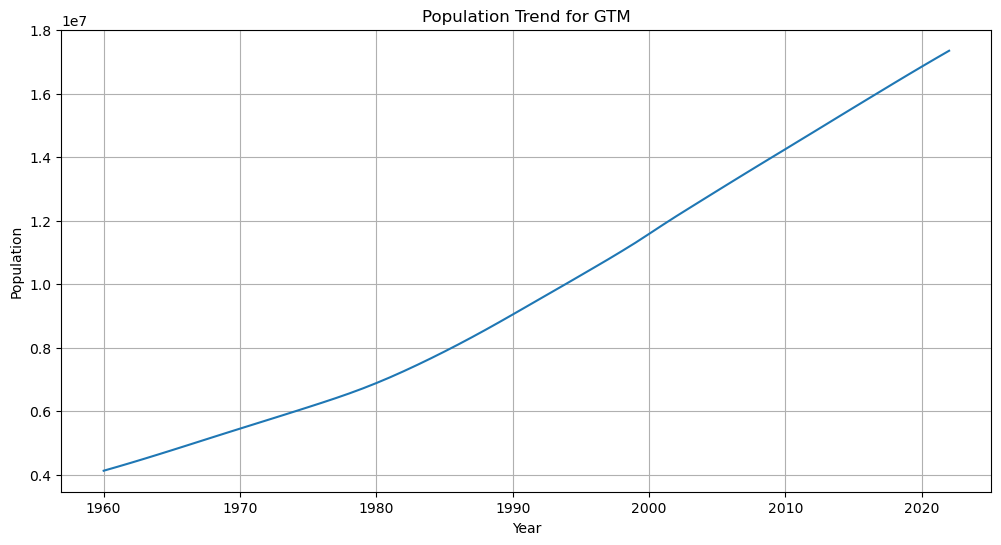

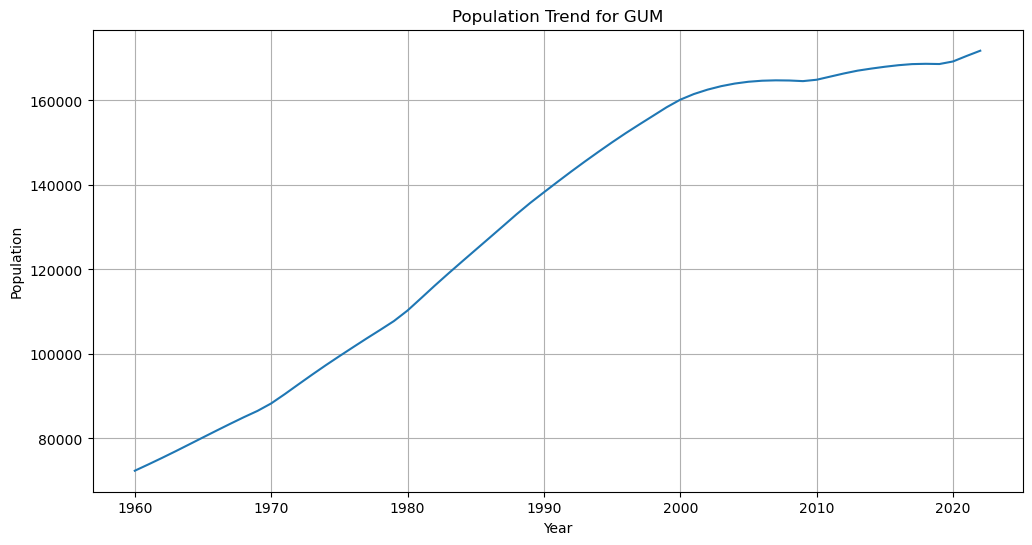

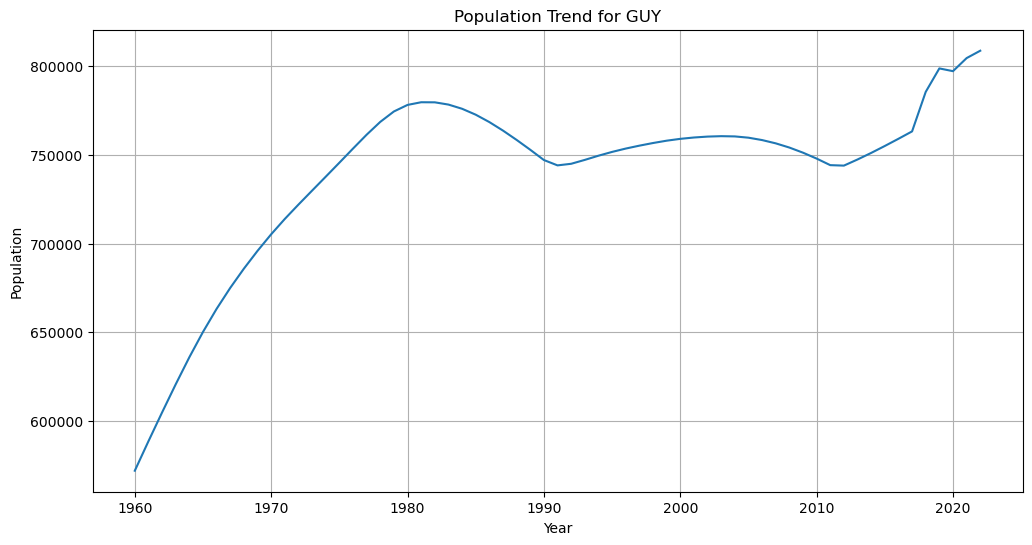

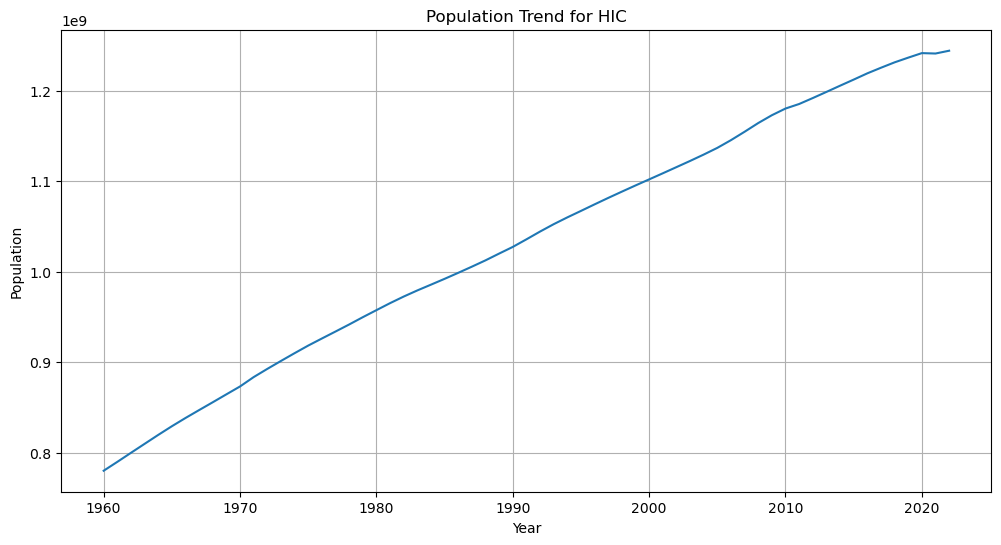

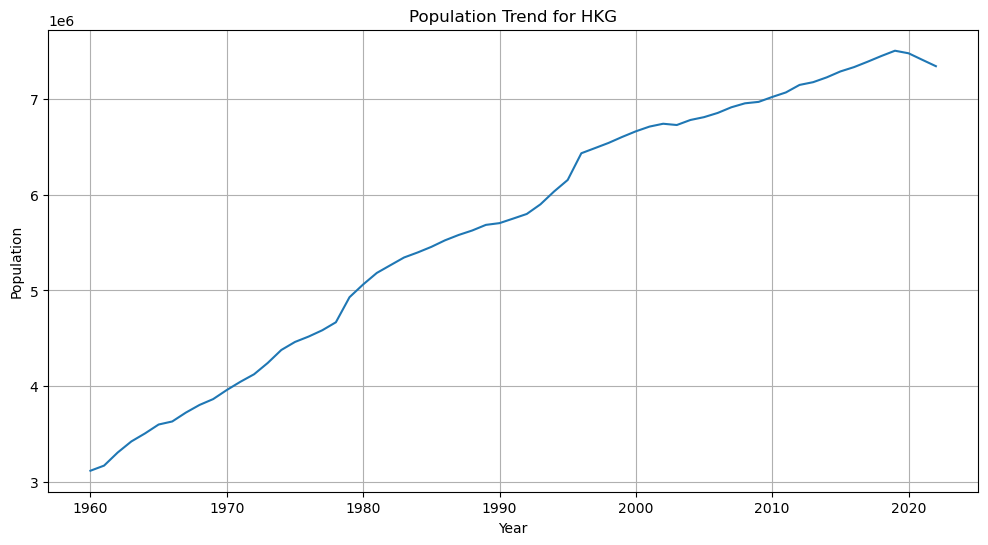

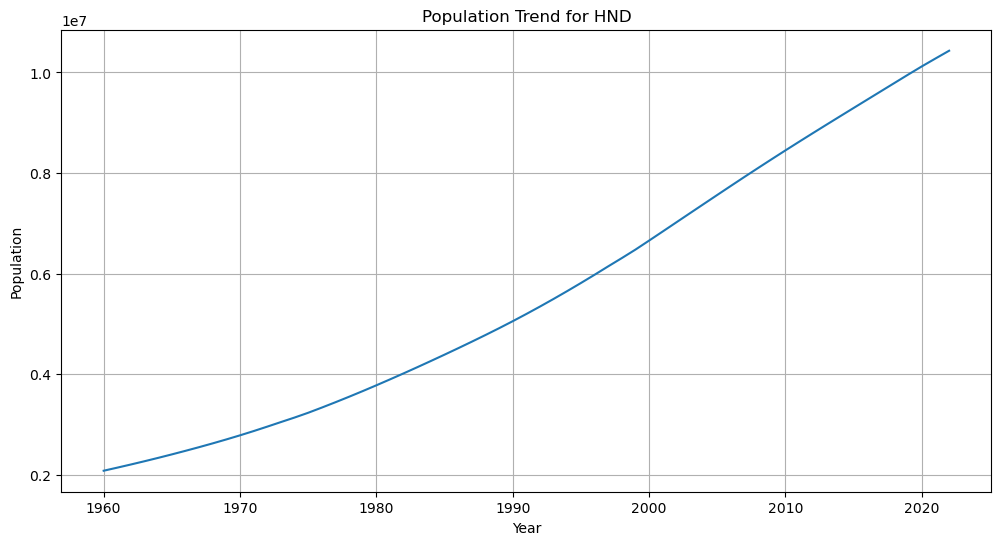

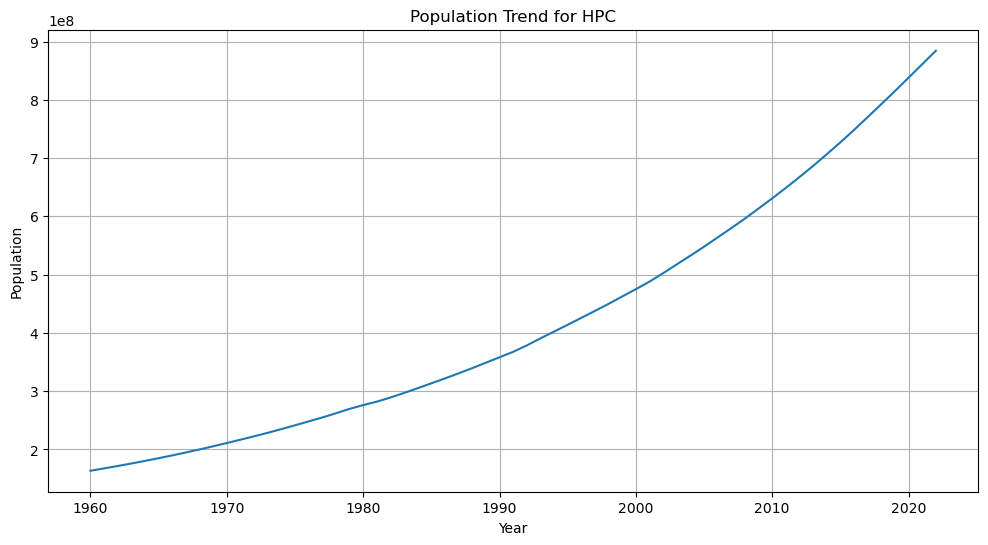

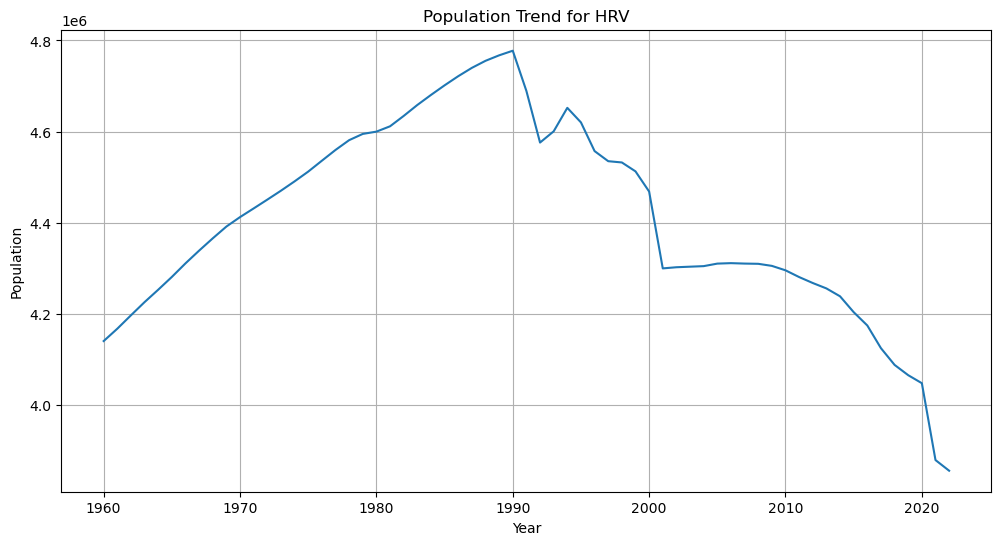

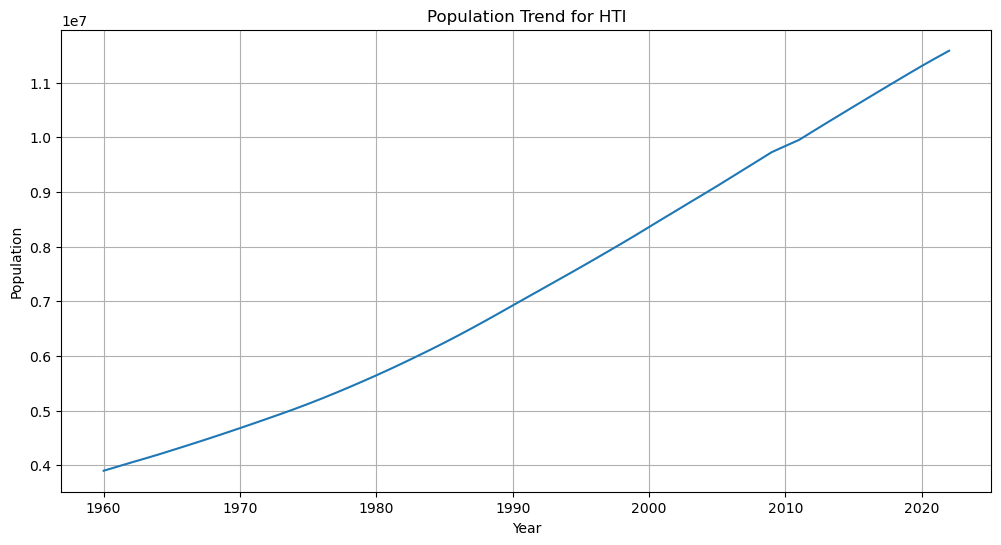

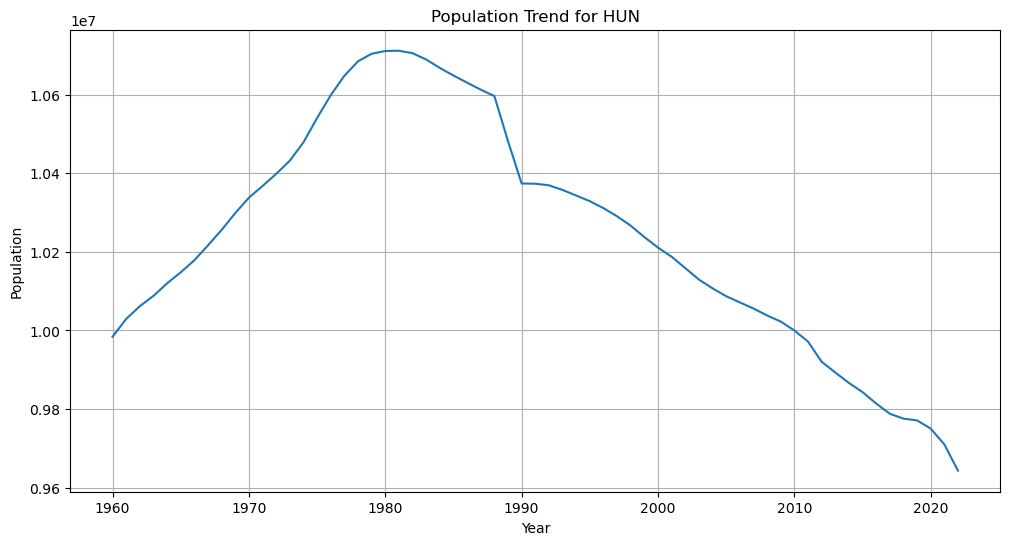

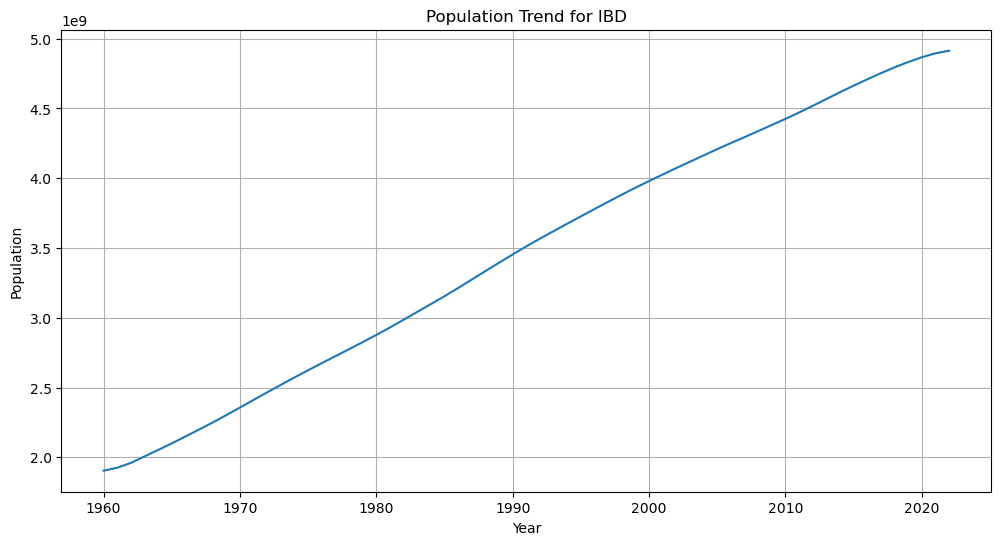

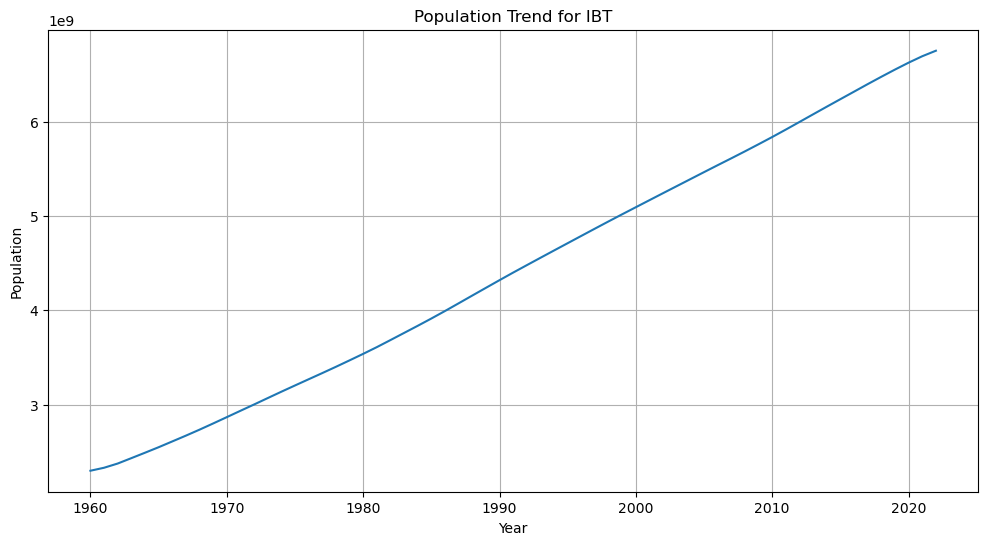

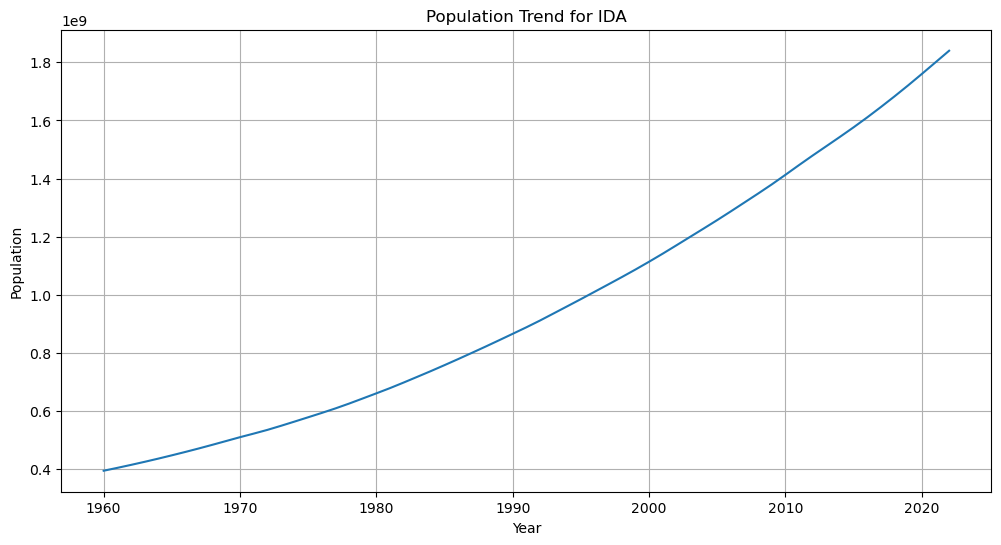

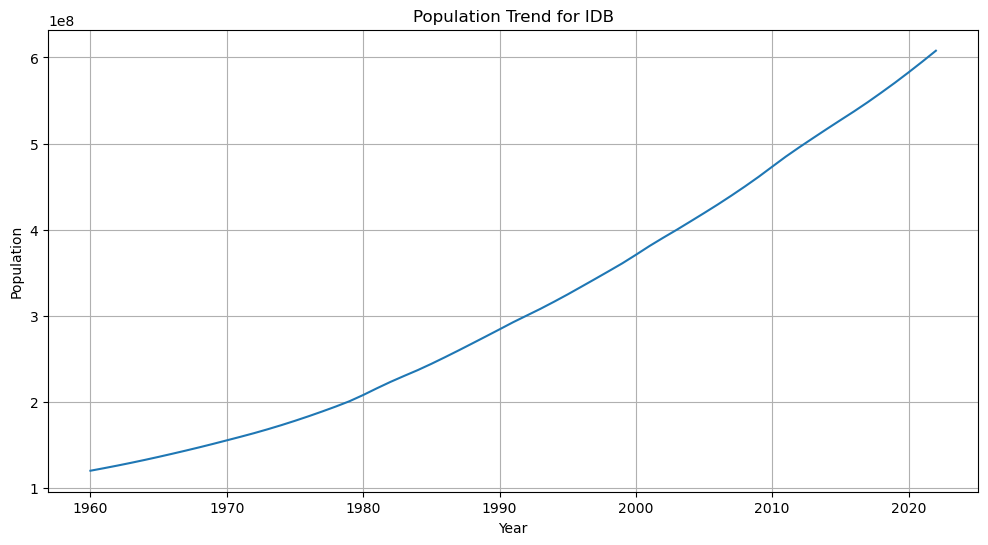

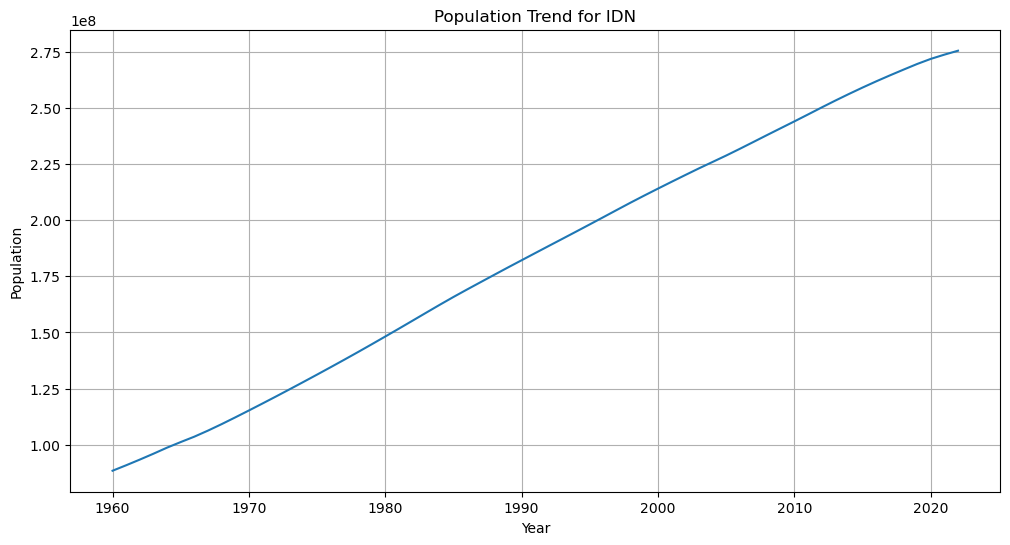

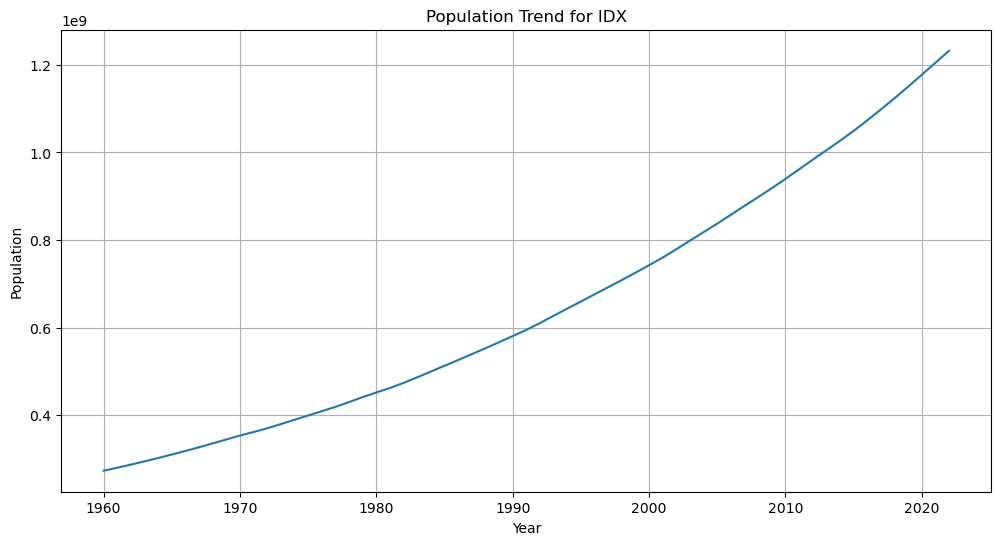

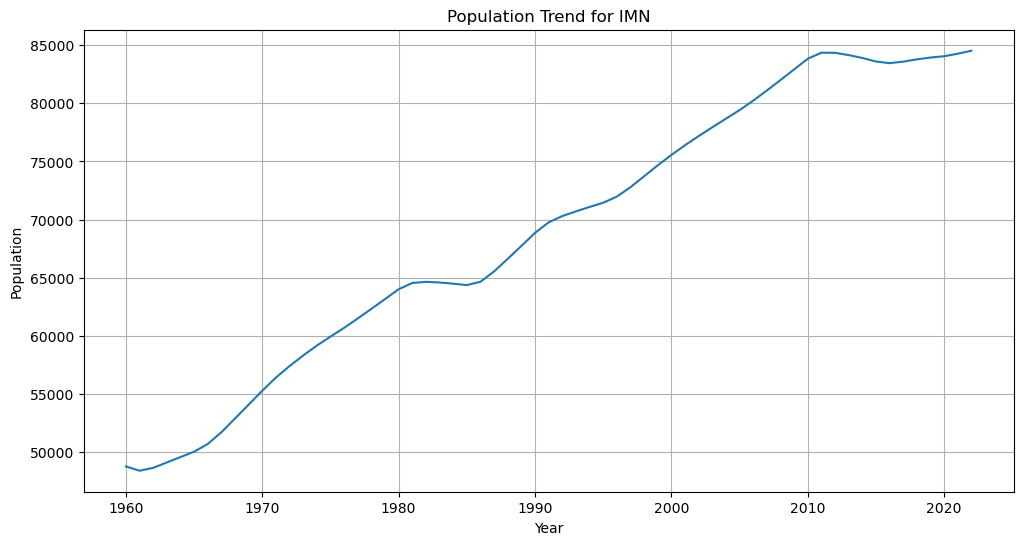

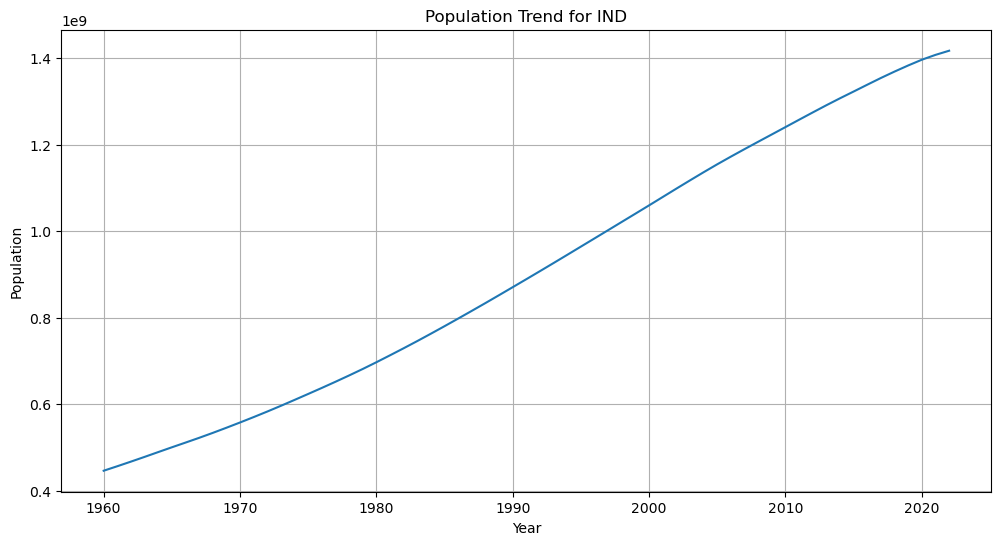

KeyError: 'y'

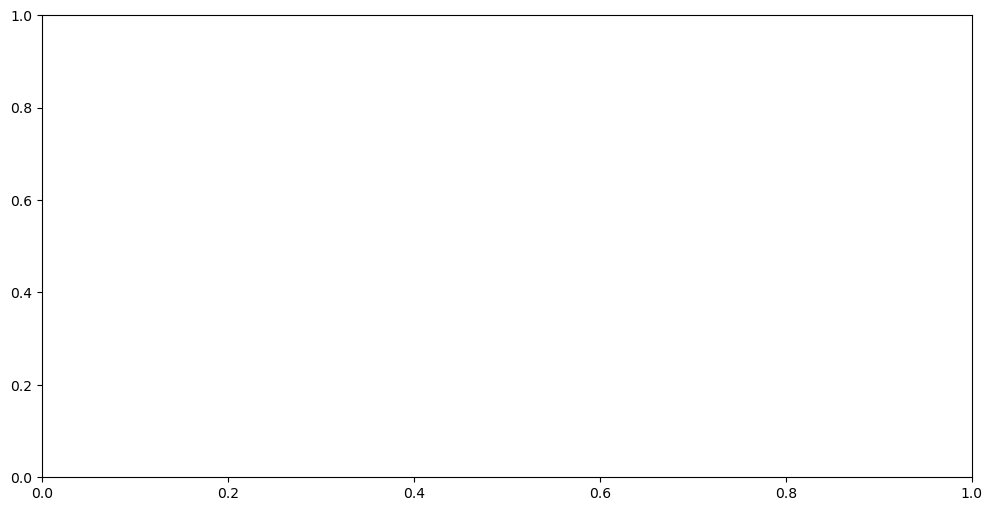

In [23]:
for country_code in list(melted_df['Country Code'].unique()):
    plot_population(country_code)

In [42]:
def plot_top_ten_and_bottom_ten(year):
    year_2000_df = df1[['Country Name', 'Country Code', year]]
    bottom_10_df = year_2000_df.sort_values(by=year, ascending=True).head(10)
    top_10_df = year_2000_df.sort_values(by=year, ascending=False).head(10)
    colors = plt.cm.viridis(np.linspace(0, 1, len(top_ten_df)))
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    axs[0].barh(bottom_10_df['Country Name'], bottom_10_df[year], color=colors)
    axs[0].set_xlabel('Population')
    axs[0].set_title(f'Bottom Ten Countries by Population in {year}')
    axs[0].invert_yaxis()
    axs[1].barh(top_10_df['Country Name'], top_10_df[year], color=colors)
    axs[1].set_xlabel('Population')
    axs[1].set_title(f'Top Ten Countries by Population in {year}')
    axs[1].invert_yaxis()

    plt.tight_layout()
    plt.show()

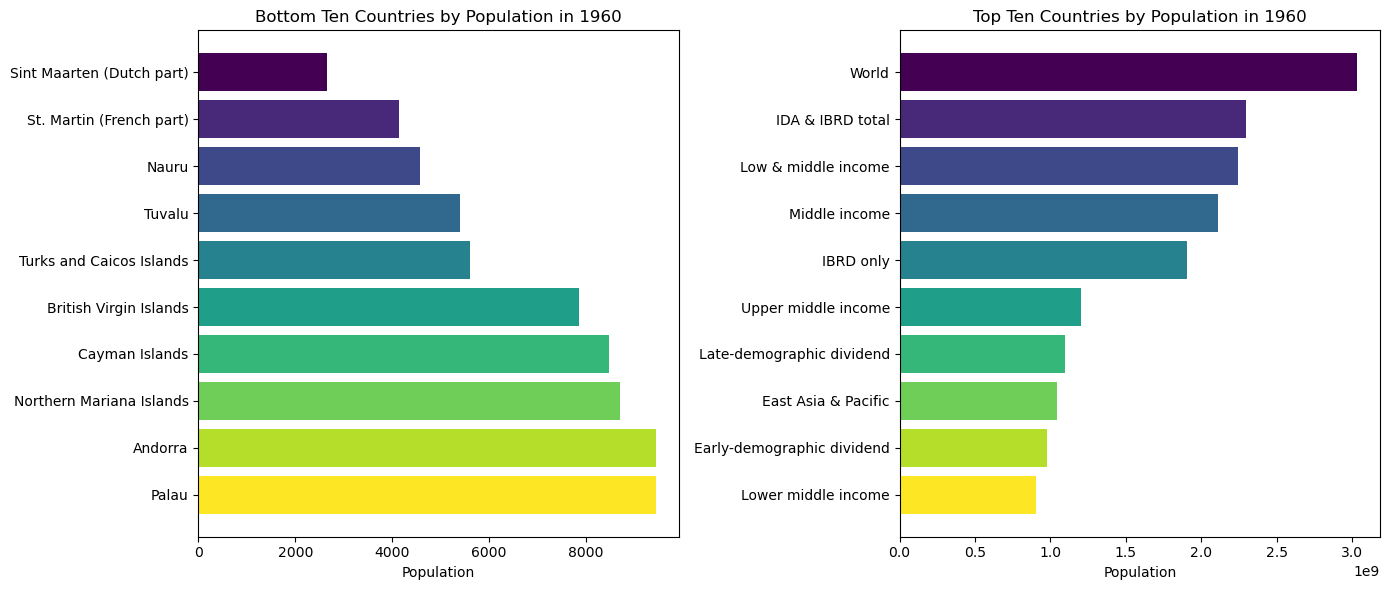

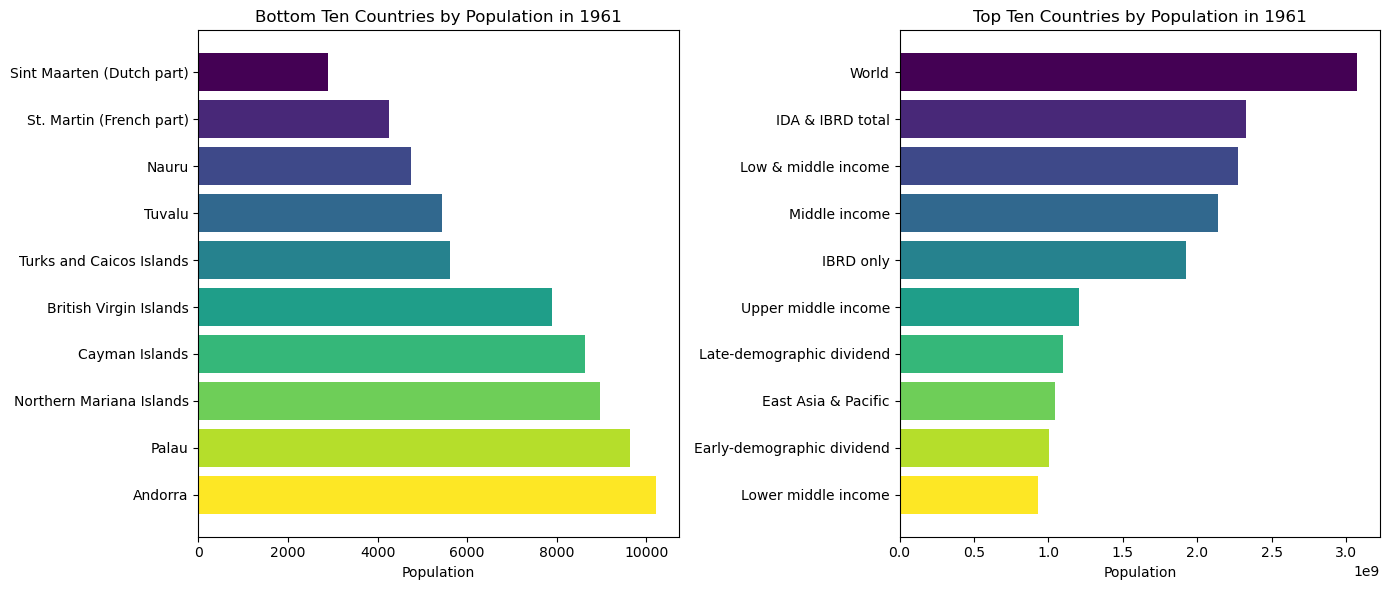

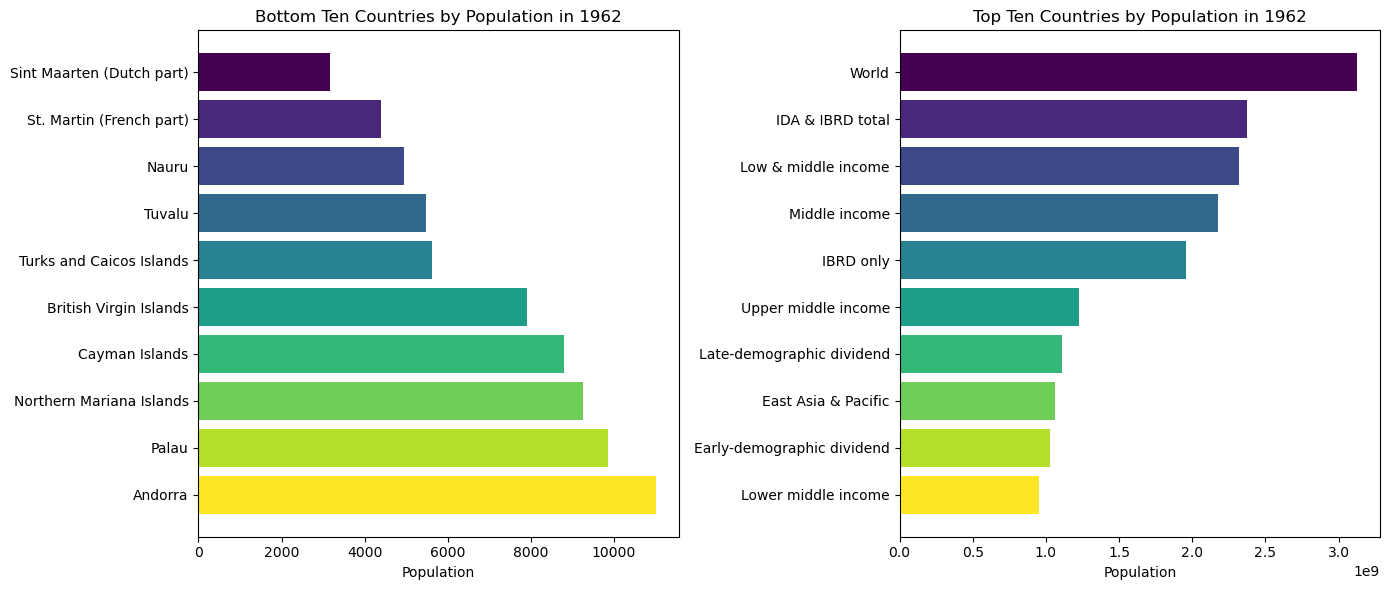

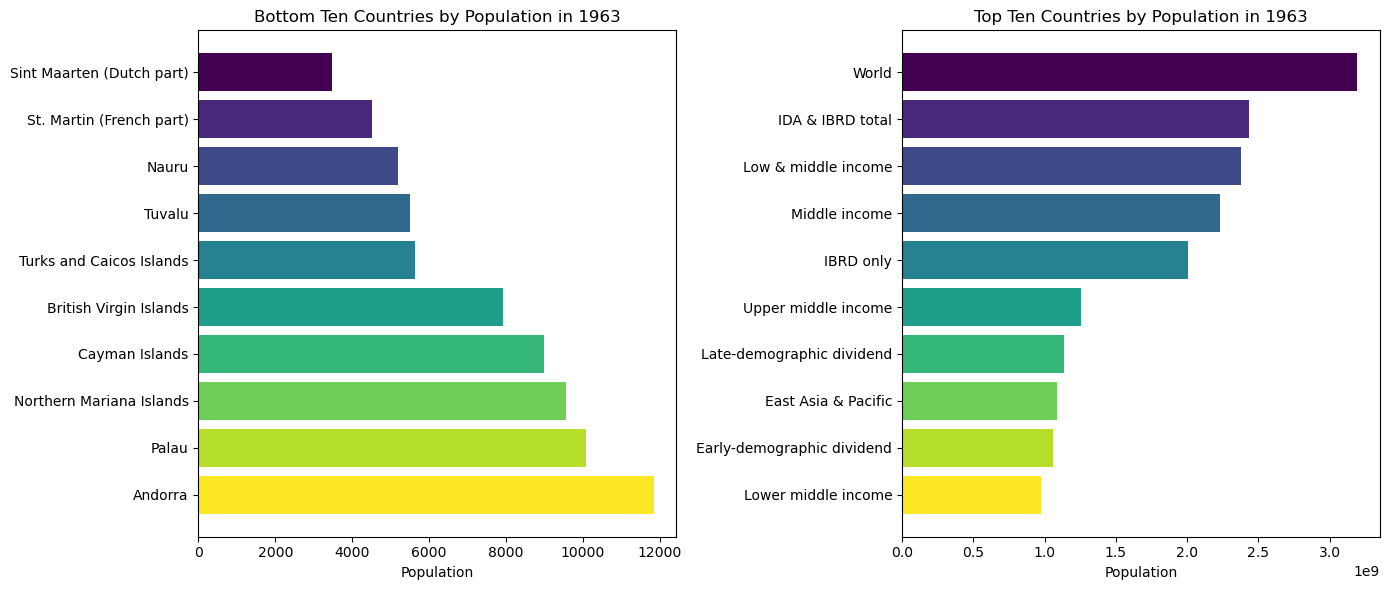

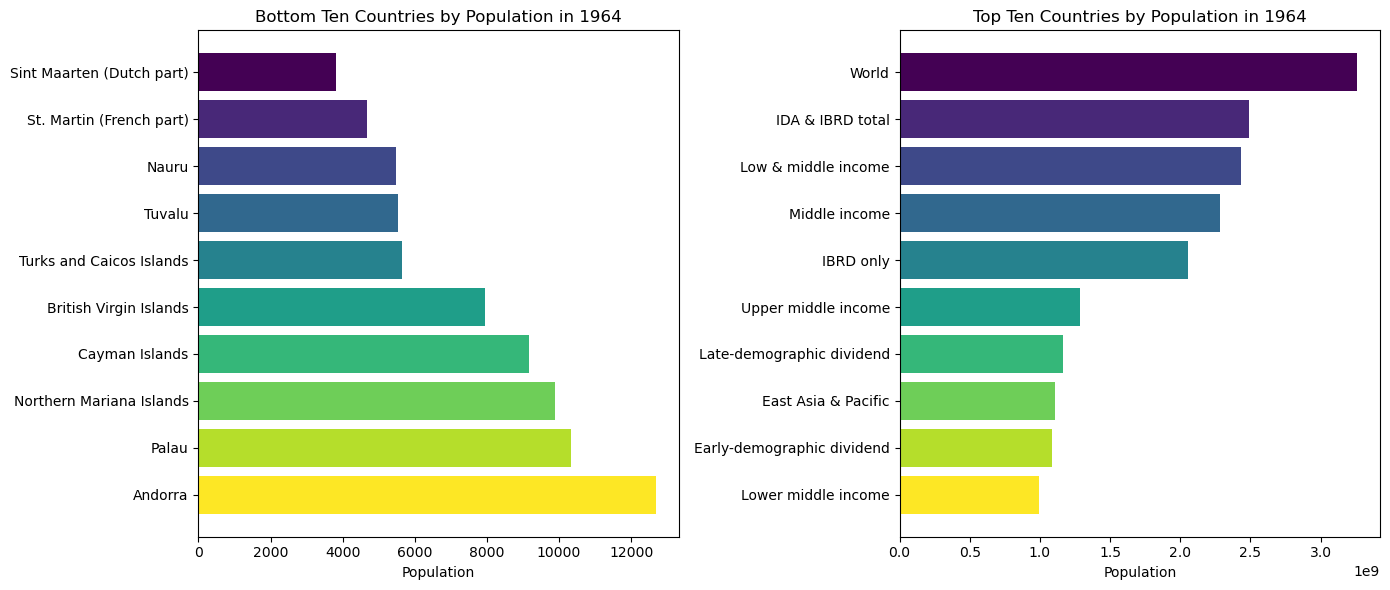

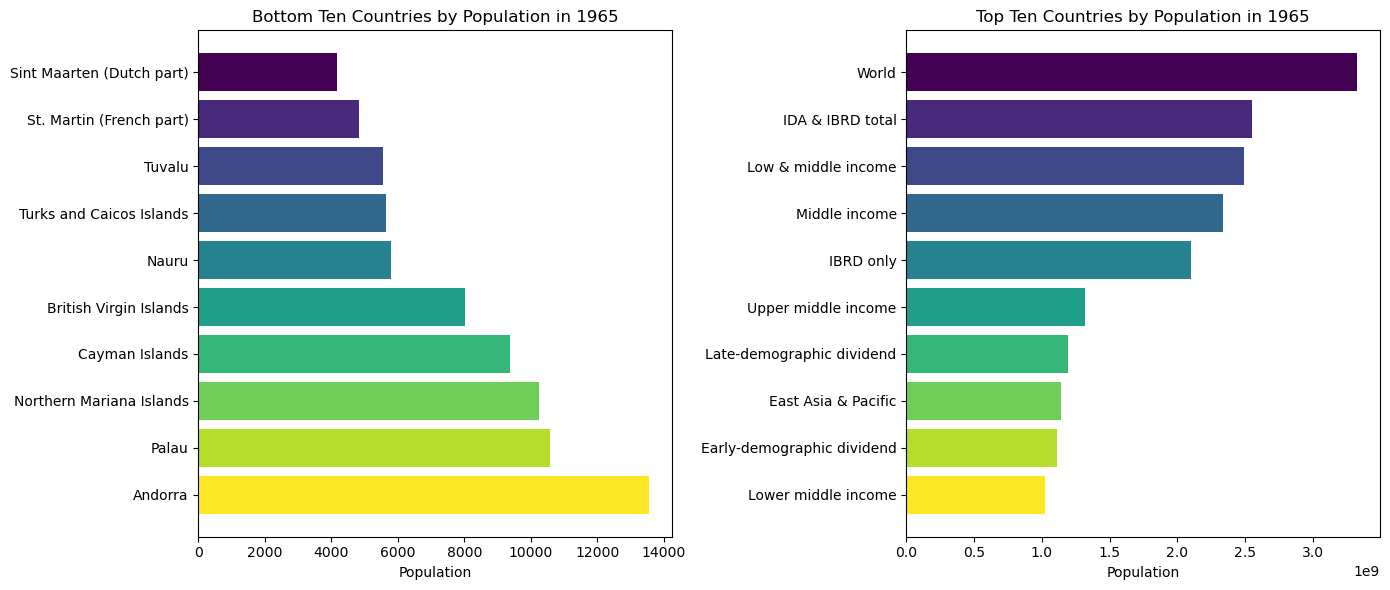

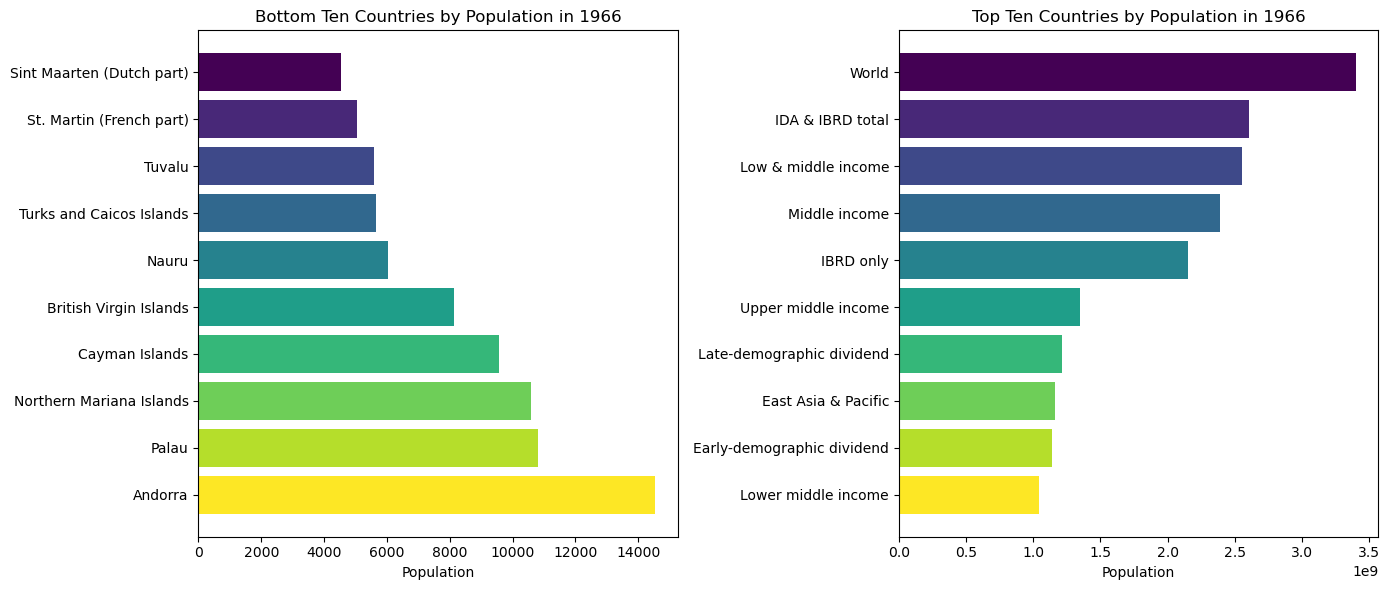

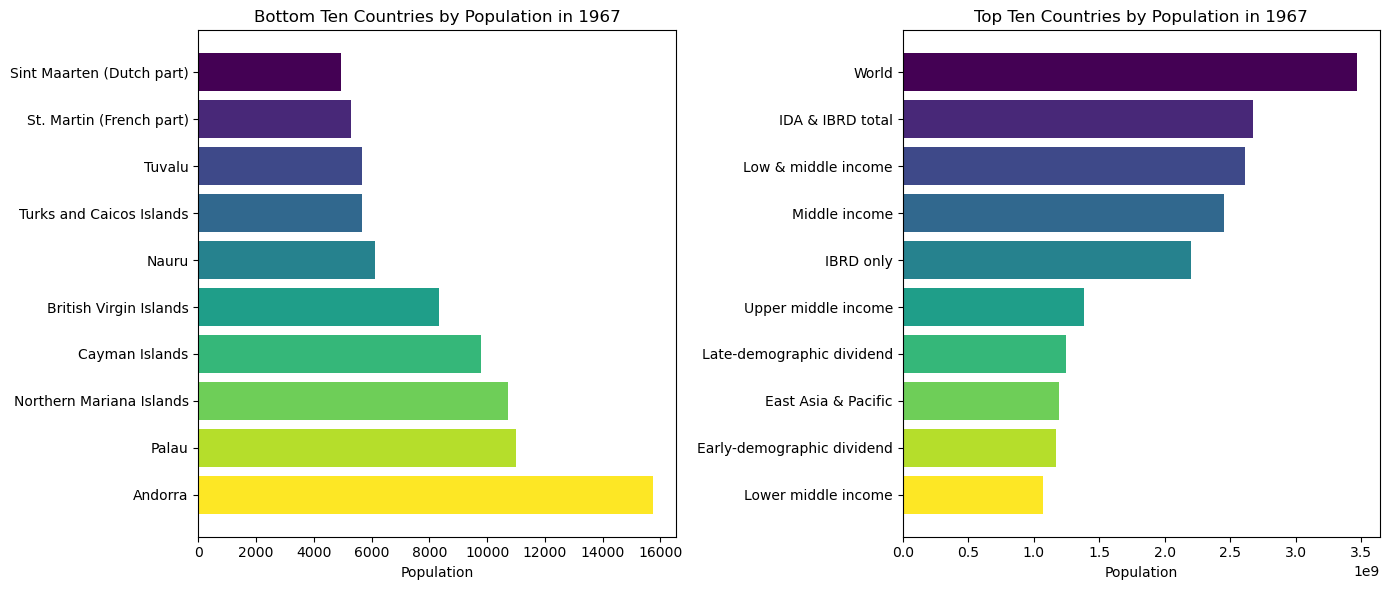

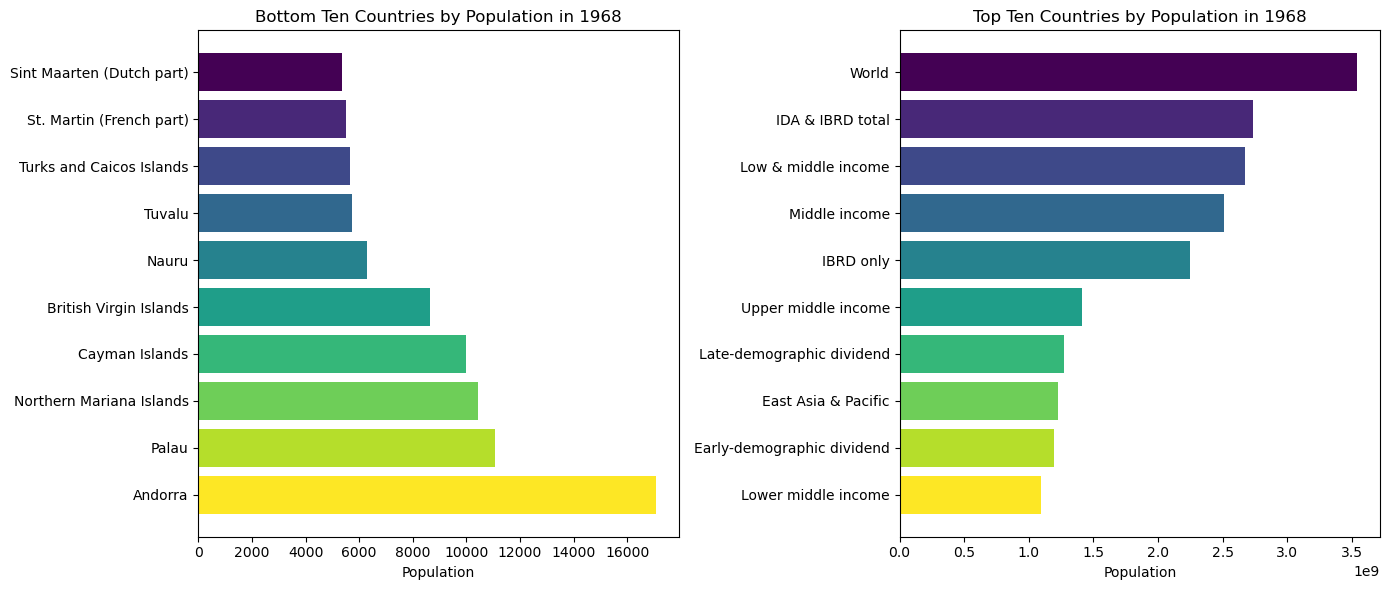

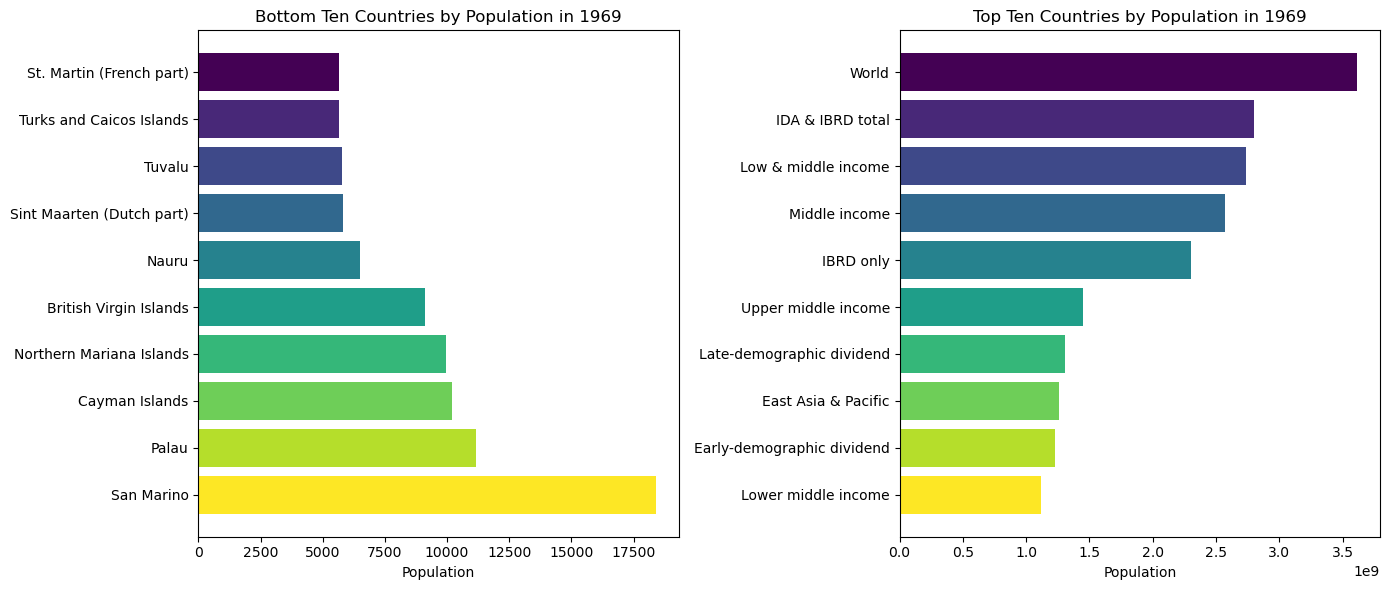

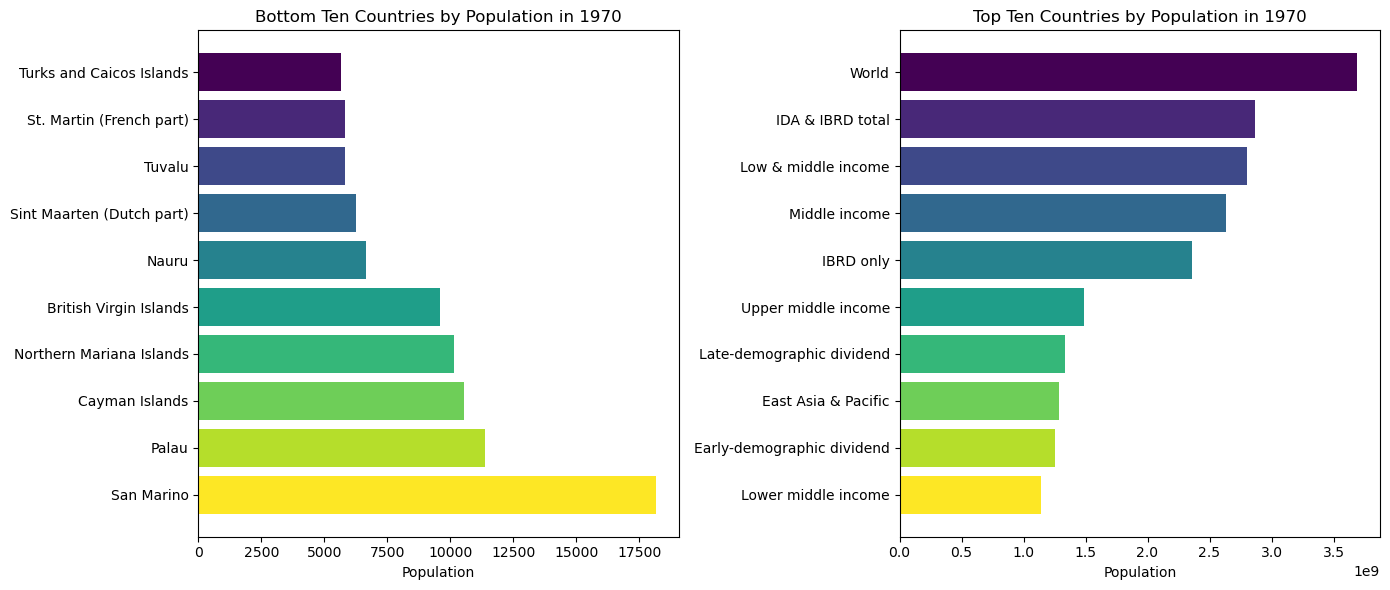

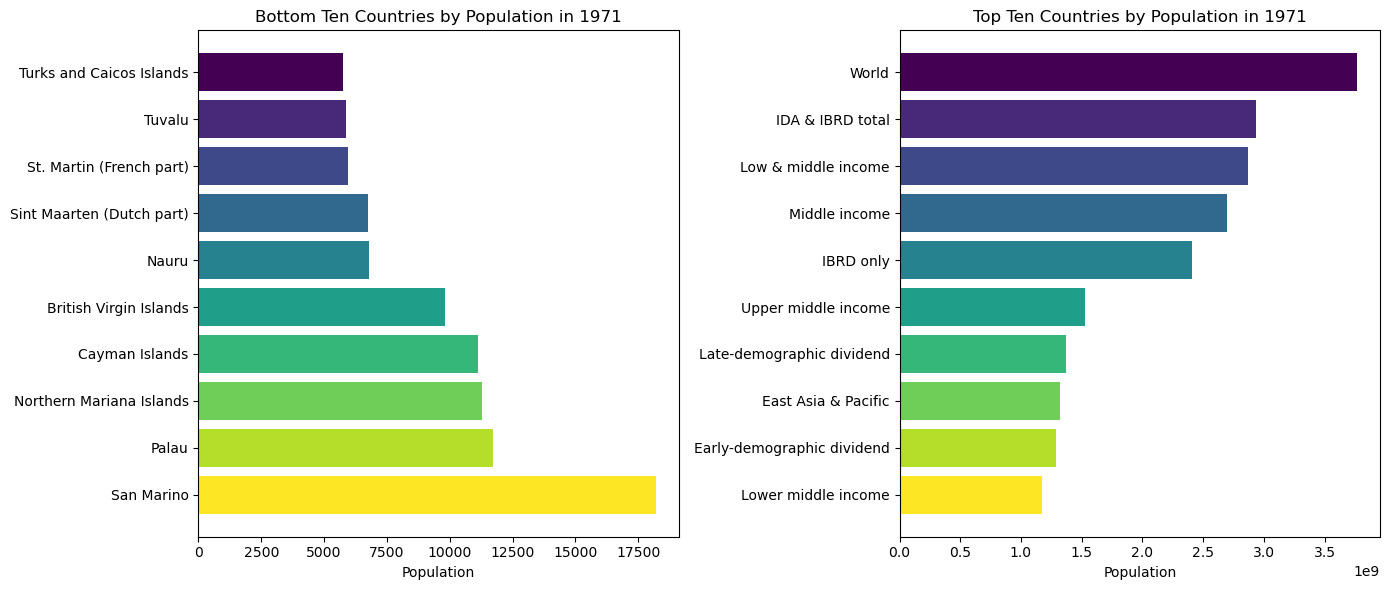

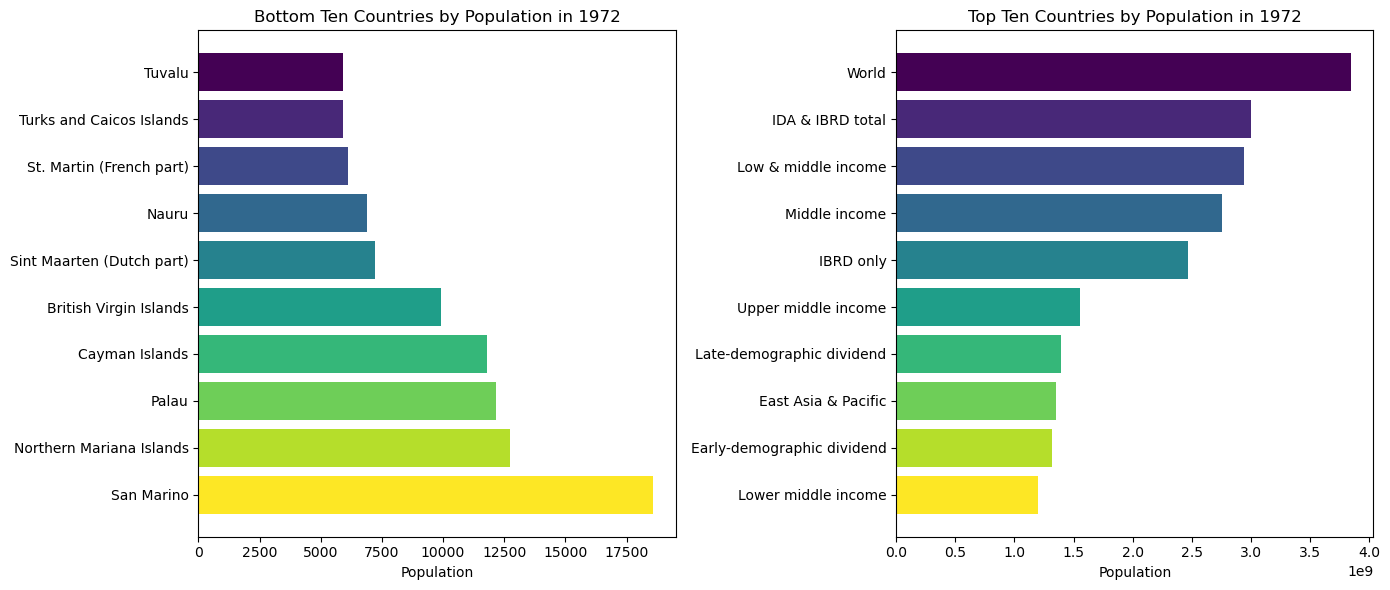

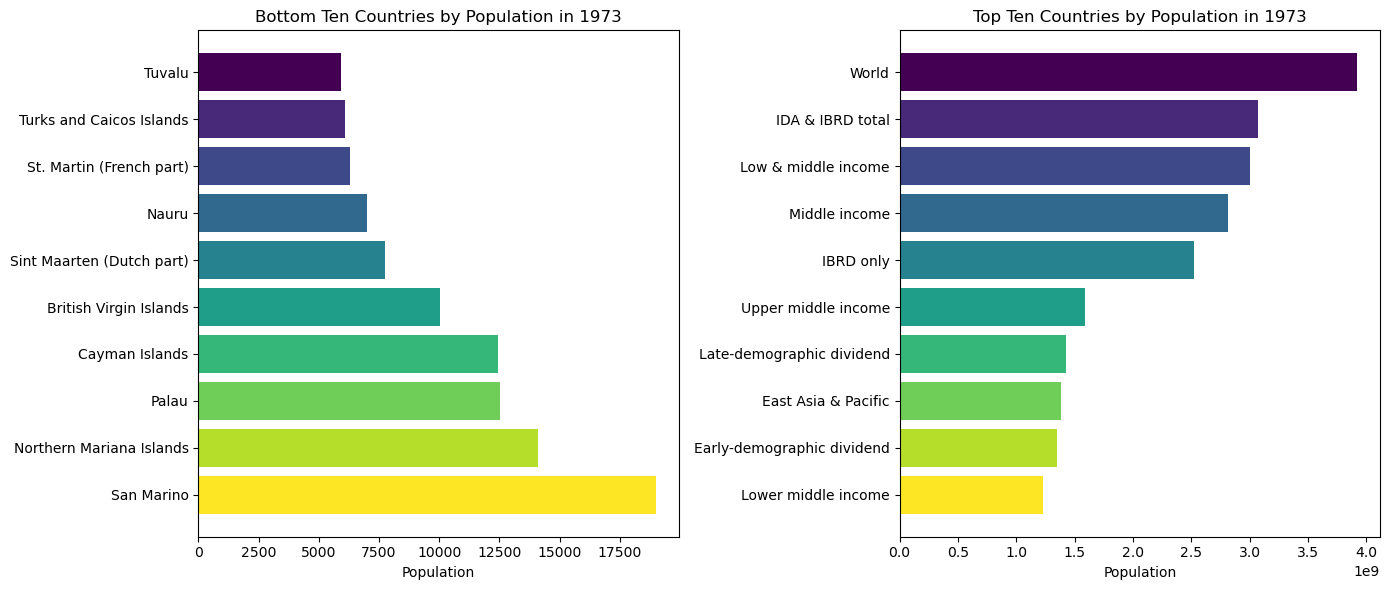

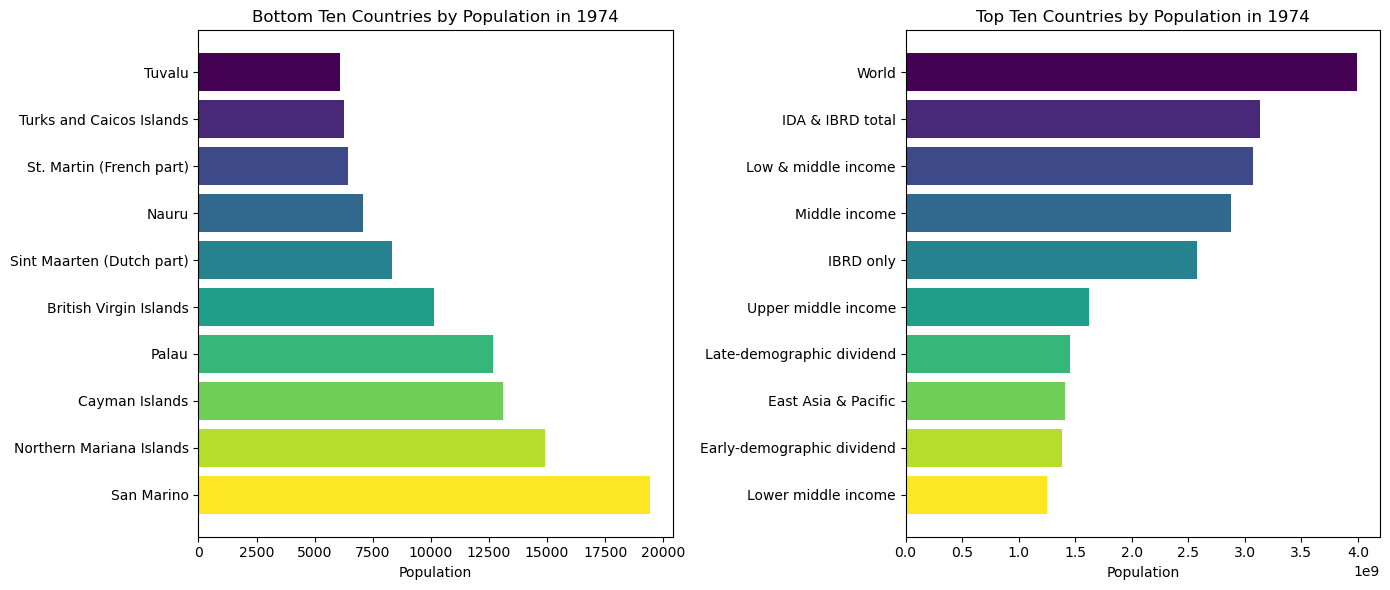

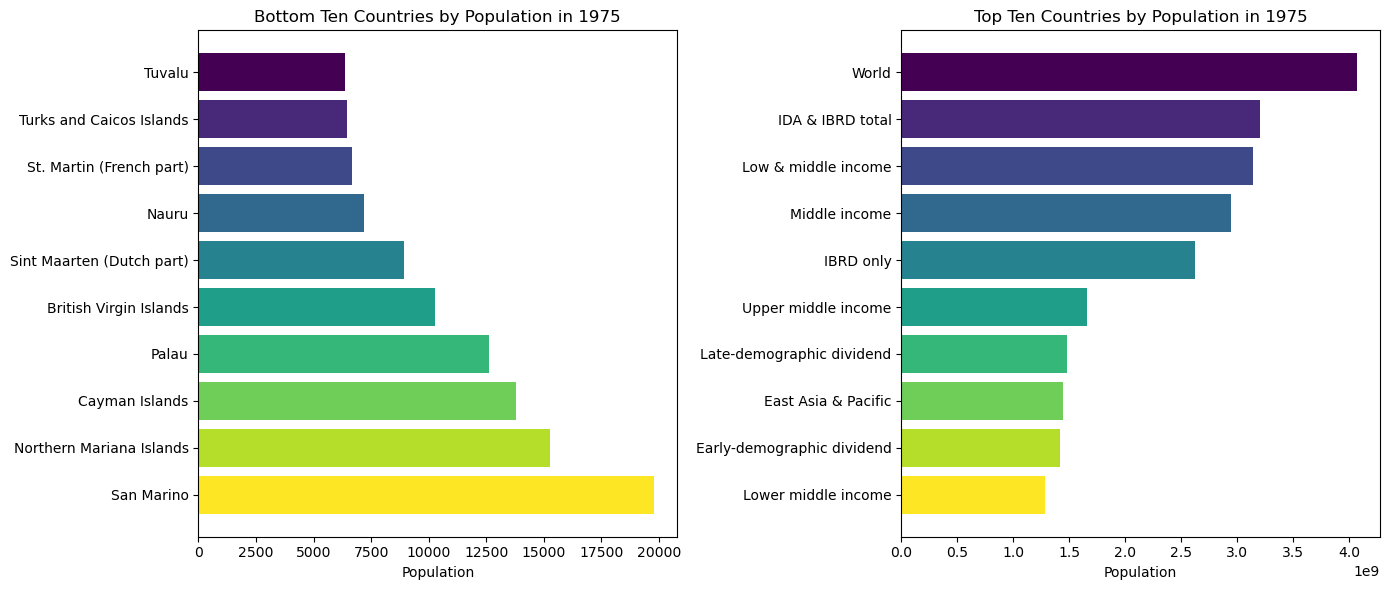

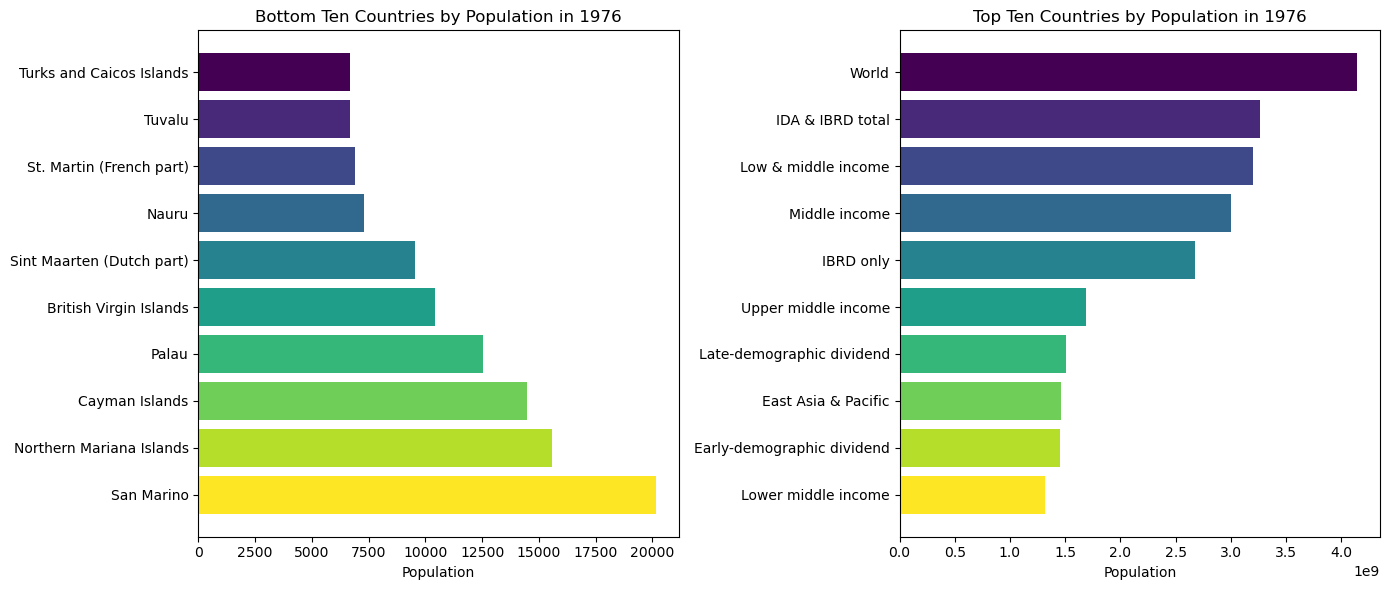

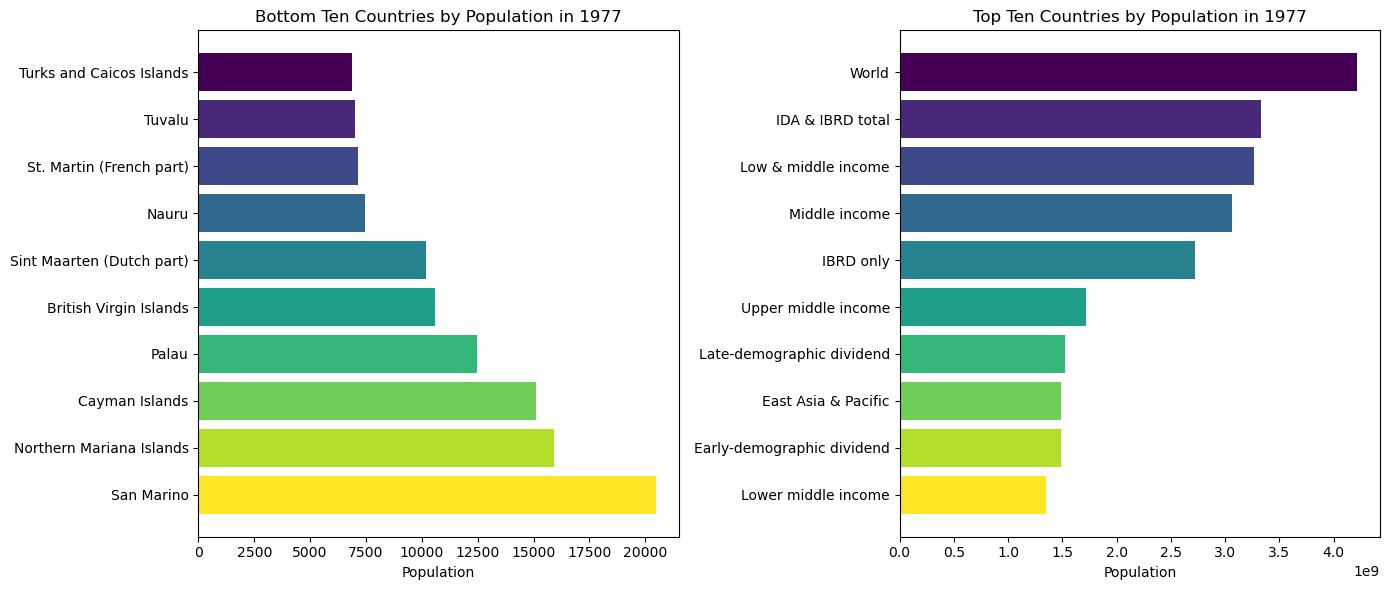

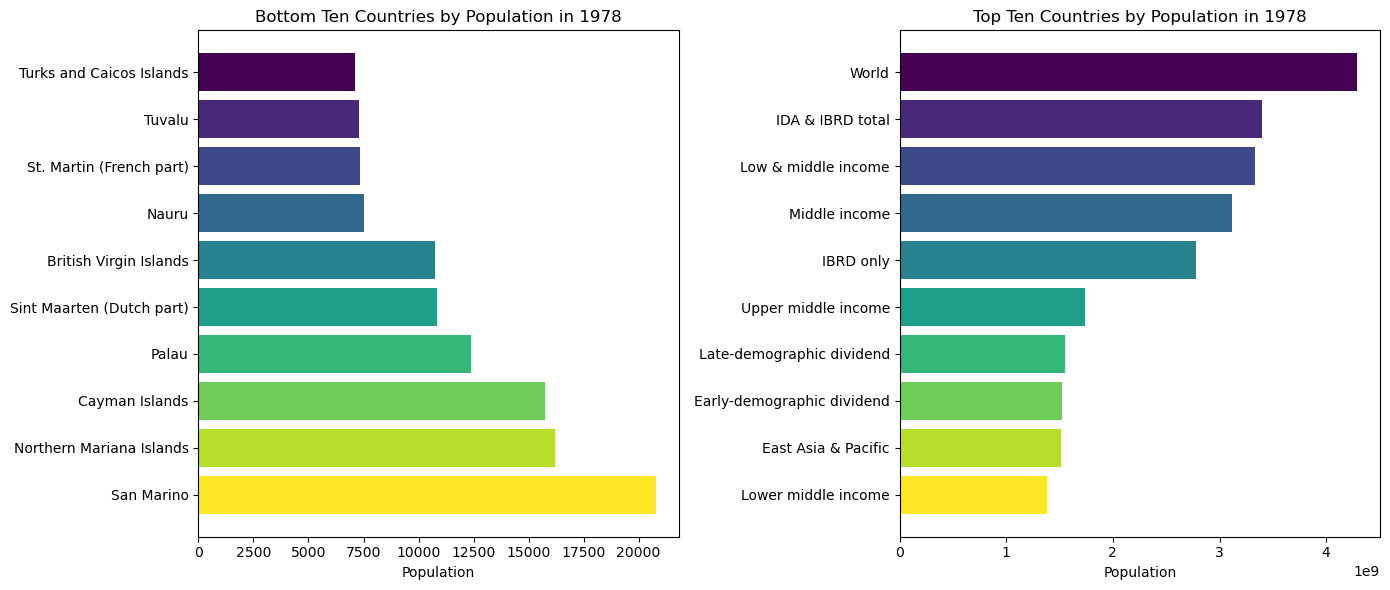

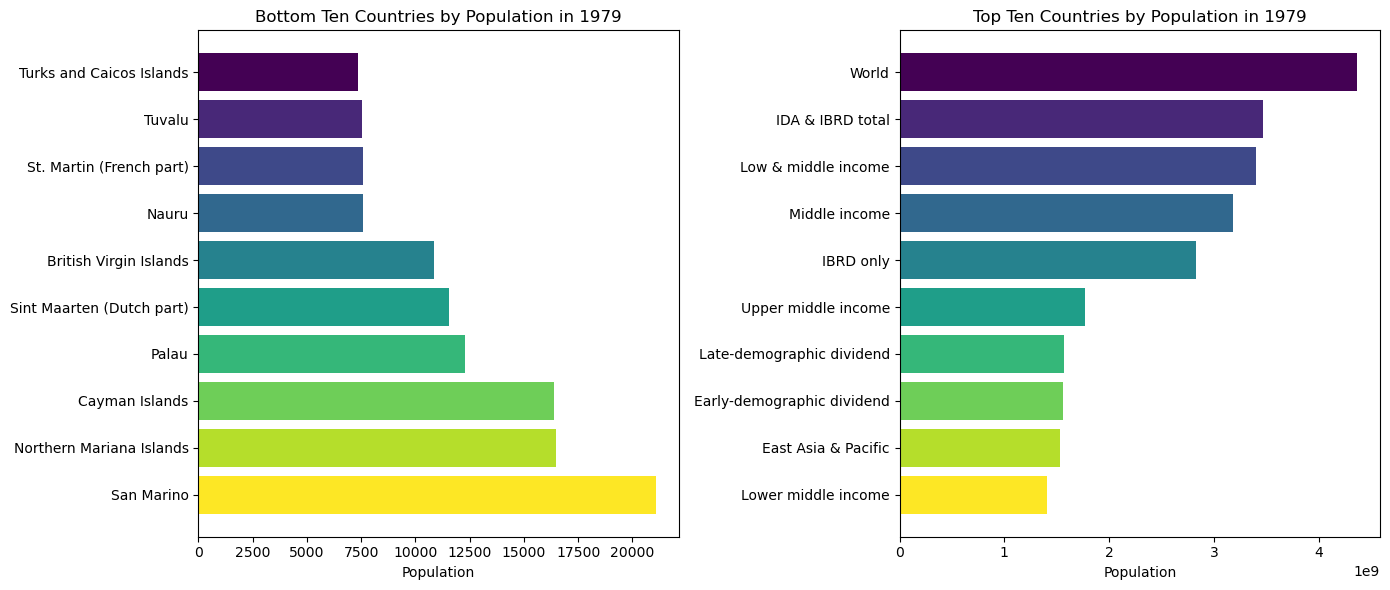

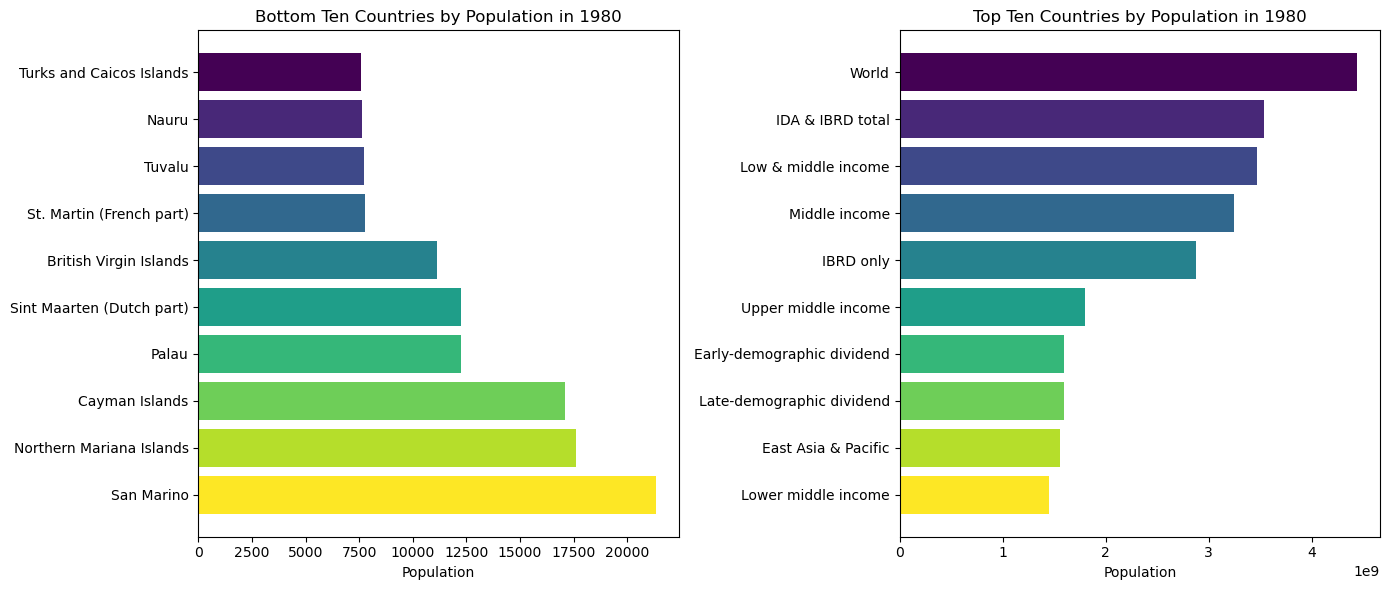

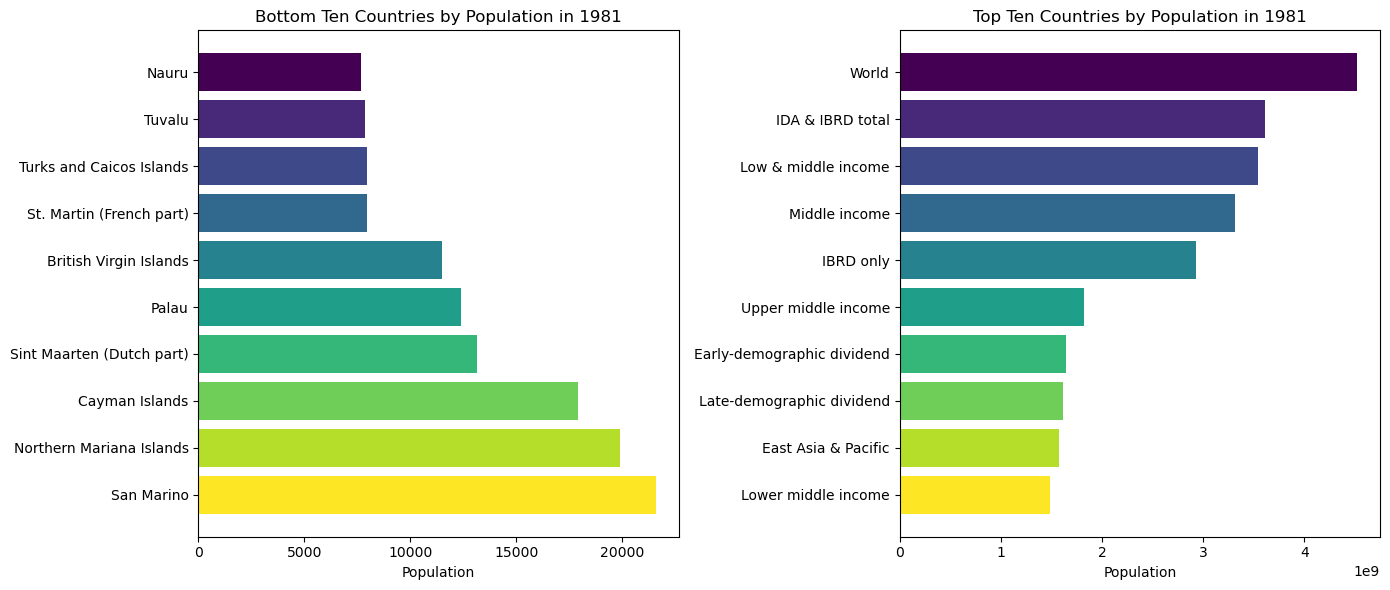

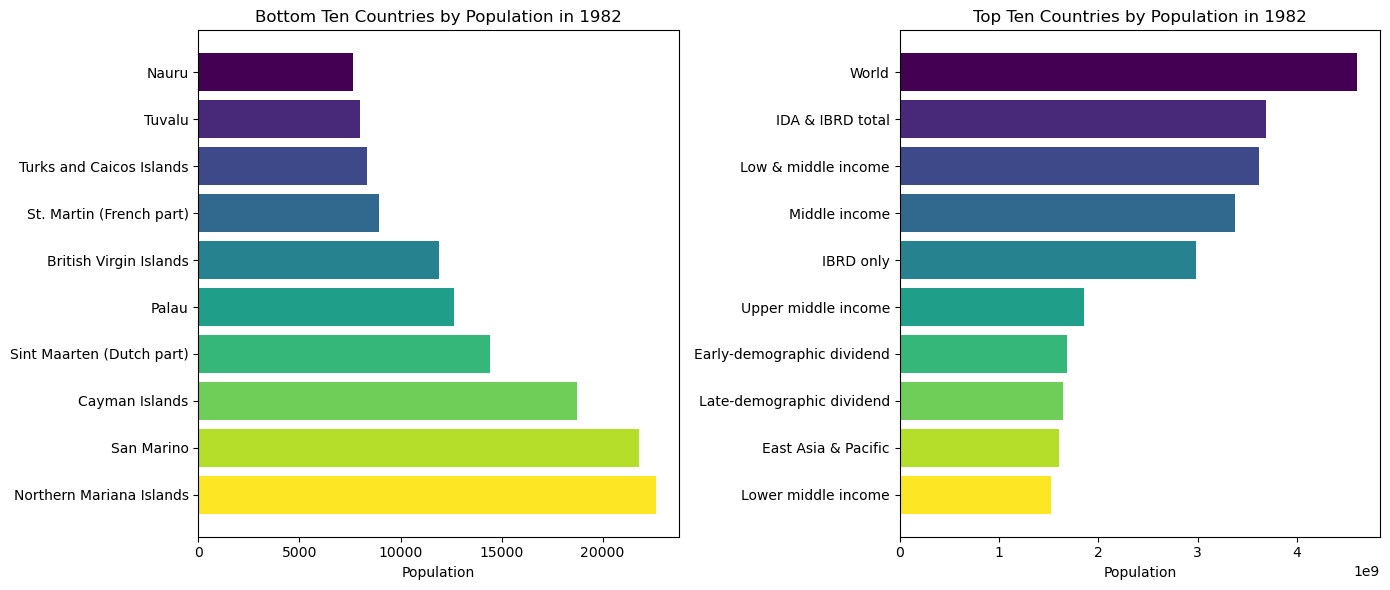

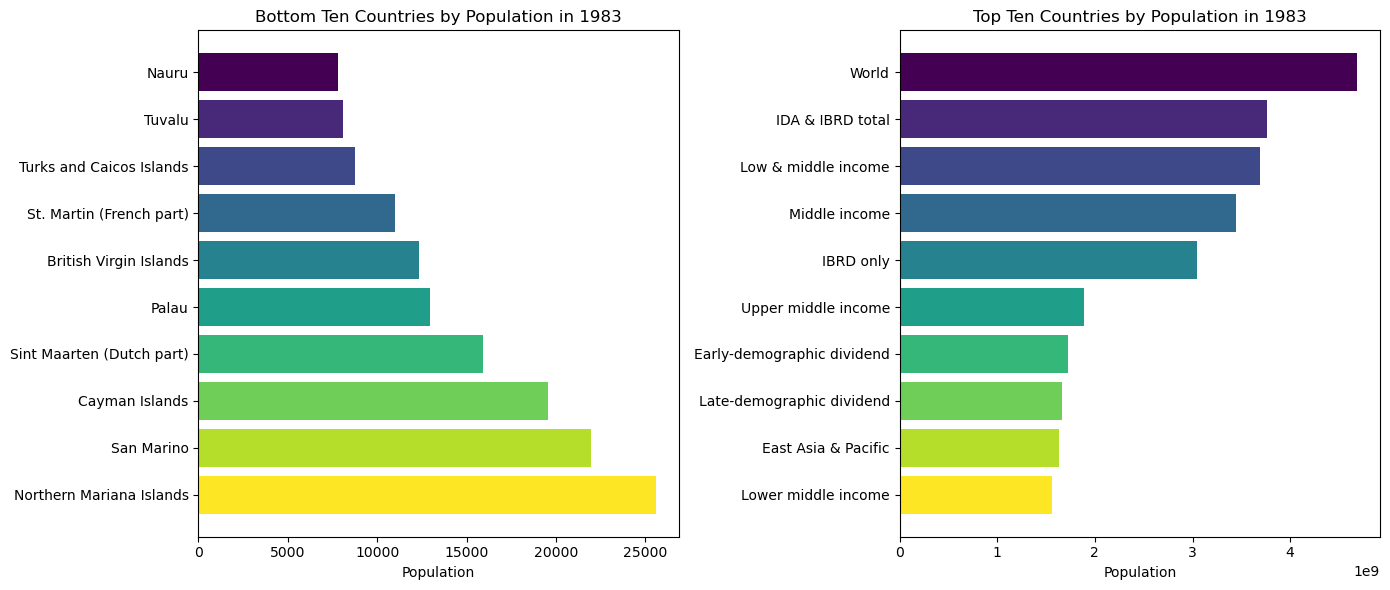

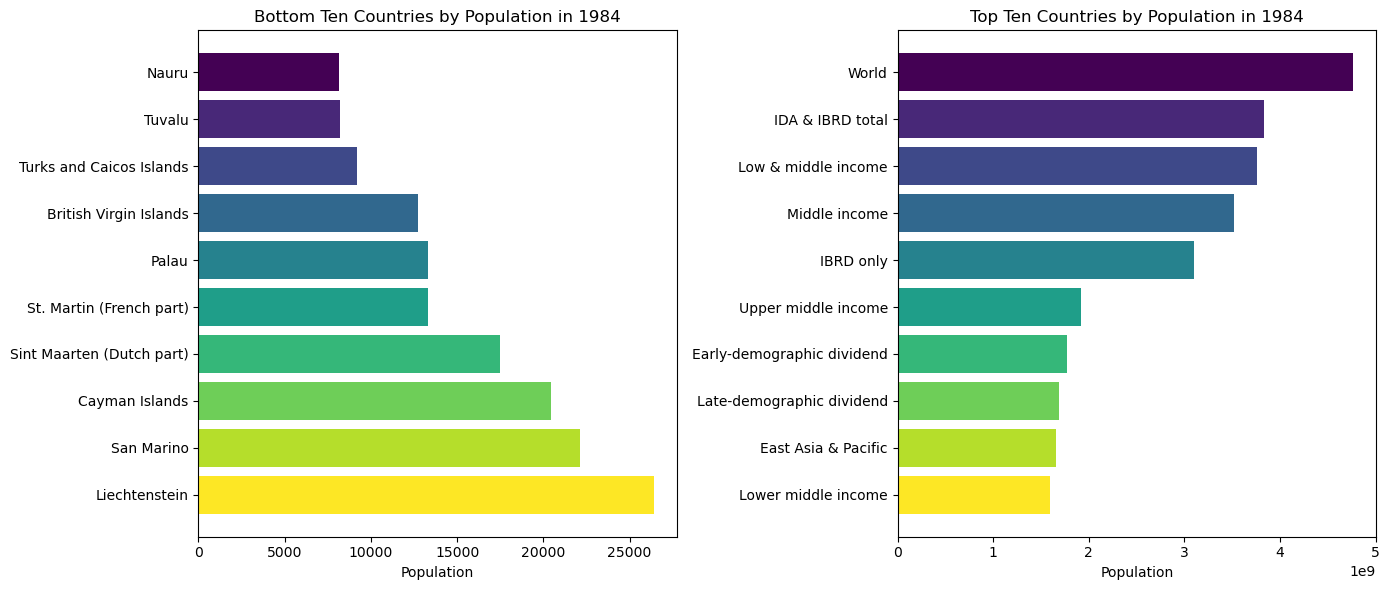

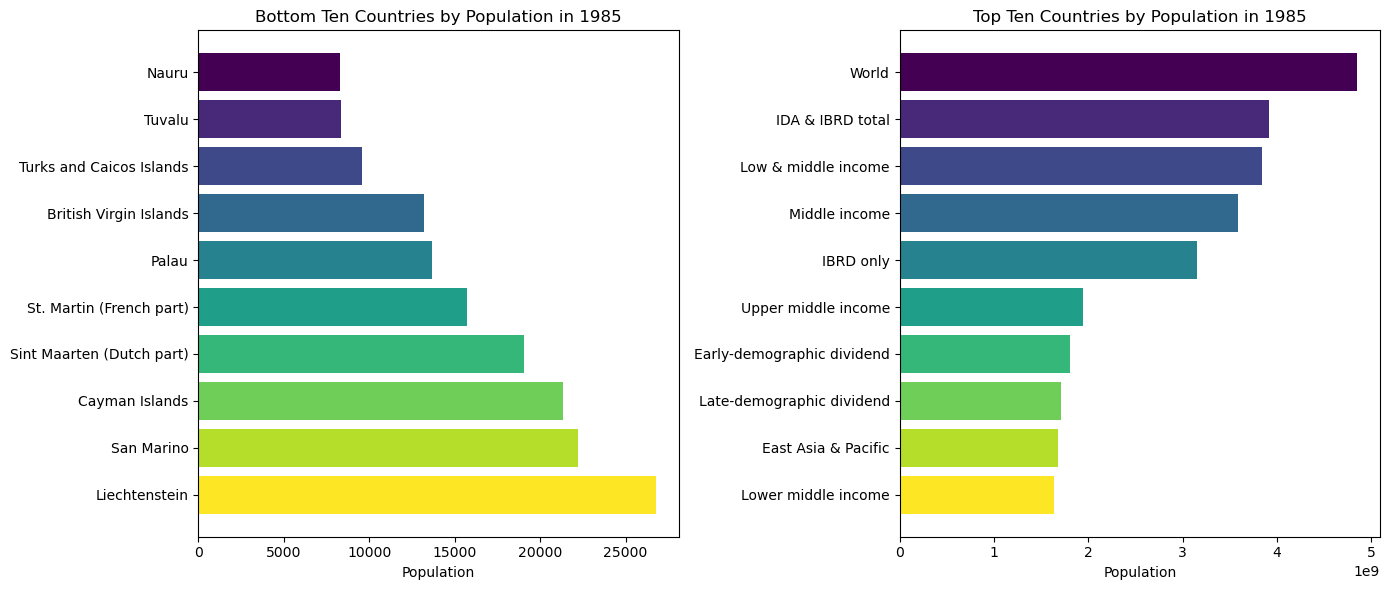

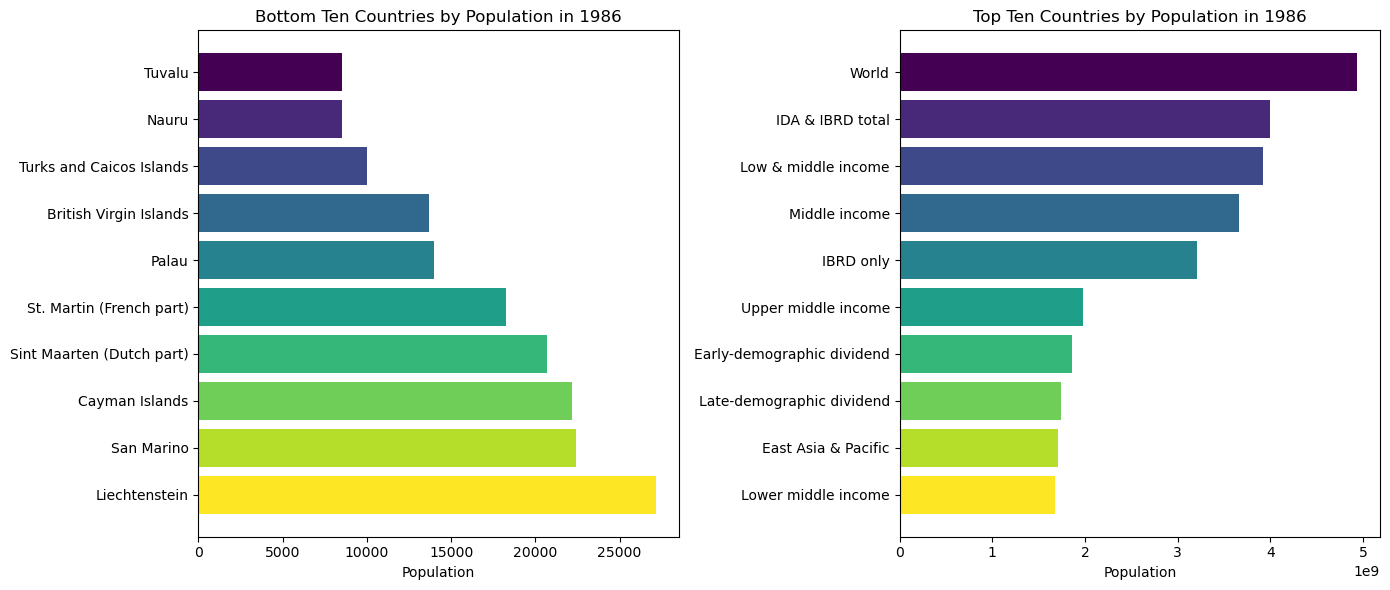

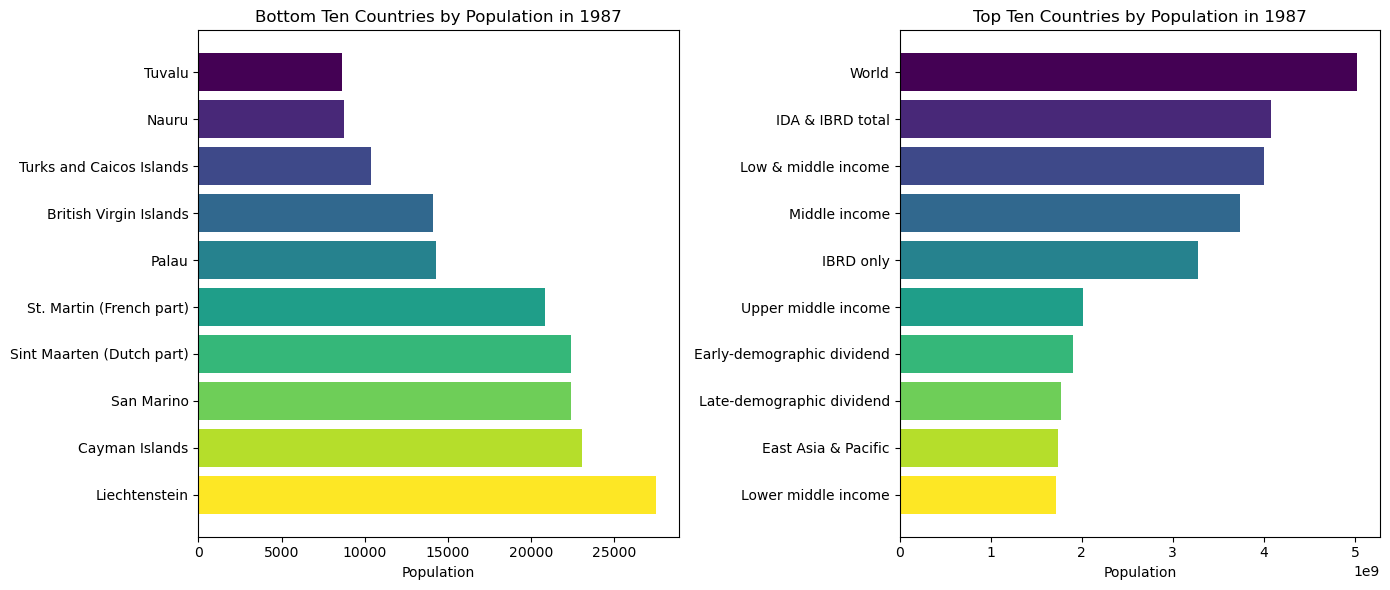

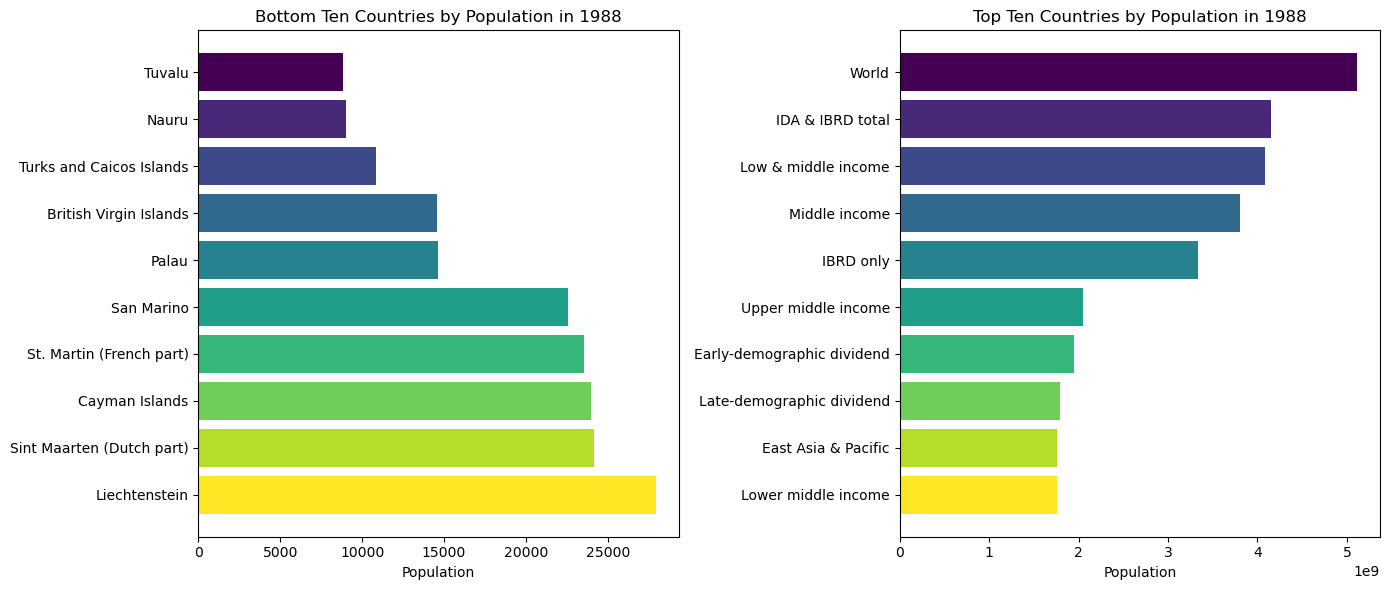

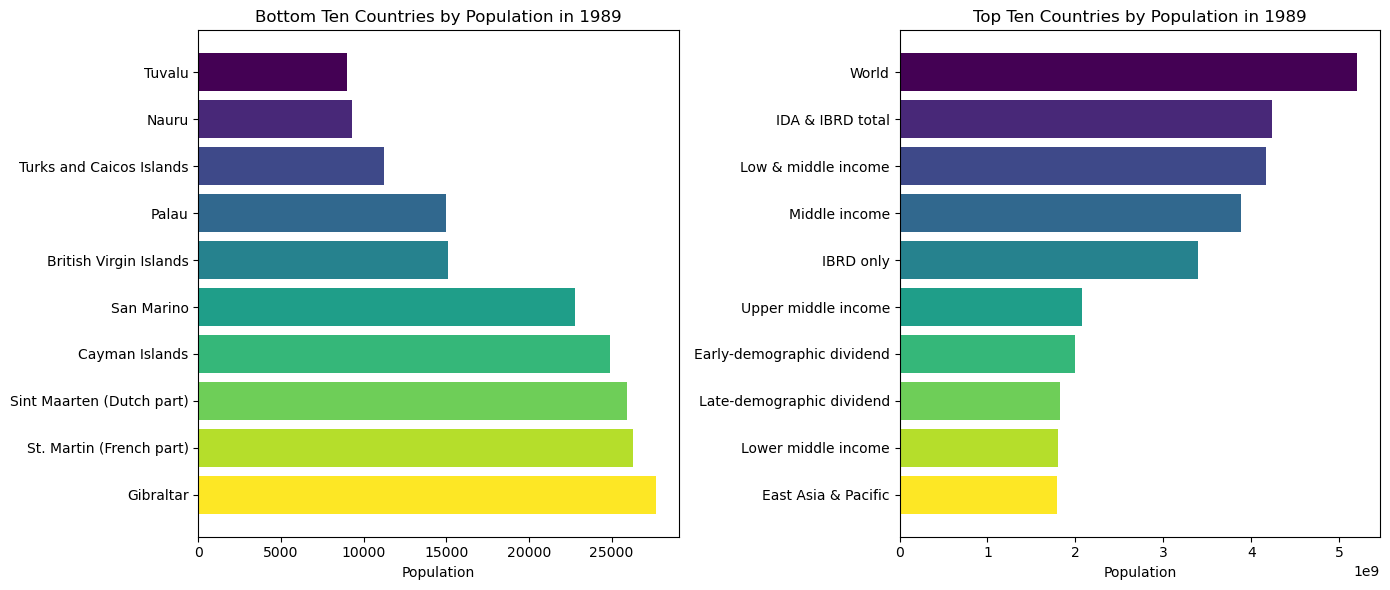

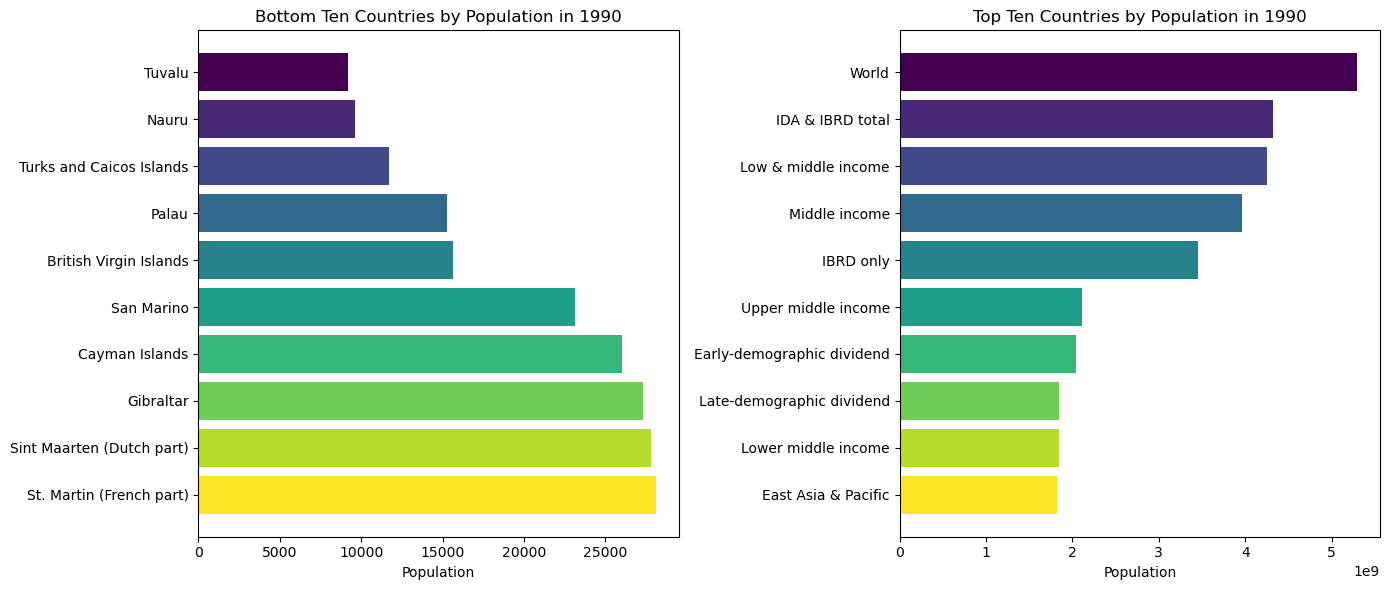

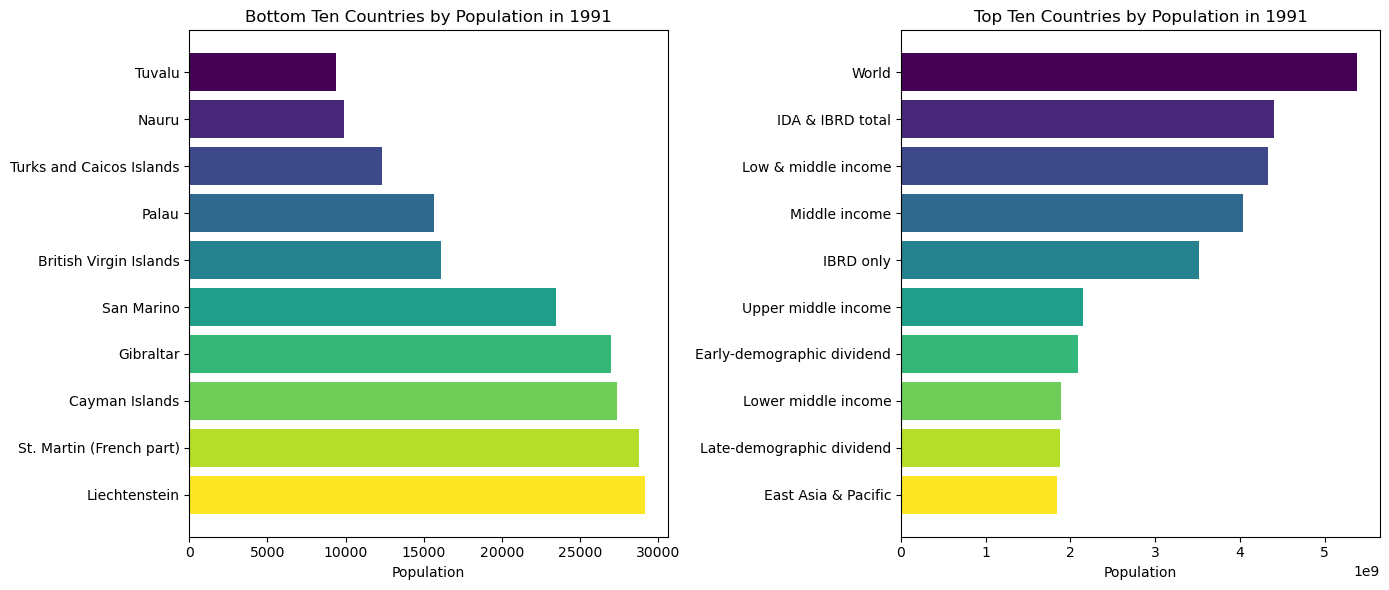

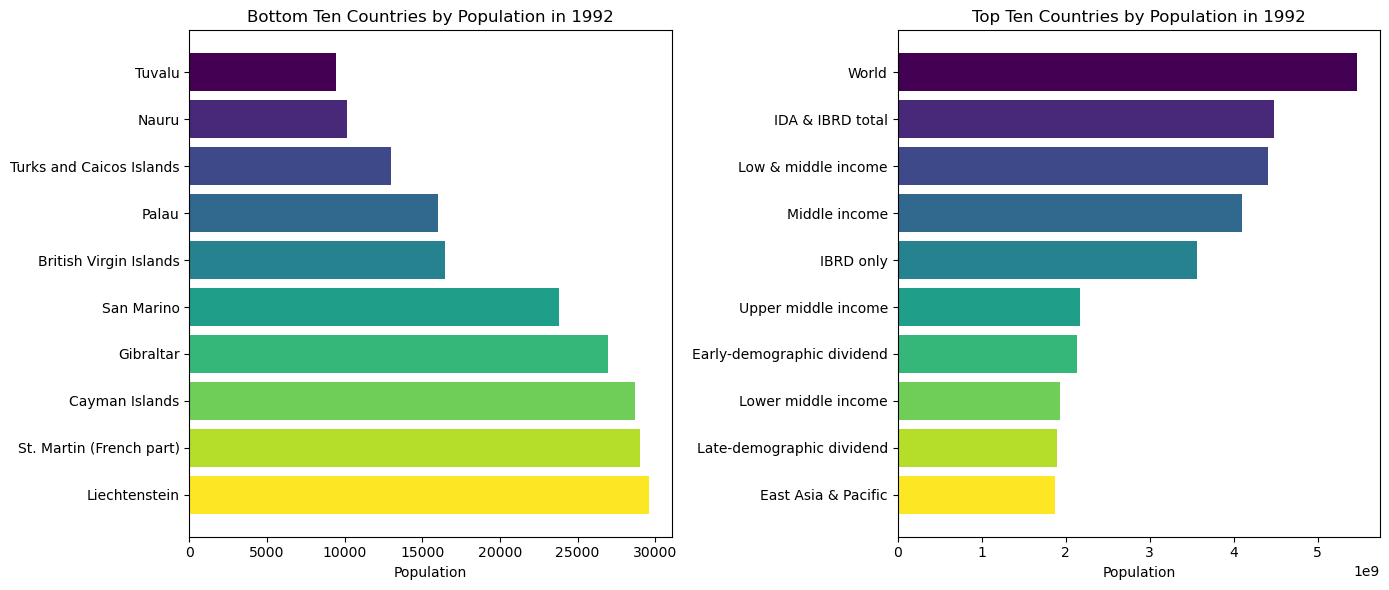

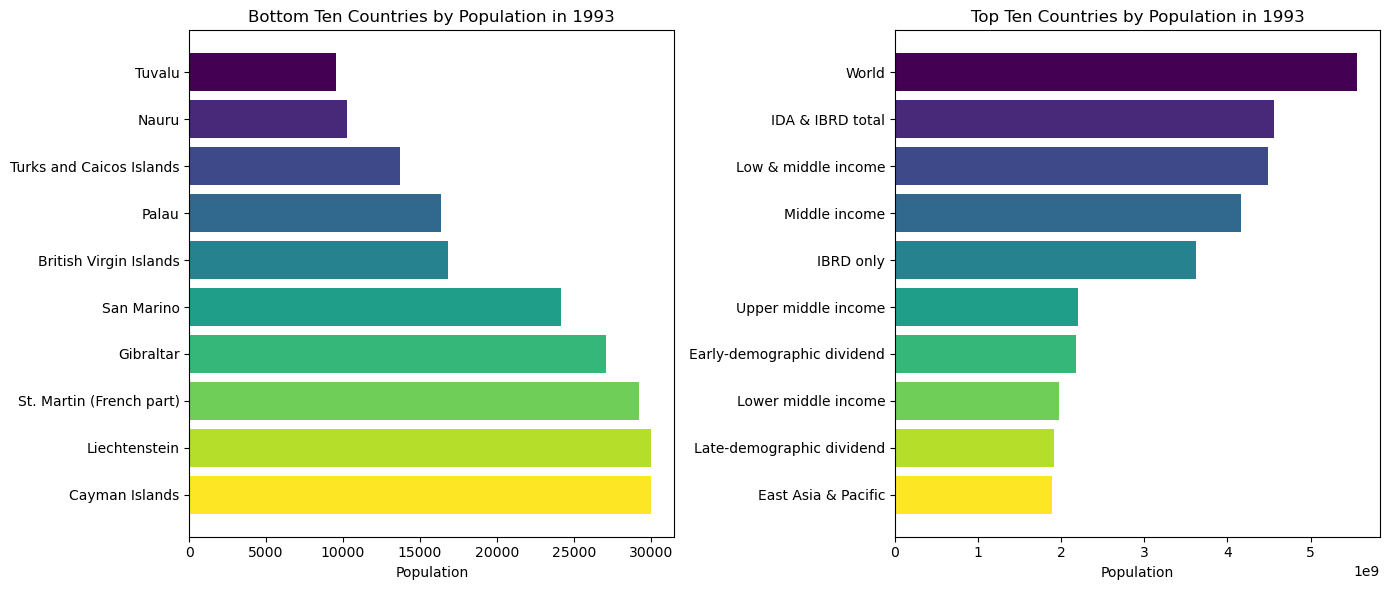

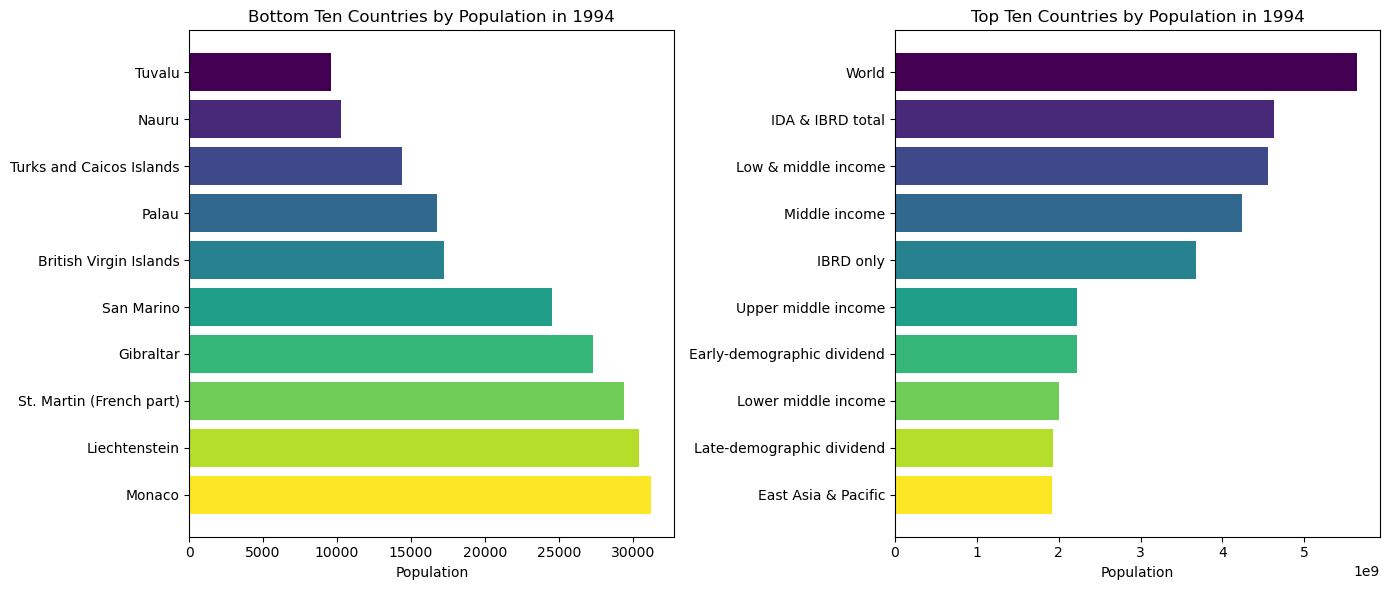

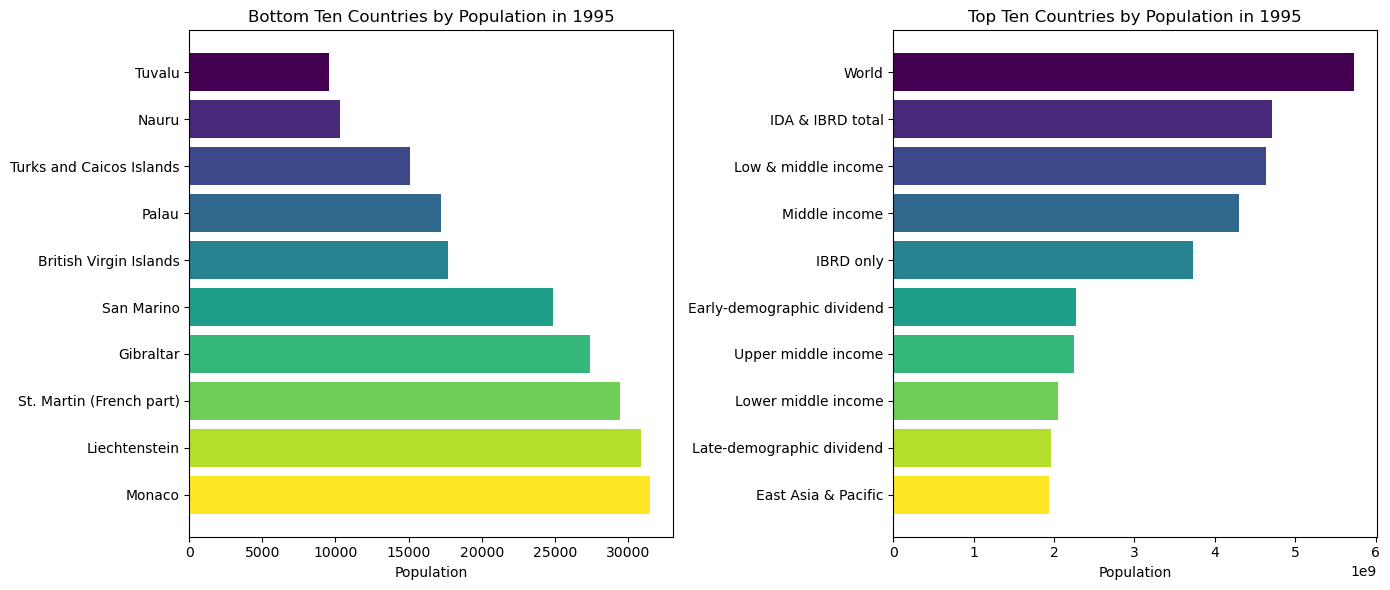

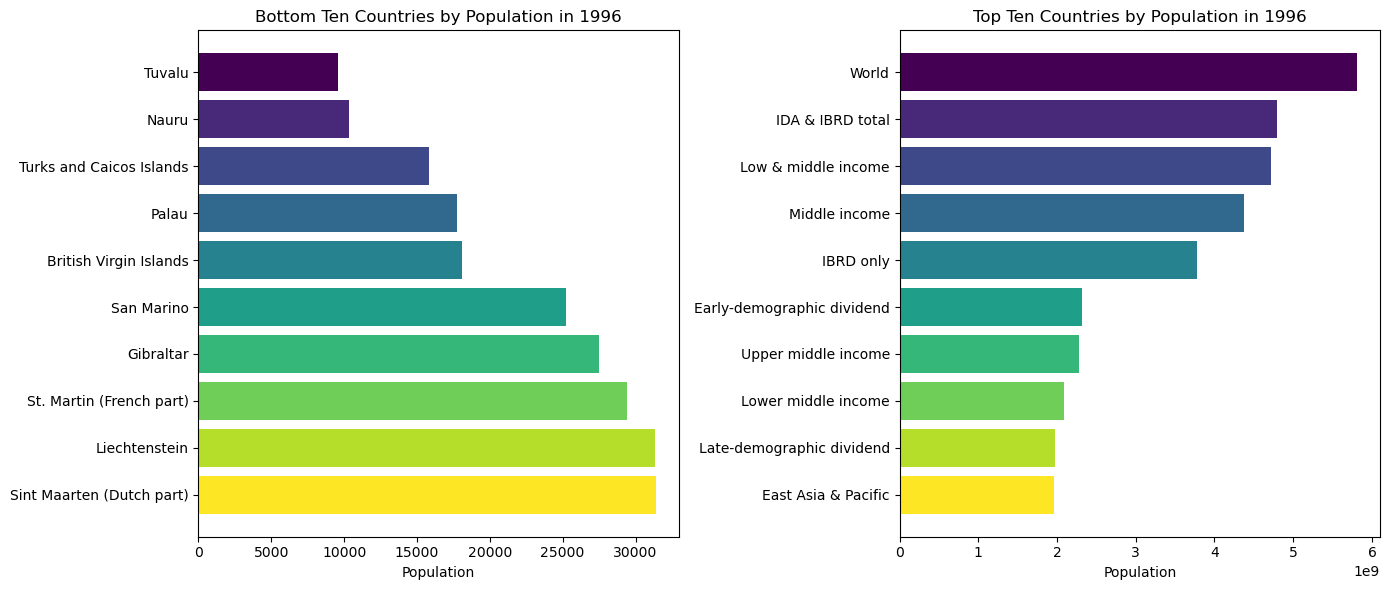

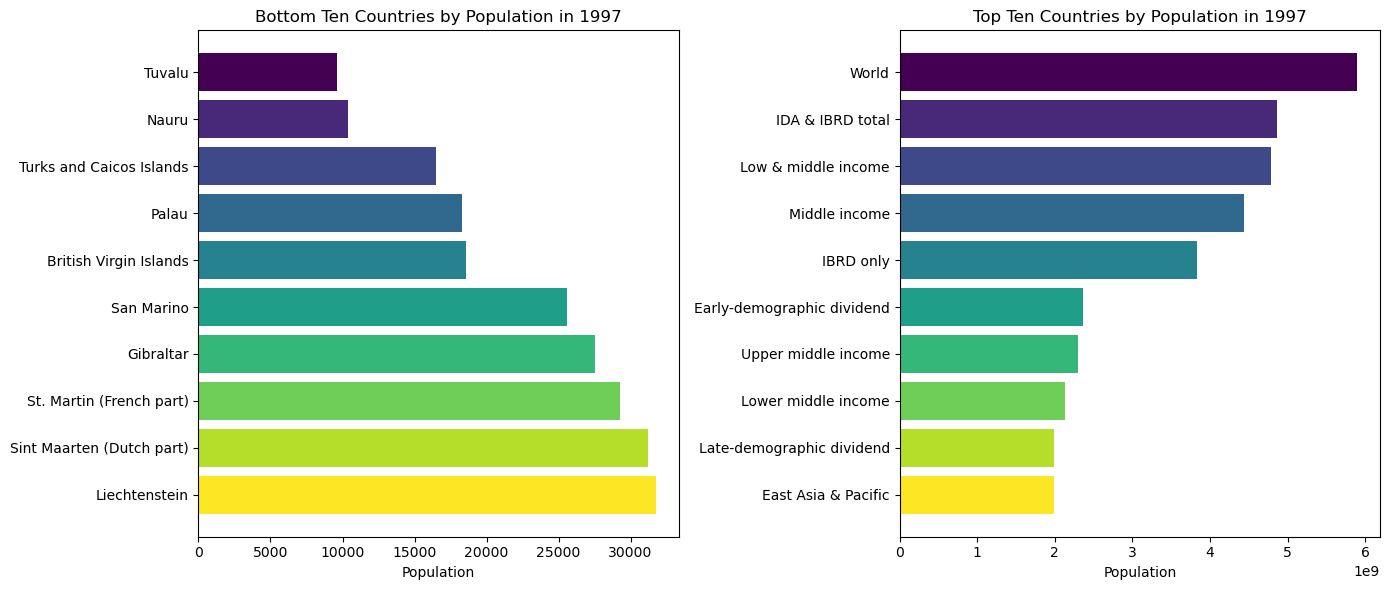

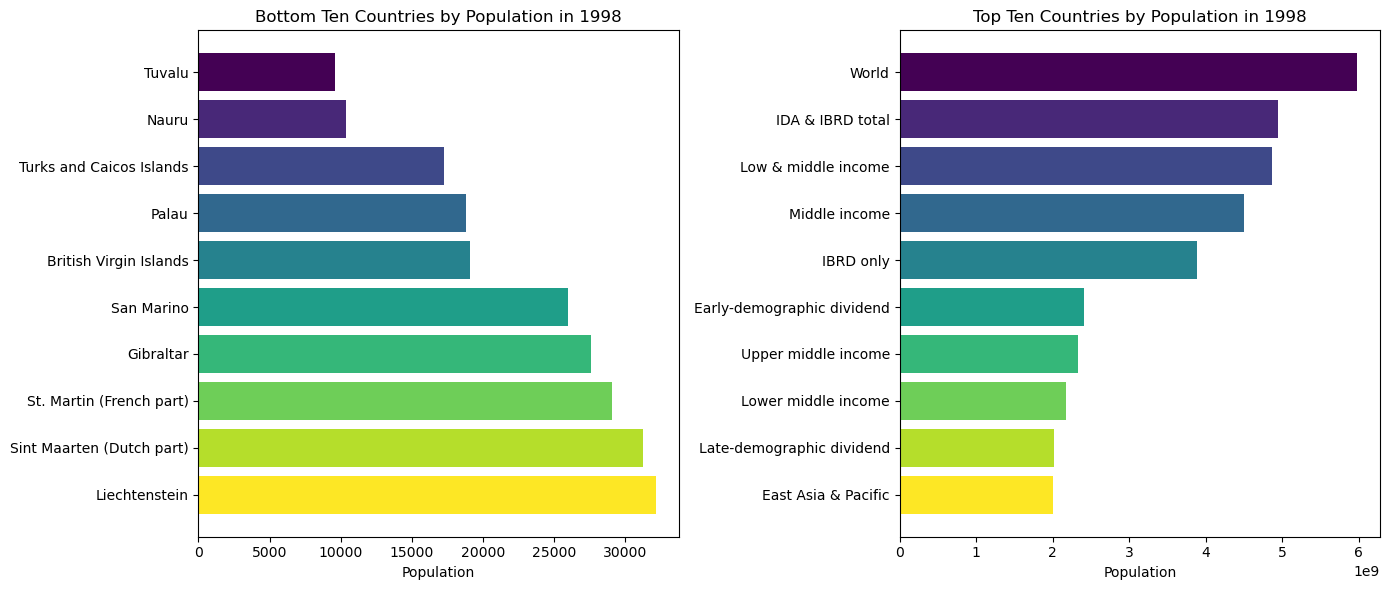

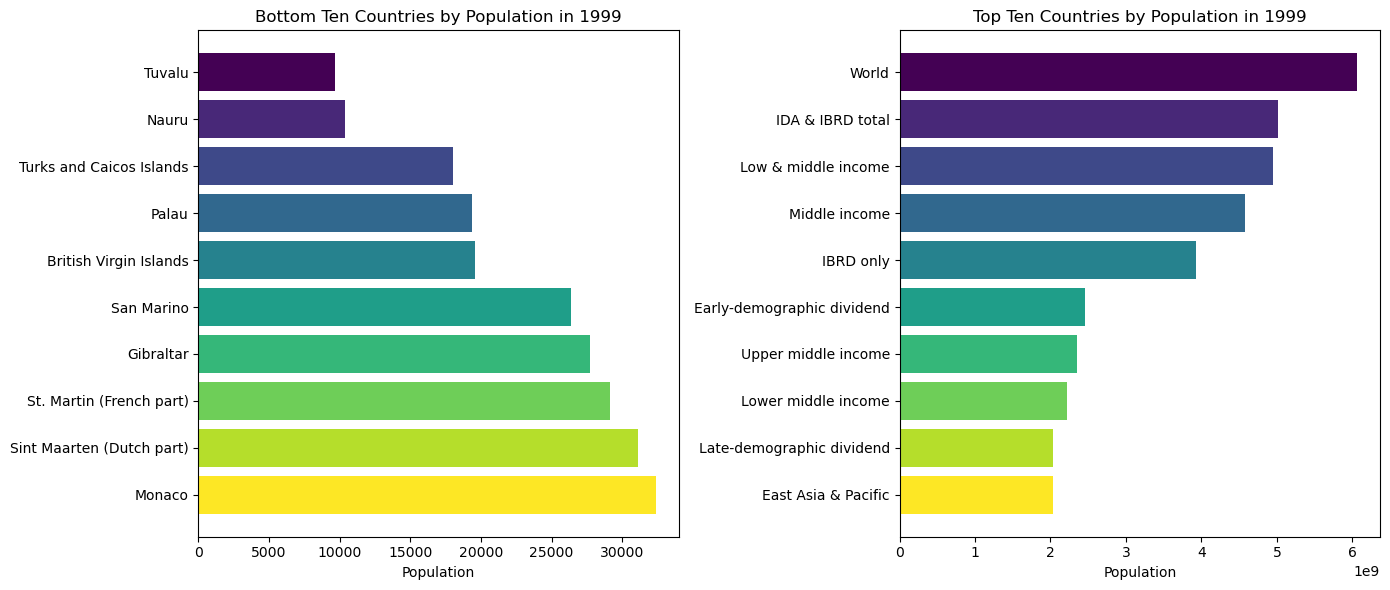

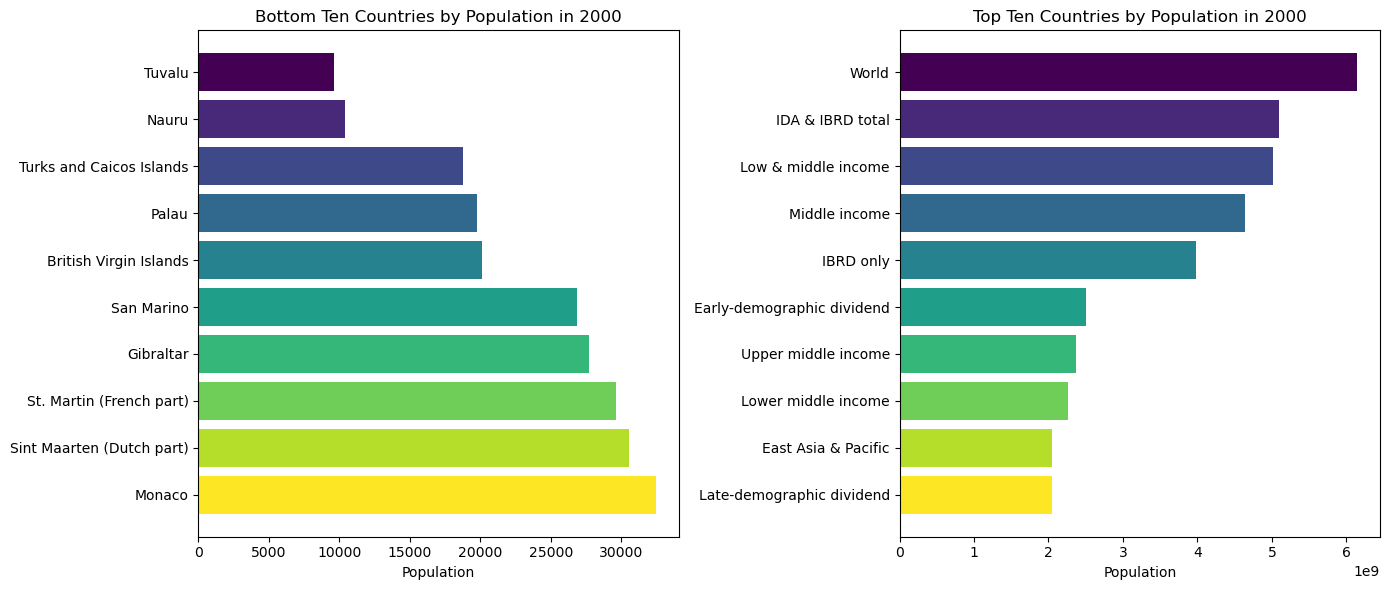

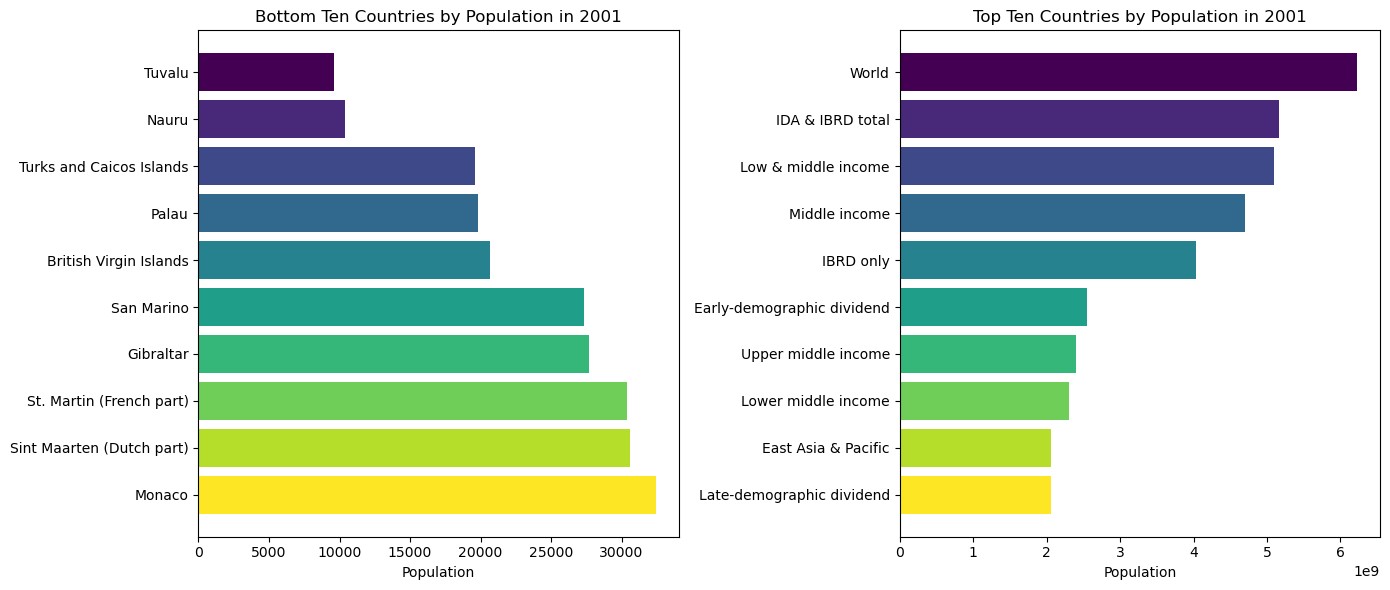

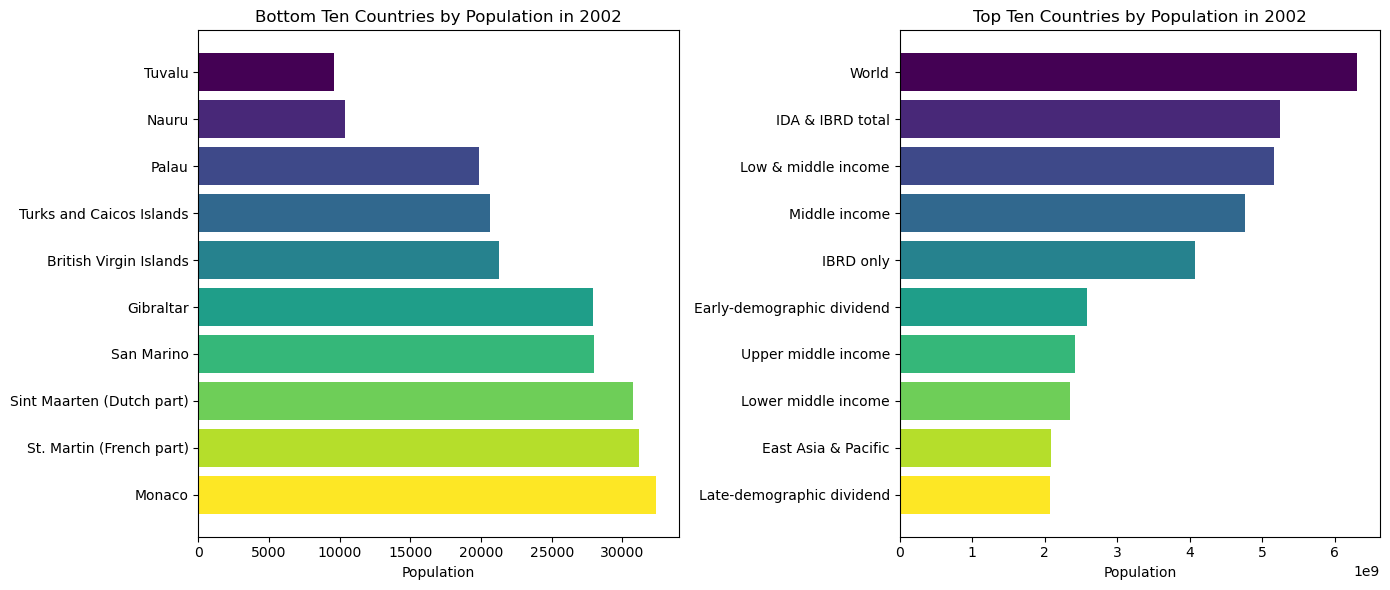

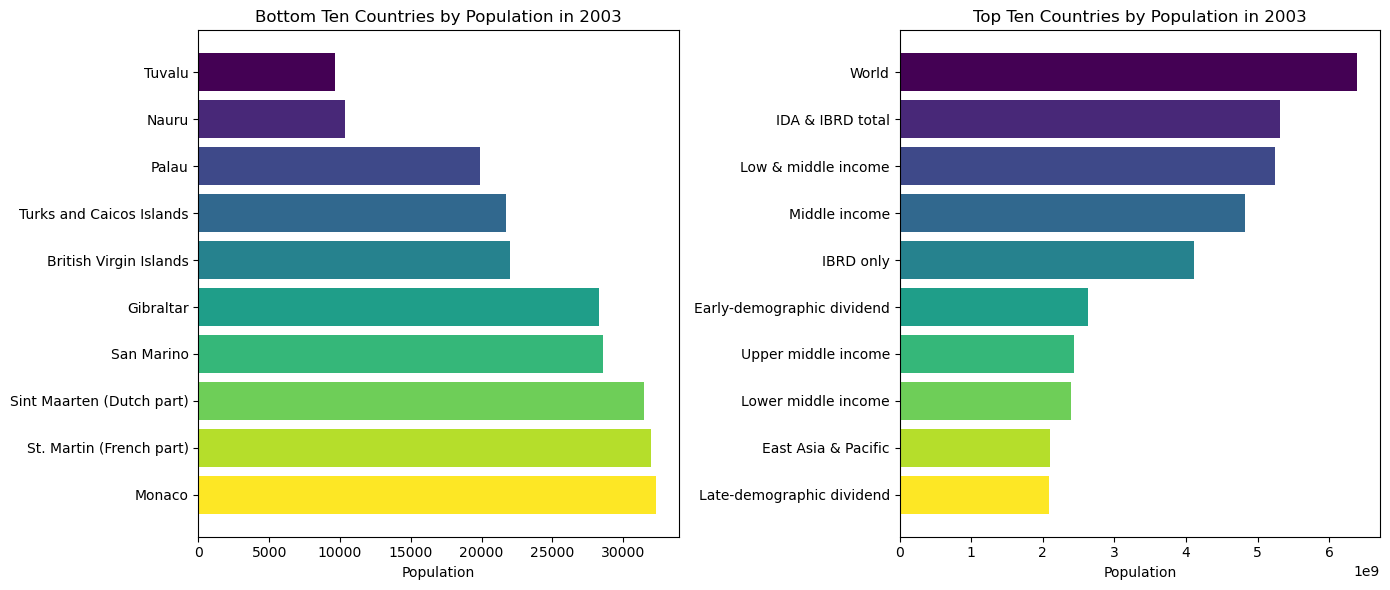

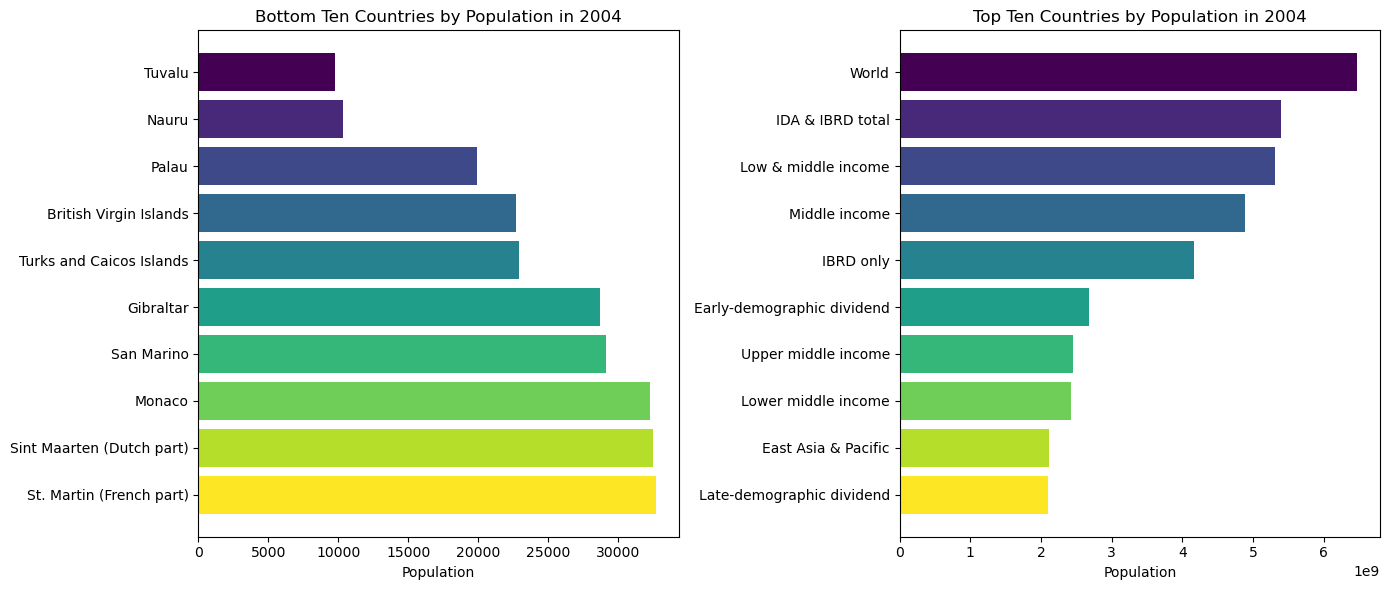

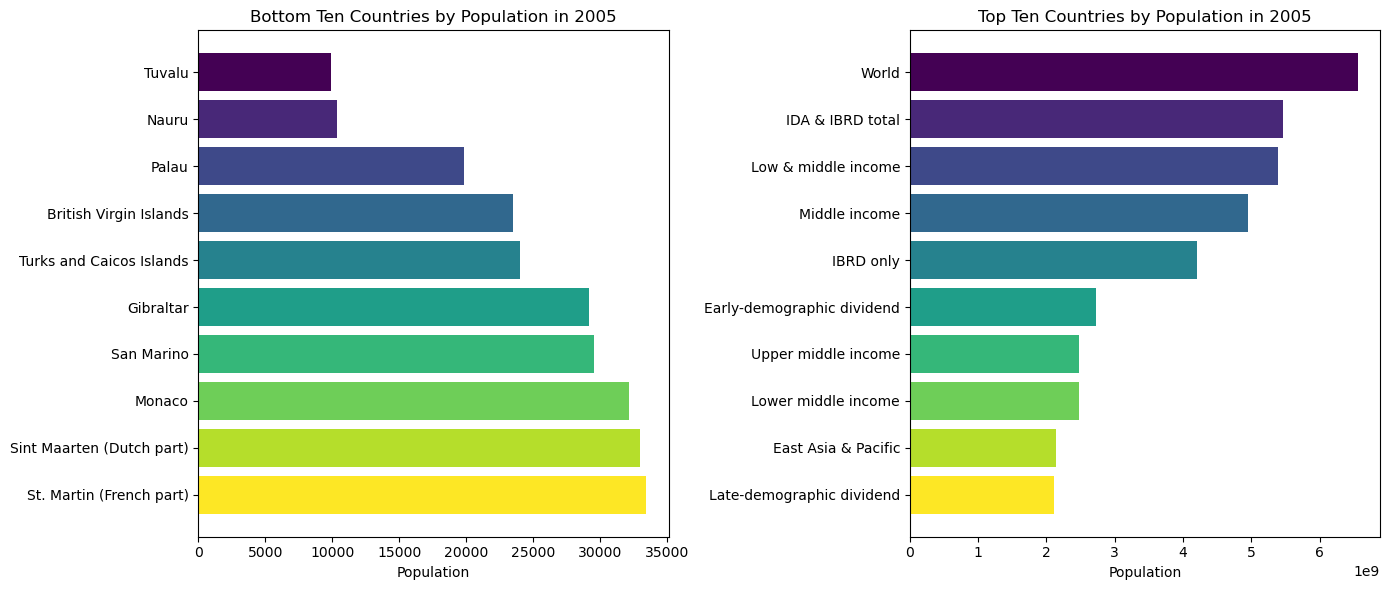

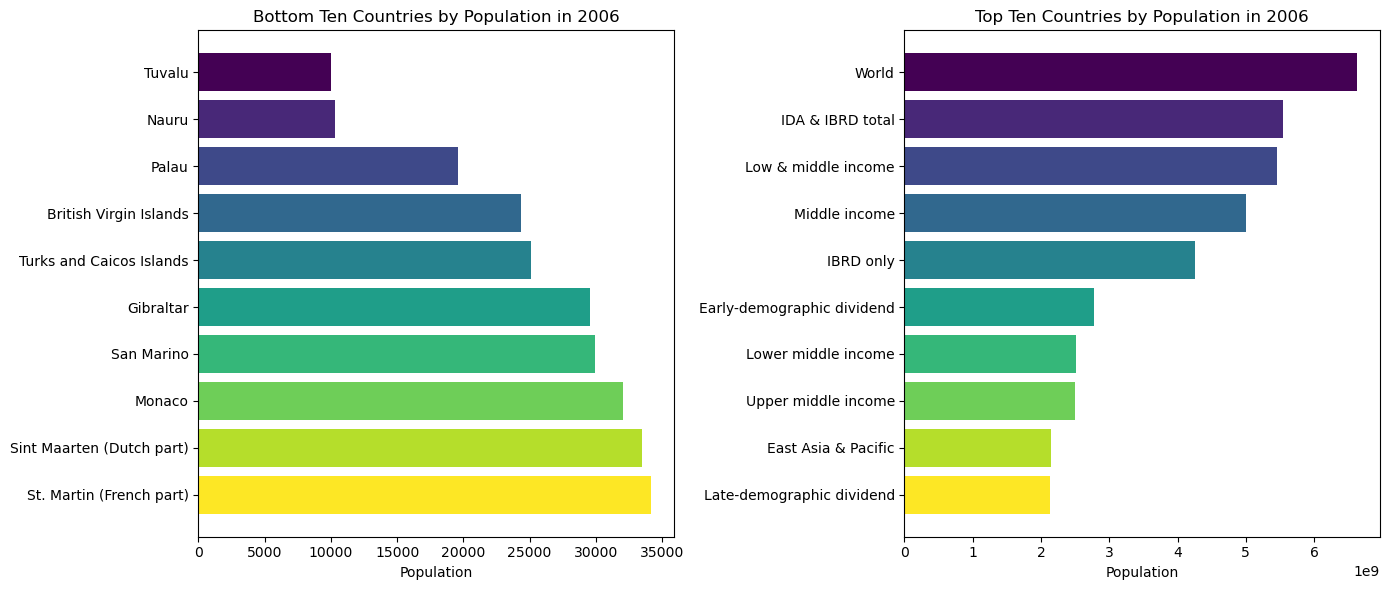

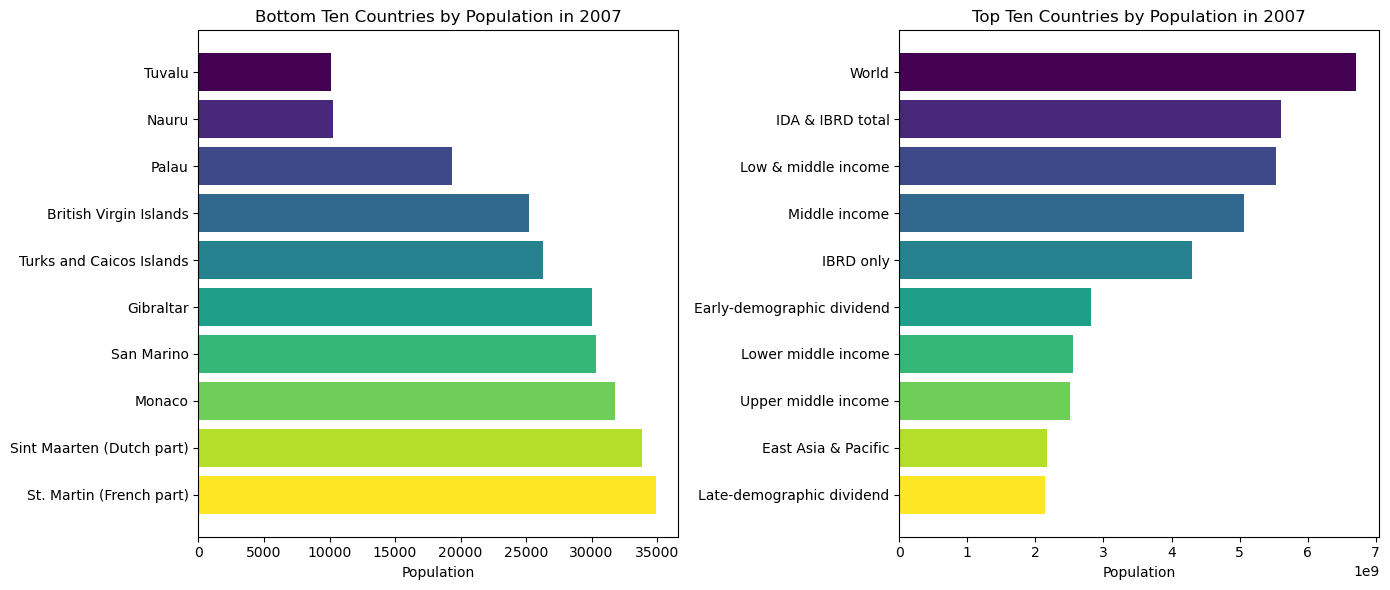

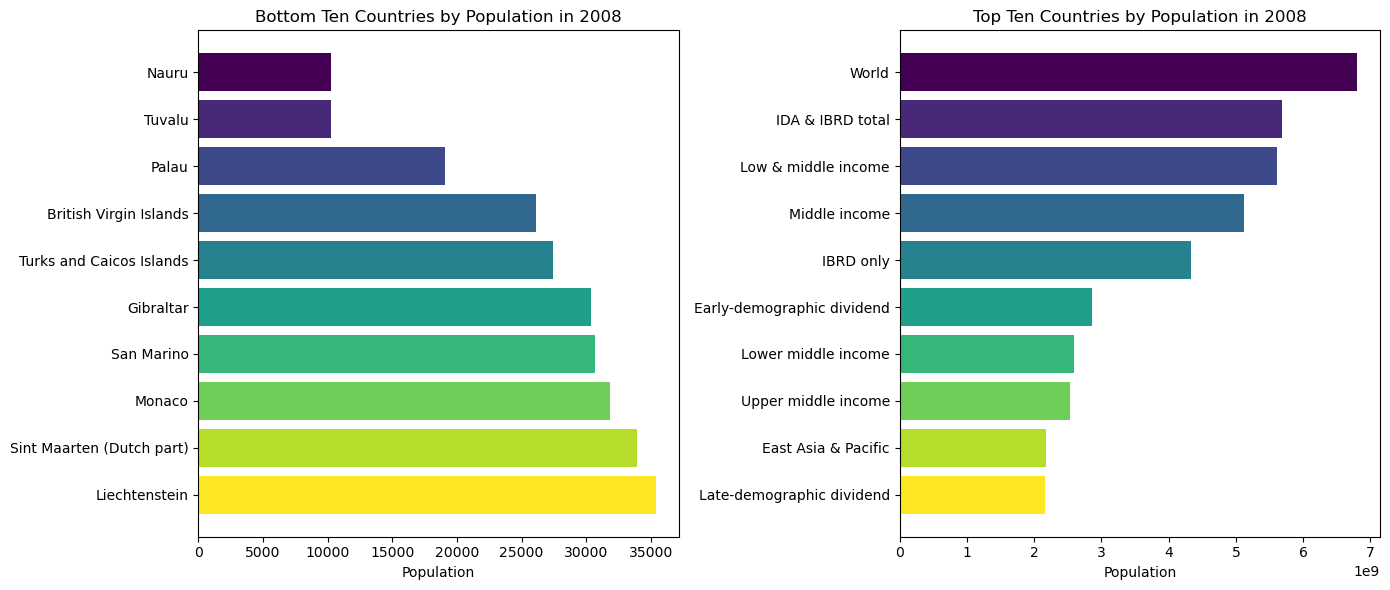

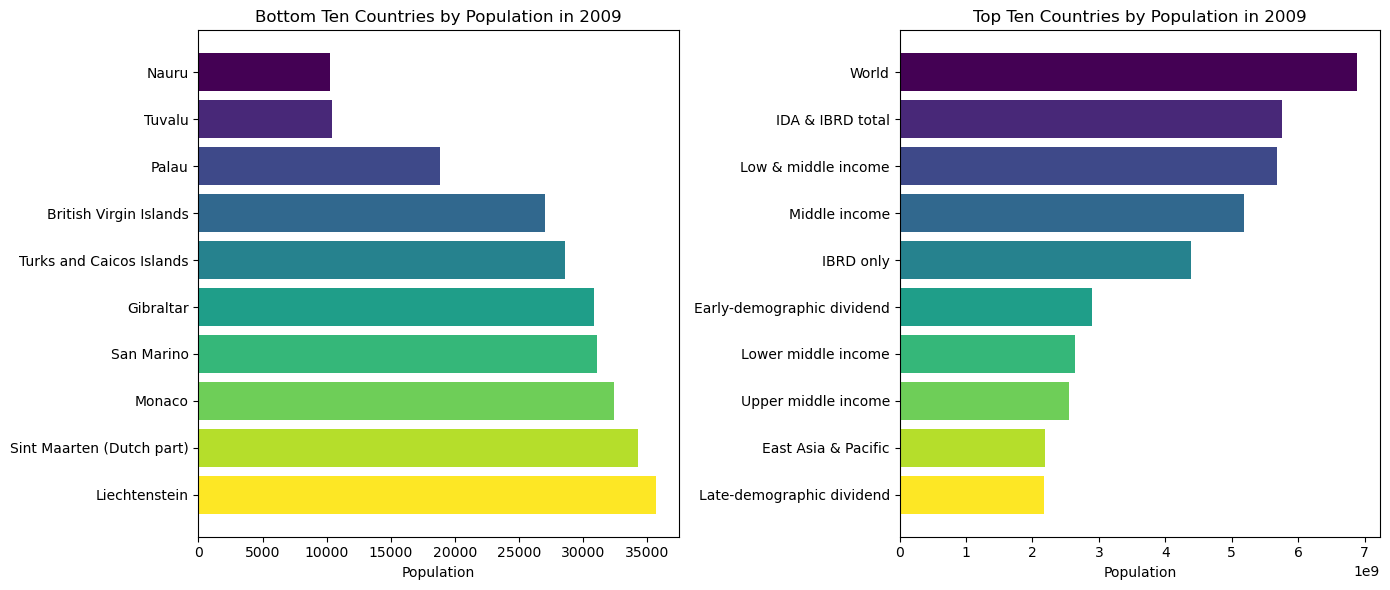

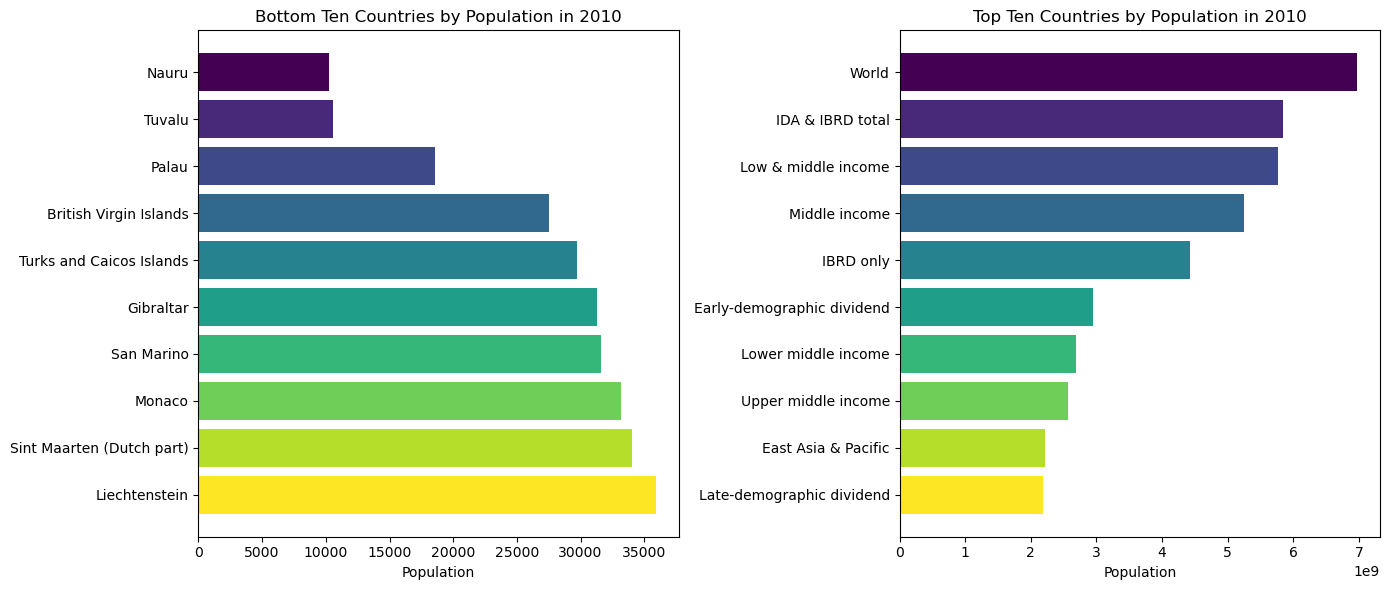

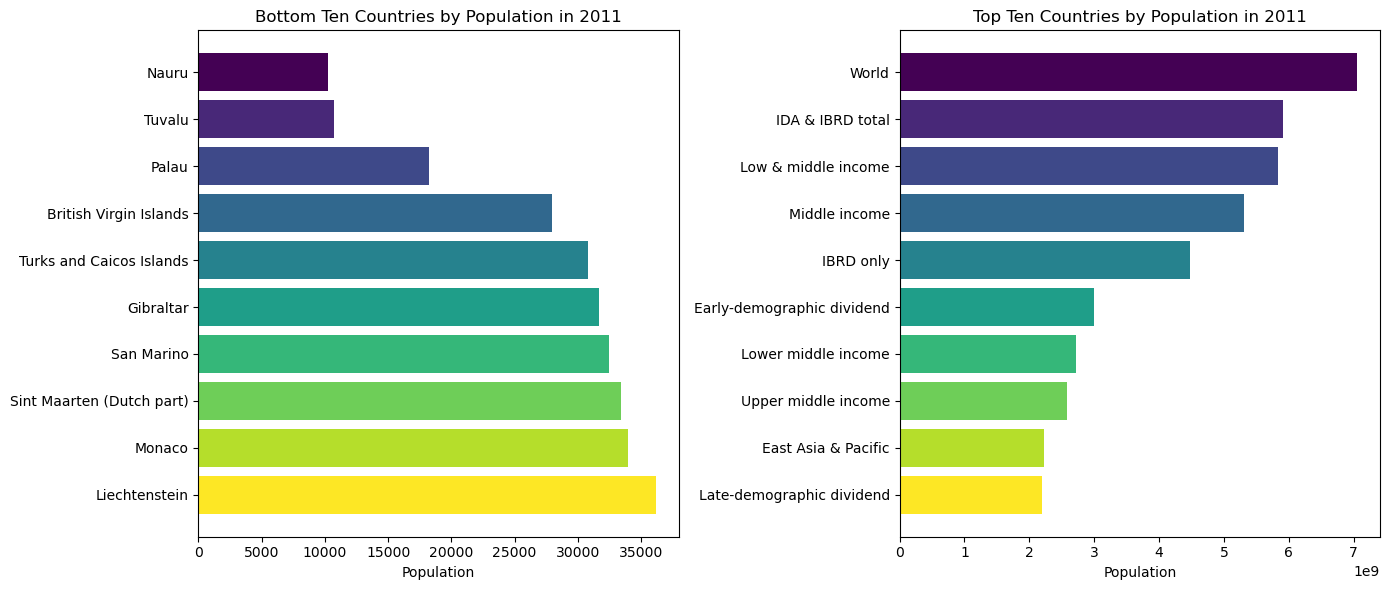

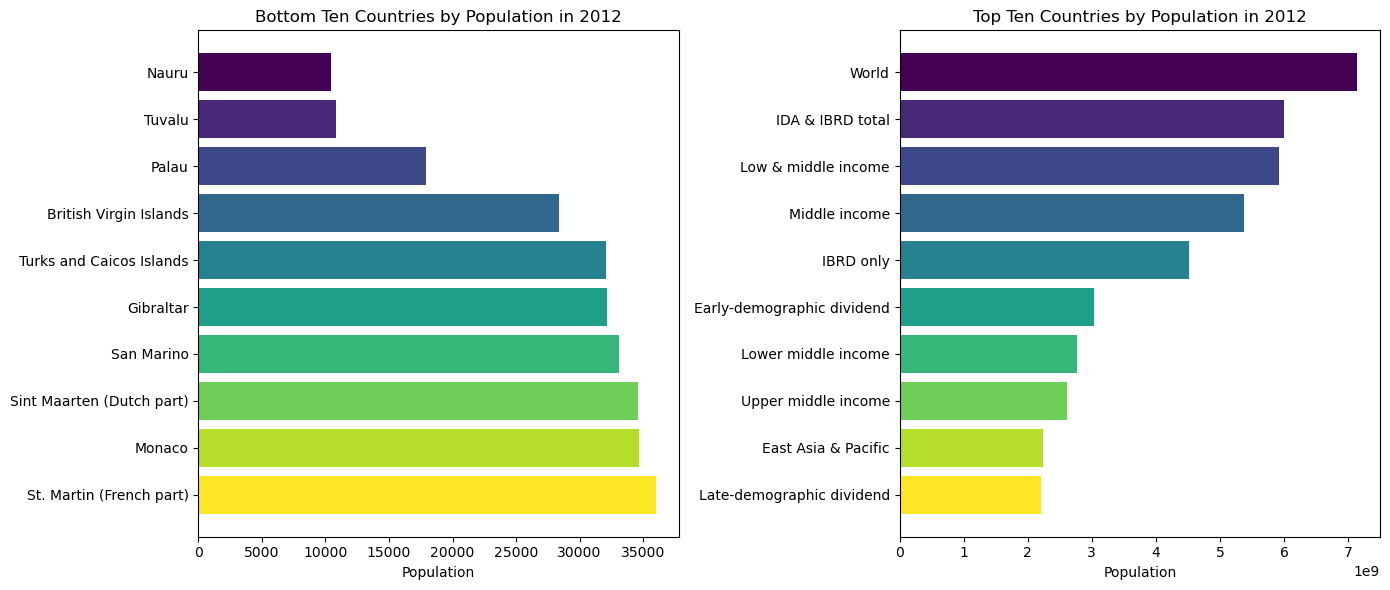

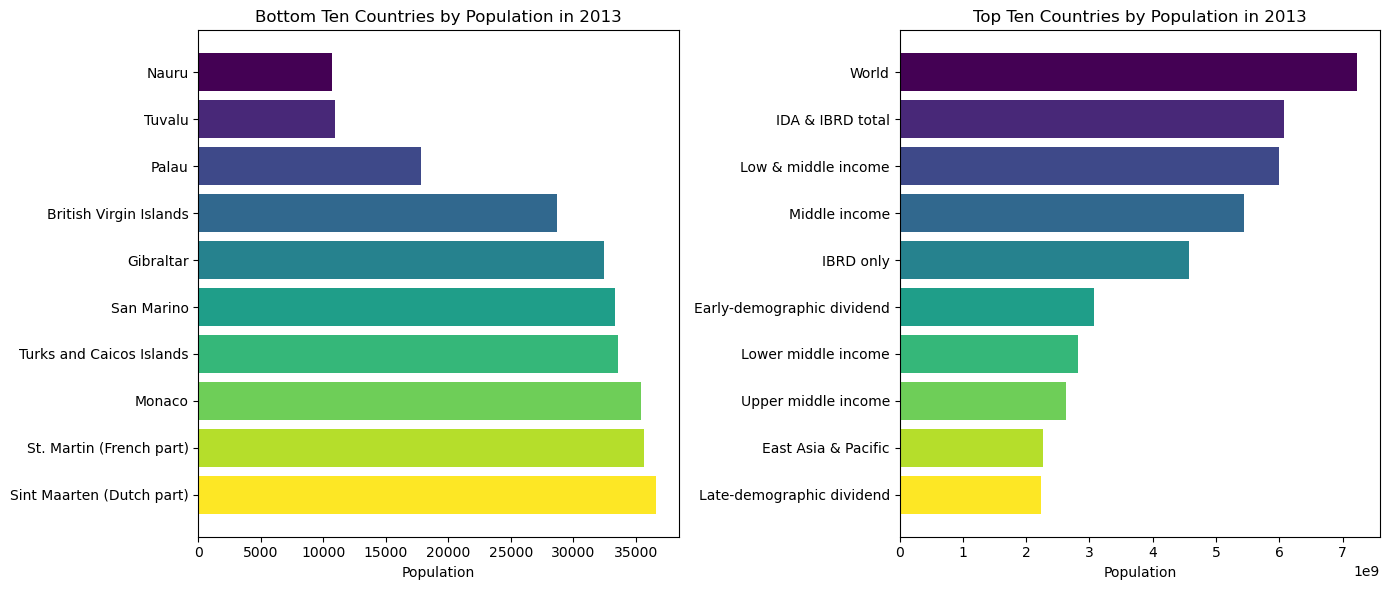

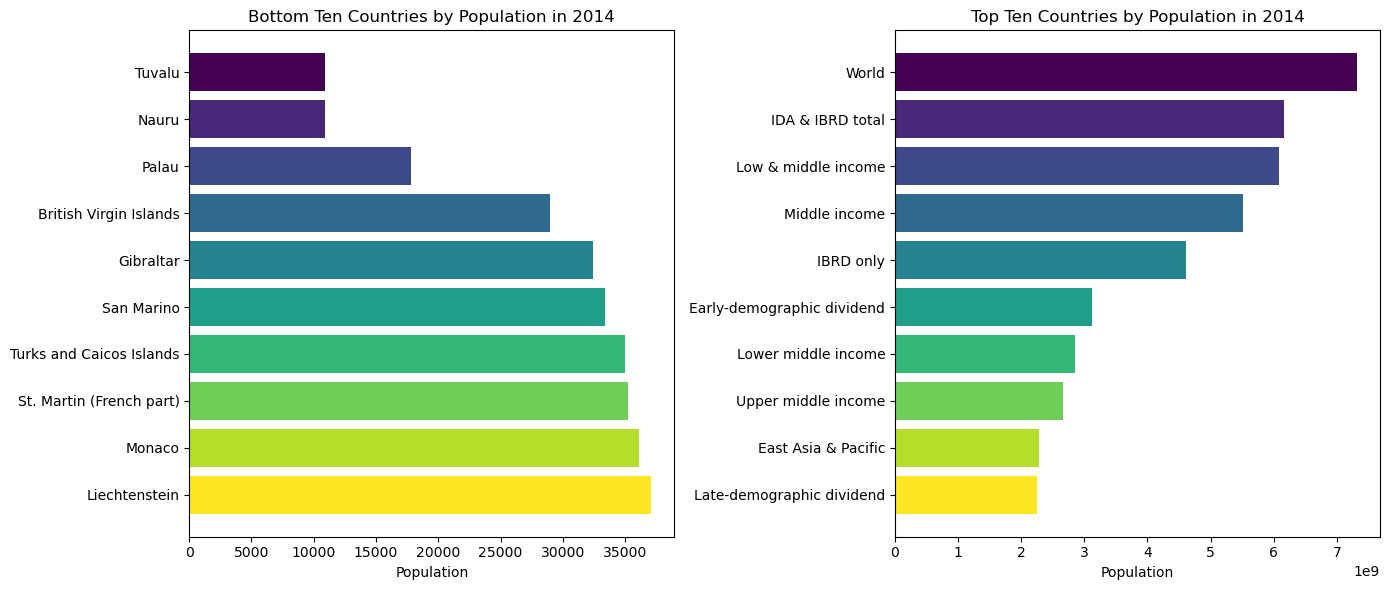

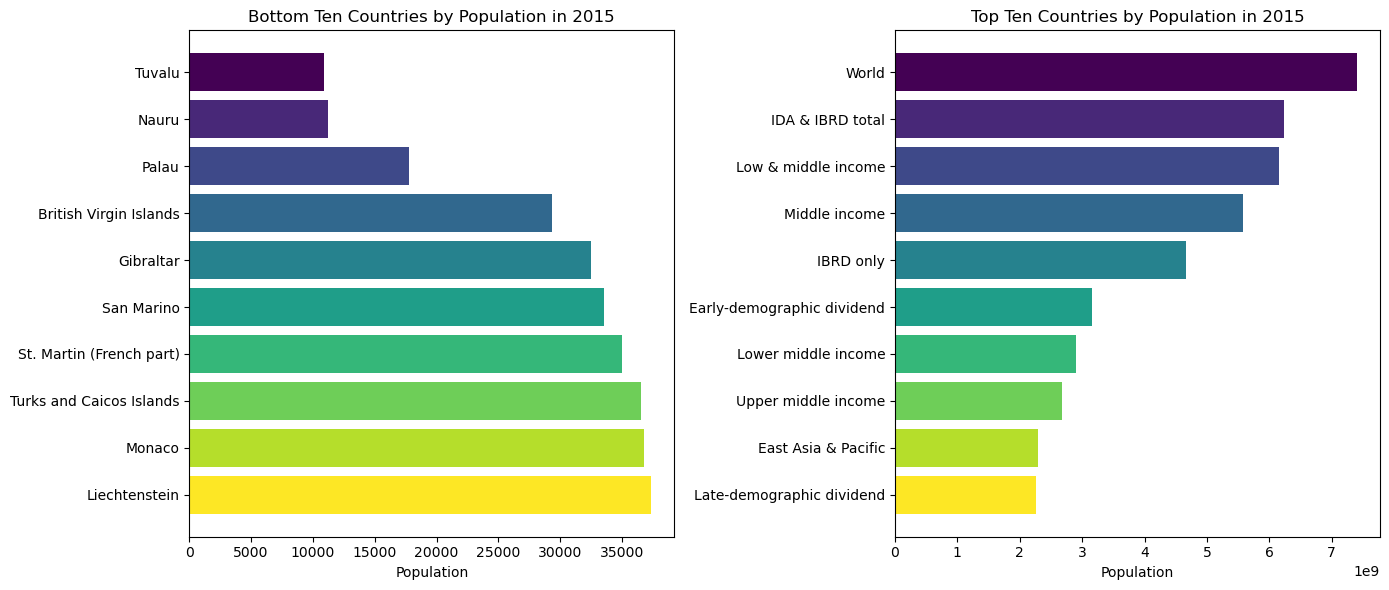

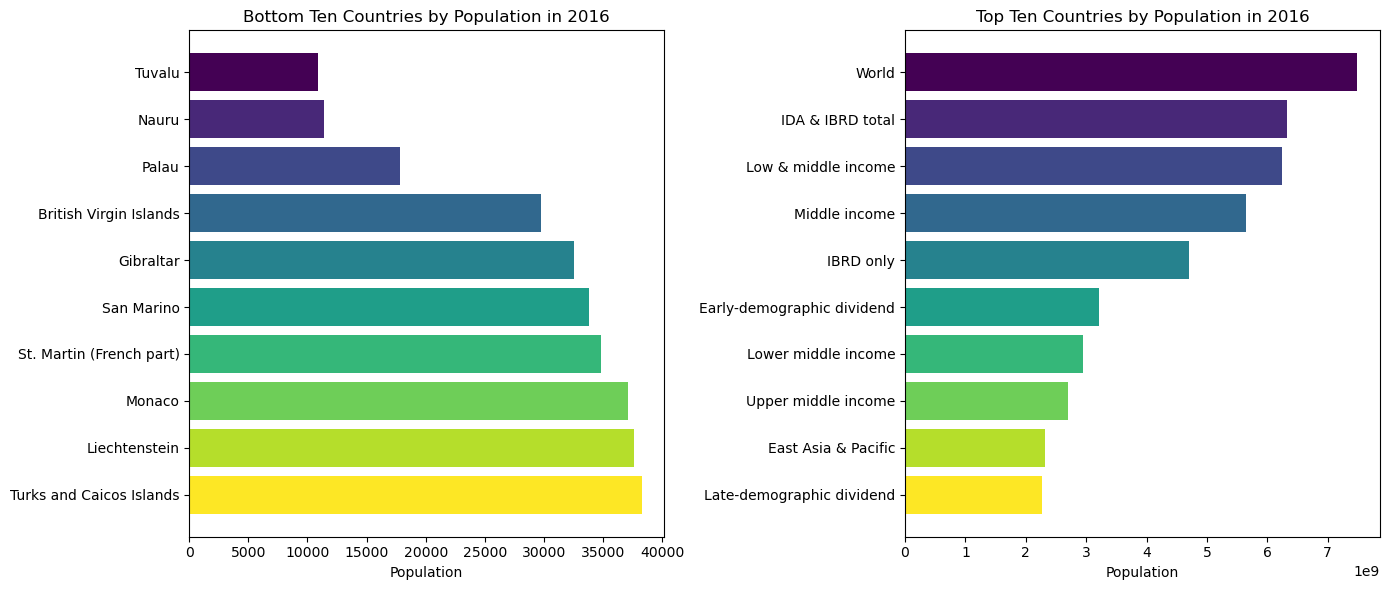

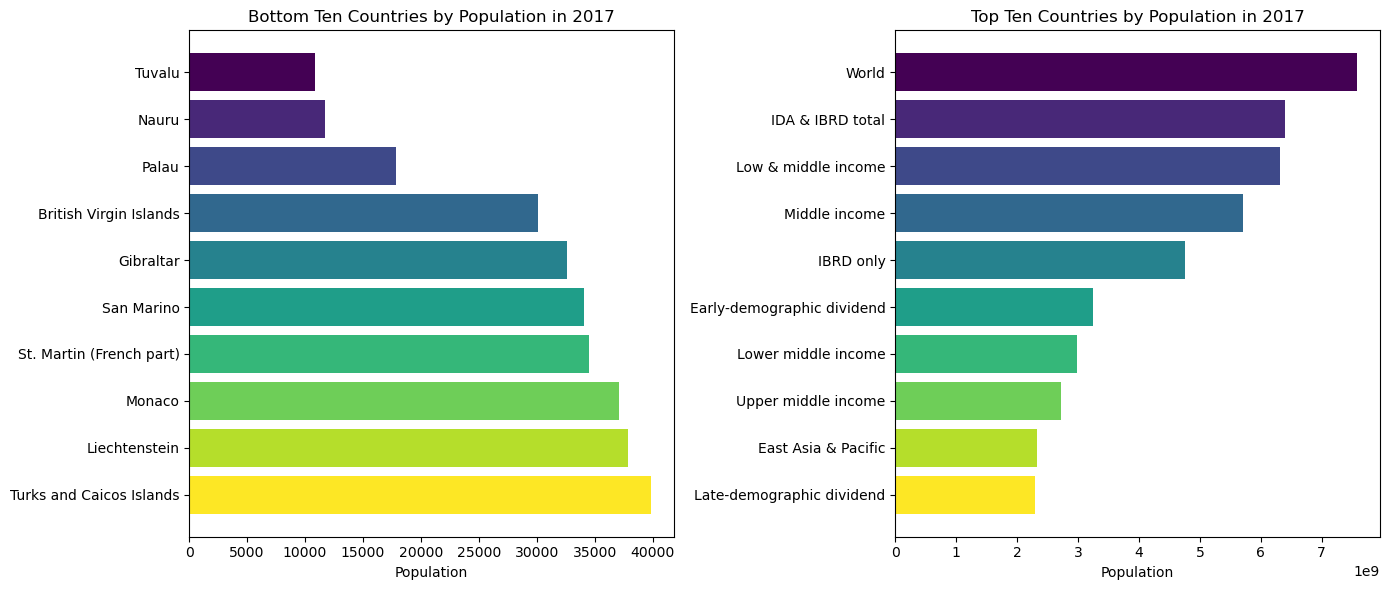

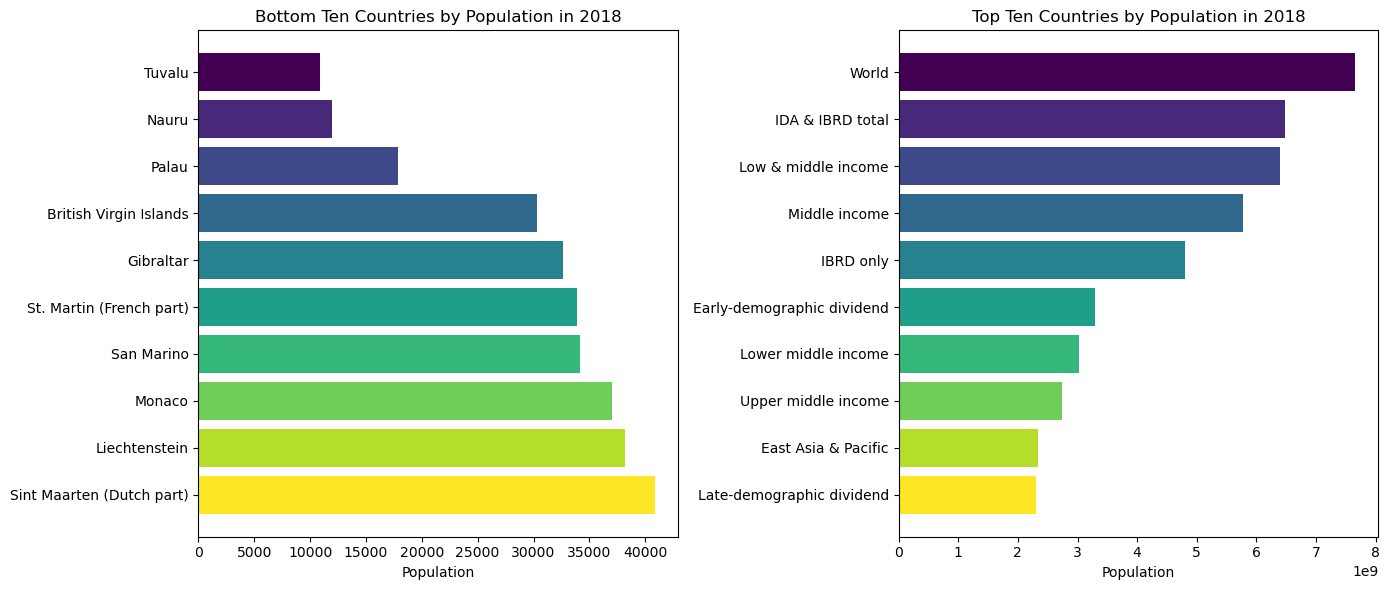

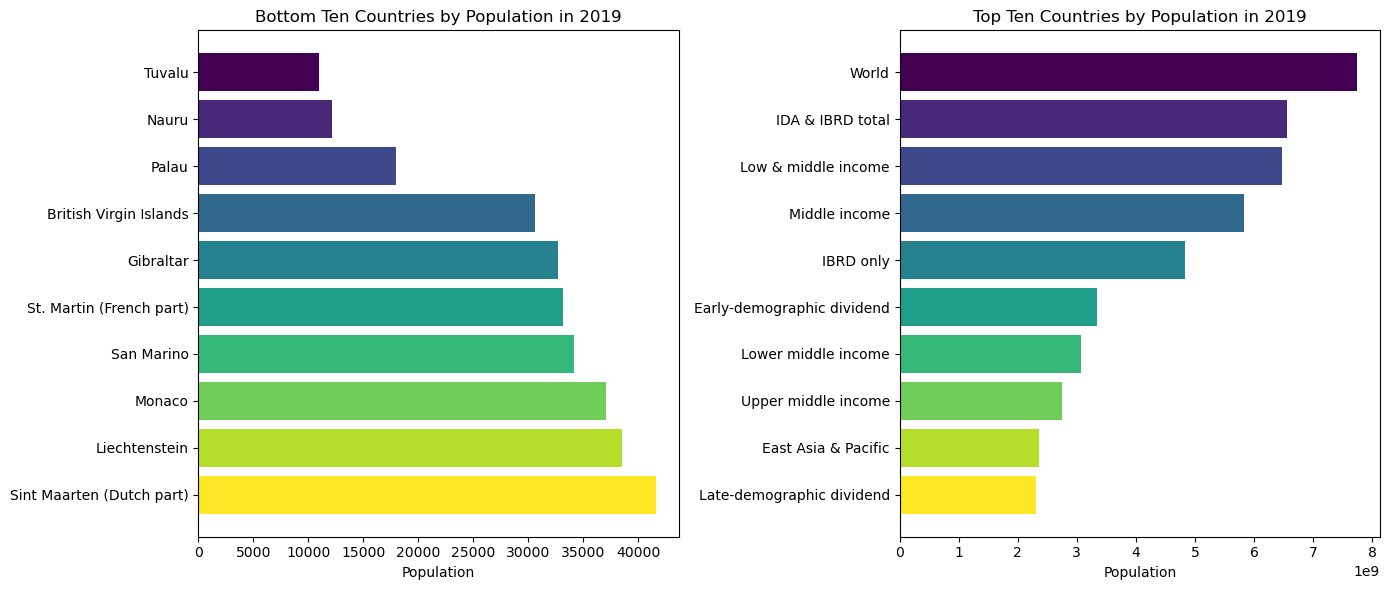

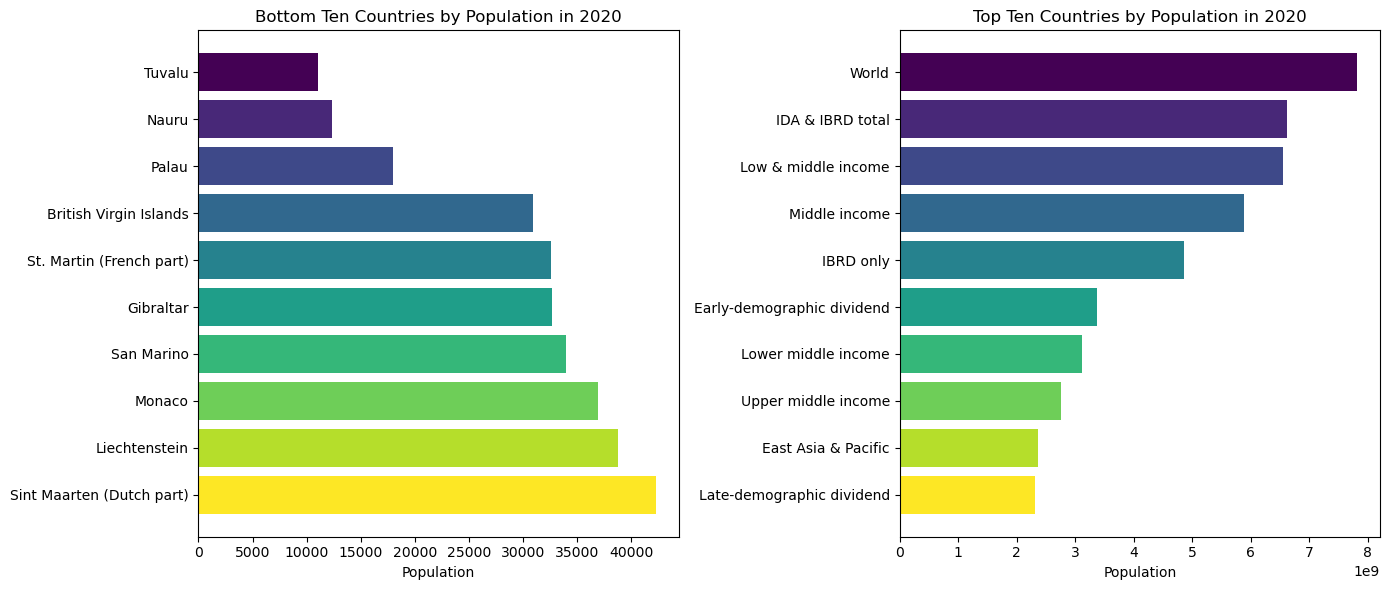

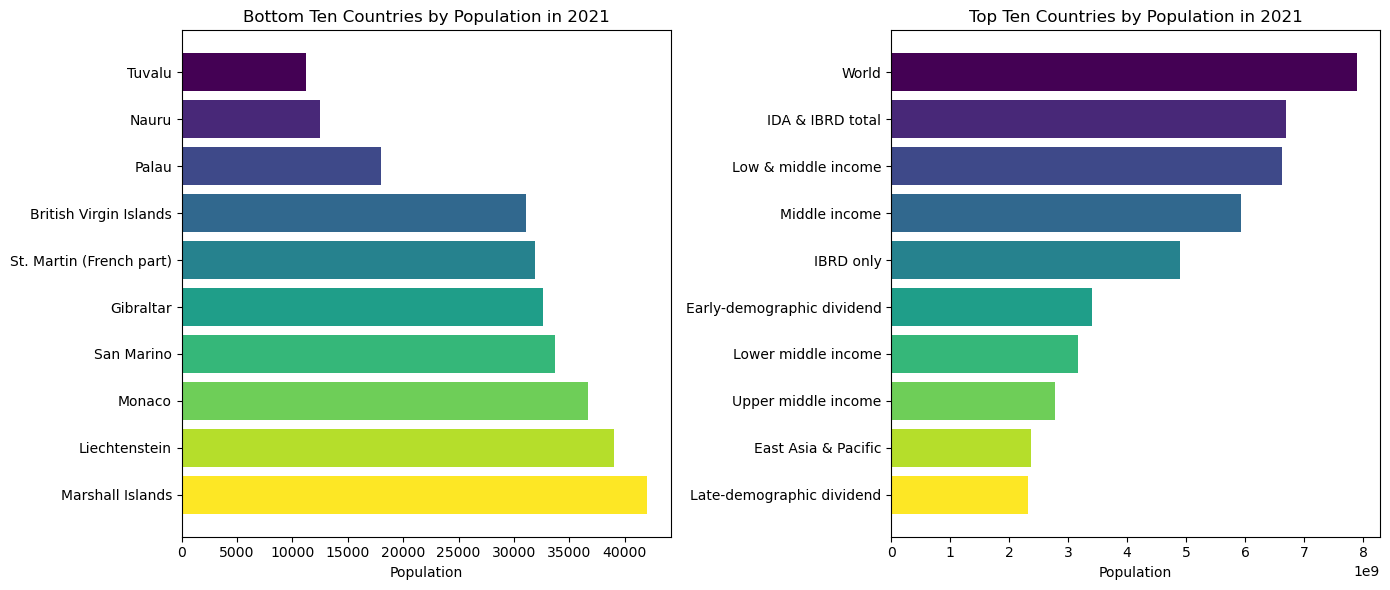

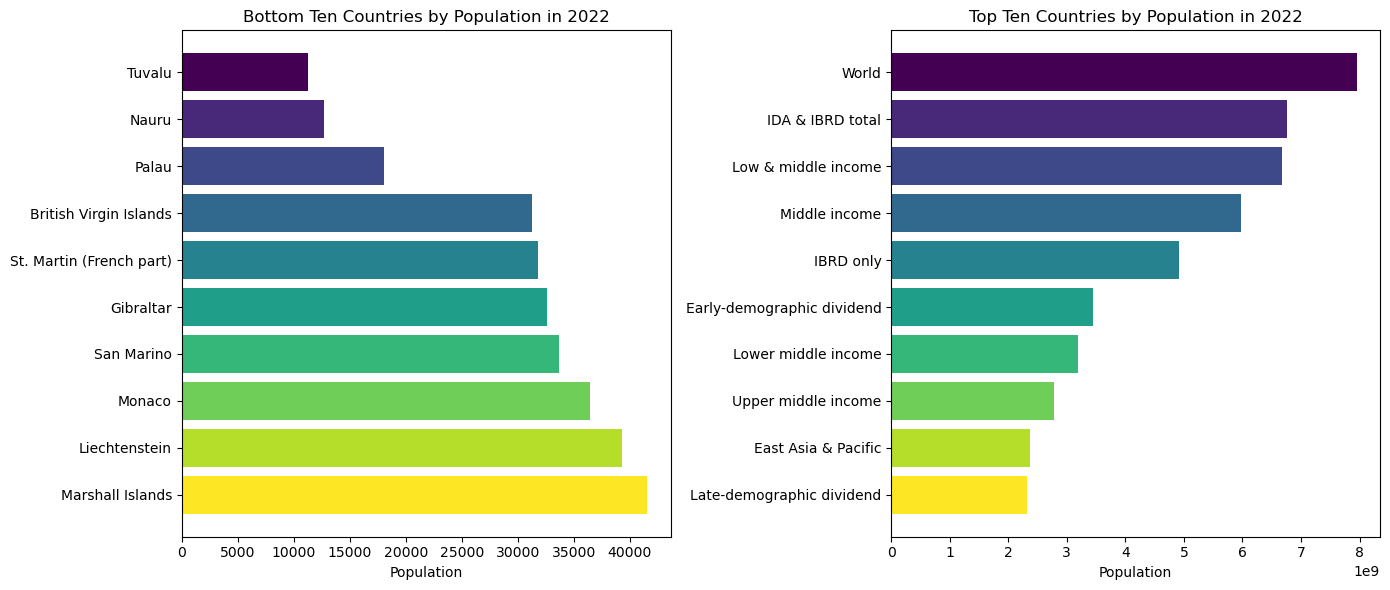

In [37]:
for year in list(melted_df['Year'].unique()):
    plot_top_ten_and_bottom_ten(str(year))